# Modeling: 

## Ridge Regression (L2 Regularization)

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Ridge Regression (L2 Regularization)](#7_Ridge_Regression_(L2_Regularization))
    * [7.1 Fitting Ridge Regression](#7.1_Fitting_Ridge_Regression)
    * [7.2 Ridge Regression: Coefficients (Before Regularization)](#7.2_Ridge_Regression:_Coefficients_(Before_Regularization))
    * [7.3 Ridge Regression: Residuals Visualization](#7.3_Ridge_Regression:_Residuals_Visualization)
    * [7.4 Ridge Regression Model Evaluation](#7.4_Ridge_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Dropping 'malls' and 'university_count'](#7.5.1_Dropping_malls_university_count)
       * [7.5.2 Features Selection Summary](#7.5.2_Features_Selection_Summary)    
    * [7.6 Regularization II: Ridge](#7.6_Regularization_II:_Ridge)
       * [7.6.1 Fitting Ridge Regression](#7.6.1_Fitting_Ridge_Regression)
       * [7.6.2 Ridge Regression: Coefficients (After Regularization)](#7.6.2_Ridge_Regression:_Coefficients_(After_Regularization))
       * [7.6.3 Ridge Regression Model Evaluation](#7.6.3_Ridge_Regression_Model_Evaluation)
 * [8. Ridge Regression Tuning Summary](#8_Ridge_Regression_Tuning_Summary)
 * [9. Ridge Regression Actual vs Prediction Visualization](#9_Ridge_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using Ridge Regression (L2 Regularization)**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [6]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [9]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [10]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [11]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [12]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


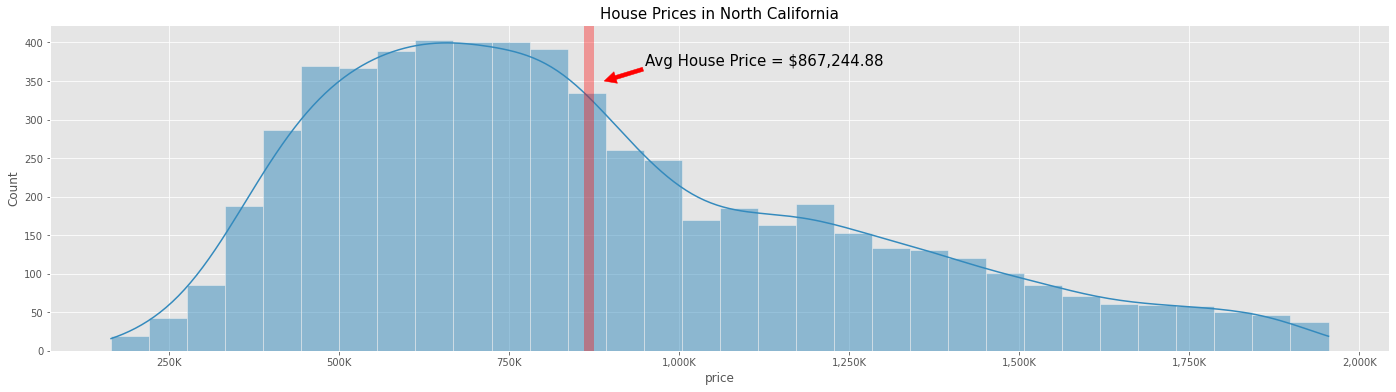

In [13]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [14]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [15]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [17]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [18]:
# Import StandardScaler:
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler:
mm_scaler = MinMaxScaler()

# Fit & transform  scaler to the data:
X_train = mm_scaler.fit_transform(X_train.astype(np.float))
X_test = mm_scaler.transform(X_test.astype(np.float))

## 7. Modeling: Ridge Regression (L2 Regularization)<a id='7_Ridge_Regression_(L2_Regularization)'></a>

The first type of regularized regression that we'll train  is called Ridge Regression. in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is!.

Note that alpha is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge regression is similar to picking k in KNN. Before using Ridge regressor it is necessary to scale the inputs, because this model is sensitive to scaling of inputs. So performing the scaling through sklearn’s StandardScalar will be beneficial.

This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity:
 * When alpha is equal to zero, we get back OLS (Linear Regression). Large coefficients in this case are not penalized and the overfitting problem is not accounted for.
 * A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. 

### 7.1 Fitting Ridge Regression<a id='7.1_Fitting_Ridge_Regression'></a>


In [19]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Create a ridge regressor: ridge
ridge = Ridge(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
ridge.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(ridge.score(X_test, y_test) * 100), '%')

R^2 coefficient : 87.3345 %


In [20]:
# Predict on the test data: y_pred_ridge
y_pred_ridge = ridge.predict(X_test)

### 7.2 Ridge Regression: Coefficients (Before Regularization)<a id='7.2_Ridge_Regression:_Coefficients_(Before_Regularization)'></a>

In [21]:
print("***Ridge Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(ridge.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Ridge Regression - Coefficients***
-------------------------------------
                                coef
sqft                       680432.58
median_price_sqft_cluster  669507.85
baths                      592197.65
lot_size                   409711.53
AvgRoomSize                396246.13
beds                       364094.59
gsRating                   233046.42
school_rating              143468.80
universities               100510.34
distance_miles              90917.61
median_income               87219.37
school_count                66189.67
malls                       41381.90
zipcode                     39381.91
cluster_label               -2985.97
barts                       -7310.93
demand_score               -60070.84
property_age               -67889.83
supply_score               -73450.04
days_on_market             -74562.33
hotness_score              -81660.17
university_count           -98419.76
property_type             -104773.62
lat                       -147346.64

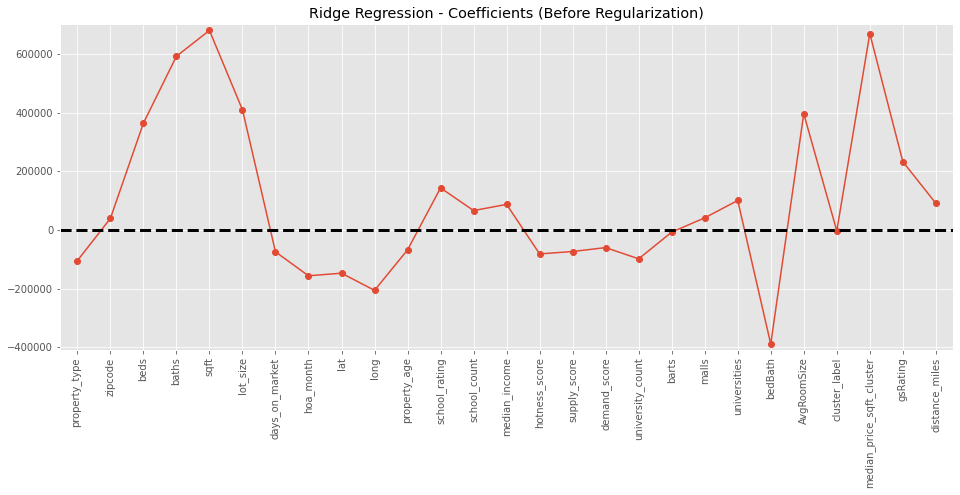

In [22]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), ridge.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.title("Ridge Regression - Coefficients (Before Regularization)")
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.margins(0.02)
plt.show()

Ridge Regression - Coefficients Summary:

 * As we can see above, Ridge Regression Coefficients are much smaller compared to Linear Regression!!
 * Again, 'university_count' and 'malls' are showing the least Coefficients (Least Important Features).
 * beds, baths, sqft, price_per_sqft and bedbath are the most important features.

### 7.3 Ridge Regression: Residuals Visualization<a id='7.3_Ridge_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

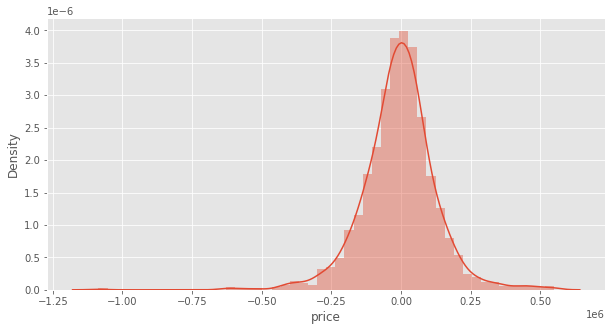

In [23]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_ridge)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Ridge Regression Model Evaluation<a id='7.4_Ridge_Regression_Model_Evaluation'></a>

In [24]:
from sklearn import metrics

print("********Ridge Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_ridge))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge) * 100), '%')
print("-------------------------------------------------")

********Ridge Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.3345 %
-------------------------------------------------------------
Adjusted R^2 Score: 87.1024 %
-------------------------------------------------
MAE: 95239.0802
-------------------------------------------------
RMSE:133921.3033
-------------------------------------------------
Variance Score:87.3653 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 133,921.3033**, which is slightly larger than 15% of the mean value of the Sales Price i.e.  $867,244.88.  


### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.5.1 Keeping high important Features Only<a id='7.5.1_Keeping_high_important_Features_Only'></a> 

In [25]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [27]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


#### 7.5.2 Ridge Regression Model Evaluation with High Important Features<a id='7.5.2_Ridge_Regression_Model_Evaluation_with_High_Important_Features'></a> 

In [30]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Create a ridge regressor: ridge_1
ridge_1 = Ridge(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
ridge_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(ridge_1.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred
y_pred_ridge_1 = ridge_1.predict(X_test)

R^2 coefficient : 87.0600 %


In [31]:
print("********Tuned Ridge Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge_1) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_ridge_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge_1) * 100), '%')
print("-------------------------------------------------")

********Tuned Ridge Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.0600 %
-------------------------------------------------------------
Adjusted R^2 Score: 86.9205 %
-------------------------------------------------
MAE: 96520.6475
-------------------------------------------------
RMSE:135365.0654
-------------------------------------------------
Variance Score:87.0810 %
-------------------------------------------------


#### 7.5.3 Features Selection Summary<a id='7.5.3_Features_Selection_Summary'></a>

Ridge regression performance summary with Features tuning:

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|87.3345 %|87.1024 %|95239.0802|133921.3033|87.3653 %|
|Tuned(High Important Features)   |87.0600 %|86.9205 %|96520.6475|135365.0654|87.0810 %|

### 7.6 Regularization II: Ridge<a id='7.6_Regularization_II:_Ridge'></a>

In [52]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

n_alphas = 1000
alphas = np.logspace(0.001, 20, n_alphas) #let's use linspace from NumPy to control the precise end value
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'] #default 'auto'


params = {'alpha': alphas,
         'solver':solver}

# Create a ridge regressor: ridge
ridge = Ridge(random_state=1981)

#cross validation
folds = 5

# Setup the GridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, n_jobs=1,
                        return_train_score=True,
                        verbose = 2)   

# Fit it to the training data
ridge_cv.fit(X_train, y_train) # We'll be using same training data where we dropped 2 features



Fitting 5 folds for each of 7000 candidates, totalling 35000 fits
[CV] END ..............alpha=1.0023052380778996, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.0023052380778996, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.0023052380778996, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.0023052380778996, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.0023052380778996, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.0023052380778996, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.0023052380778996, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.0023052380778996, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.0023052380778996, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.0023052380778996, solver=svd; total time=   0.0s
[CV] END ..........alpha=1.0023052380778996, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1.0023052380778996

[CV] END ...............alpha=1.1509515895689577, solver=sag; total time=   0.0s
[CV] END ...............alpha=1.1509515895689577, solver=sag; total time=   0.0s
[CV] END ...............alpha=1.1509515895689577, solver=sag; total time=   0.0s
[CV] END ...............alpha=1.1509515895689577, solver=sag; total time=   0.0s
[CV] END ..............alpha=1.1509515895689577, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.1509515895689577, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.1509515895689577, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.1509515895689577, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.1509515895689577, solver=saga; total time=   0.0s
[CV] END ...............alpha=1.205247046981578, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.205247046981578, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.205247046981578, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1.3216428600848584, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.3216428600848584, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.3216428600848584, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.3839905767697154, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.3839905767697154, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.3839905767697154, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.3839905767697154, solver=auto; total time=   0.0s
[CV] END ..............alpha=1.3839905767697154, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.3839905767697154, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.3839905767697154, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.3839905767697154, solver=svd; total time=   0.0s
[CV] END ...............alpha=1.3839905767697154, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.5892425717900527, solver=sag; total time=   0.0s
[CV] END ...............alpha=1.5892425717900527, solver=sag; total time=   0.0s
[CV] END ...............alpha=1.5892425717900527, solver=sag; total time=   0.0s
[CV] END ..............alpha=1.5892425717900527, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.5892425717900527, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.5892425717900527, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.5892425717900527, solver=saga; total time=   0.0s
[CV] END ..............alpha=1.5892425717900527, solver=saga; total time=   0.0s
[CV] END ...............alpha=1.664214145883161, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.664214145883161, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.664214145883161, solver=auto; total time=   0.0s
[CV] END ...............alpha=1.664214145883161, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.9110245500268466, solver=svd; total time=   0.0s
[CV] END ..........alpha=1.9110245500268466, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1.9110245500268466, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1.9110245500268466, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1.9110245500268466, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1.9110245500268466, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=1.9110245500268466, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1.9110245500268466, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1.9110245500268466, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1.9110245500268466, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1.9110245500268466, solver=lsqr; total time=   0.0s
[CV] END .........alpha=1.9110245500268466, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1.91

[CV] END ................alpha=2.194438041426014, solver=sag; total time=   0.0s
[CV] END ................alpha=2.194438041426014, solver=sag; total time=   0.0s
[CV] END ...............alpha=2.194438041426014, solver=saga; total time=   0.0s
[CV] END ...............alpha=2.194438041426014, solver=saga; total time=   0.0s
[CV] END ...............alpha=2.194438041426014, solver=saga; total time=   0.0s
[CV] END ...............alpha=2.194438041426014, solver=saga; total time=   0.0s
[CV] END ...............alpha=2.194438041426014, solver=saga; total time=   0.0s
[CV] END ..............alpha=2.2979593522289314, solver=auto; total time=   0.0s
[CV] END ..............alpha=2.2979593522289314, solver=auto; total time=   0.0s
[CV] END ..............alpha=2.2979593522289314, solver=auto; total time=   0.0s
[CV] END ..............alpha=2.2979593522289314, solver=auto; total time=   0.0s
[CV] END ..............alpha=2.2979593522289314, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=2.6387570060839916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2.6387570060839916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2.6387570060839916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2.6387570060839916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2.6387570060839916, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=2.6387570060839916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2.6387570060839916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2.6387570060839916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2.6387570060839916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2.6387570060839916, solver=lsqr; total time=   0.0s
[CV] END .........alpha=2.6387570060839916, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=2.6387570060839916, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=2.63

[CV] END ...............alpha=3.0300964768604253, solver=sag; total time=   0.0s
[CV] END ...............alpha=3.0300964768604253, solver=sag; total time=   0.0s
[CV] END ..............alpha=3.0300964768604253, solver=saga; total time=   0.0s
[CV] END ..............alpha=3.0300964768604253, solver=saga; total time=   0.0s
[CV] END ..............alpha=3.0300964768604253, solver=saga; total time=   0.0s
[CV] END ..............alpha=3.0300964768604253, solver=saga; total time=   0.0s
[CV] END ..............alpha=3.0300964768604253, solver=saga; total time=   0.0s
[CV] END ...............alpha=3.173039477857644, solver=auto; total time=   0.0s
[CV] END ...............alpha=3.173039477857644, solver=auto; total time=   0.0s
[CV] END ...............alpha=3.173039477857644, solver=auto; total time=   0.0s
[CV] END ...............alpha=3.173039477857644, solver=auto; total time=   0.0s
[CV] END ...............alpha=3.173039477857644, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ............alpha=3.64361542977537, solver=cholesky; total time=   0.0s
[CV] END ............alpha=3.64361542977537, solver=cholesky; total time=   0.0s
[CV] END ............alpha=3.64361542977537, solver=cholesky; total time=   0.0s
[CV] END ............alpha=3.64361542977537, solver=cholesky; total time=   0.0s
[CV] END ................alpha=3.64361542977537, solver=lsqr; total time=   0.0s
[CV] END ................alpha=3.64361542977537, solver=lsqr; total time=   0.0s
[CV] END ................alpha=3.64361542977537, solver=lsqr; total time=   0.0s
[CV] END ................alpha=3.64361542977537, solver=lsqr; total time=   0.0s
[CV] END ................alpha=3.64361542977537, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=3.64361542977537, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=3.64361542977537, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=3.64361542977537, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=3.

[CV] END ................alpha=4.183979900893236, solver=sag; total time=   0.0s
[CV] END ...............alpha=4.183979900893236, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.183979900893236, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.183979900893236, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.183979900893236, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.183979900893236, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.381356666851991, solver=auto; total time=   0.0s
[CV] END ...............alpha=4.381356666851991, solver=auto; total time=   0.0s
[CV] END ...............alpha=4.381356666851991, solver=auto; total time=   0.0s
[CV] END ...............alpha=4.381356666851991, solver=auto; total time=   0.0s
[CV] END ...............alpha=4.381356666851991, solver=auto; total time=   0.0s
[CV] END ................alpha=4.381356666851991, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=4.804482840868255, solver=sag; total time=   0.0s
[CV] END ................alpha=4.804482840868255, solver=sag; total time=   0.0s
[CV] END ................alpha=4.804482840868255, solver=sag; total time=   0.0s
[CV] END ................alpha=4.804482840868255, solver=sag; total time=   0.0s
[CV] END ...............alpha=4.804482840868255, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.804482840868255, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.804482840868255, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.804482840868255, solver=saga; total time=   0.0s
[CV] END ...............alpha=4.804482840868255, solver=saga; total time=   0.0s
[CV] END ...............alpha=5.031131464355298, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.031131464355298, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.031131464355298, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=5.517009143201071, solver=saga; total time=   0.0s
[CV] END ...............alpha=5.777270771660957, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.777270771660957, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.777270771660957, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.777270771660957, solver=auto; total time=   0.0s
[CV] END ...............alpha=5.777270771660957, solver=auto; total time=   0.0s
[CV] END ................alpha=5.777270771660957, solver=svd; total time=   0.0s
[CV] END ................alpha=5.777270771660957, solver=svd; total time=   0.0s
[CV] END ................alpha=5.777270771660957, solver=svd; total time=   0.0s
[CV] END ................alpha=5.777270771660957, solver=svd; total time=   0.0s
[CV] END ................alpha=5.777270771660957, solver=svd; total time=   0.0s
[CV] END ...........alpha=5.777270771660957, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=5.

[CV] END ................alpha=6.634065876743095, solver=sag; total time=   0.0s
[CV] END ...............alpha=6.634065876743095, solver=saga; total time=   0.0s
[CV] END ...............alpha=6.634065876743095, solver=saga; total time=   0.0s
[CV] END ...............alpha=6.634065876743095, solver=saga; total time=   0.0s
[CV] END ...............alpha=6.634065876743095, solver=saga; total time=   0.0s
[CV] END ...............alpha=6.634065876743095, solver=saga; total time=   0.0s
[CV] END ...............alpha=6.947023992920786, solver=auto; total time=   0.0s
[CV] END ...............alpha=6.947023992920786, solver=auto; total time=   0.0s
[CV] END ...............alpha=6.947023992920786, solver=auto; total time=   0.0s
[CV] END ...............alpha=6.947023992920786, solver=auto; total time=   0.0s
[CV] END ...............alpha=6.947023992920786, solver=auto; total time=   0.0s
[CV] END ................alpha=6.947023992920786, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=7.617927529526899, solver=sag; total time=   0.0s
[CV] END ................alpha=7.617927529526899, solver=sag; total time=   0.0s
[CV] END ................alpha=7.617927529526899, solver=sag; total time=   0.0s
[CV] END ...............alpha=7.617927529526899, solver=saga; total time=   0.0s
[CV] END ...............alpha=7.617927529526899, solver=saga; total time=   0.0s
[CV] END ...............alpha=7.617927529526899, solver=saga; total time=   0.0s
[CV] END ...............alpha=7.617927529526899, solver=saga; total time=   0.0s
[CV] END ...............alpha=7.617927529526899, solver=saga; total time=   0.0s
[CV] END ................alpha=7.97729873462403, solver=auto; total time=   0.0s
[CV] END ................alpha=7.97729873462403, solver=auto; total time=   0.0s
[CV] END ................alpha=7.97729873462403, solver=auto; total time=   0.0s
[CV] END ................alpha=7.97729873462403, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=9.160367830351866, solver=svd; total time=   0.0s
[CV] END ................alpha=9.160367830351866, solver=svd; total time=   0.0s
[CV] END ................alpha=9.160367830351866, solver=svd; total time=   0.0s
[CV] END ...........alpha=9.160367830351866, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=9.160367830351866, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=9.160367830351866, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=9.160367830351866, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=9.160367830351866, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=9.160367830351866, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9.160367830351866, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9.160367830351866, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9.160367830351866, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=10.518891366464558, solver=saga; total time=   0.0s
[CV] END ..............alpha=10.518891366464558, solver=saga; total time=   0.0s
[CV] END ..............alpha=10.518891366464558, solver=saga; total time=   0.0s
[CV] END ..............alpha=10.518891366464558, solver=saga; total time=   0.0s
[CV] END ..............alpha=10.518891366464558, solver=saga; total time=   0.0s
[CV] END ..............alpha=11.015113816993297, solver=auto; total time=   0.0s
[CV] END ..............alpha=11.015113816993297, solver=auto; total time=   0.0s
[CV] END ..............alpha=11.015113816993297, solver=auto; total time=   0.0s
[CV] END ..............alpha=11.015113816993297, solver=auto; total time=   0.0s
[CV] END ..............alpha=11.015113816993297, solver=auto; total time=   0.0s
[CV] END ...............alpha=11.015113816993297, solver=svd; total time=   0.0s
[CV] END ...............alpha=11.015113816993297, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=12.078890021519202, solver=sag; total time=   0.0s
[CV] END ...............alpha=12.078890021519202, solver=sag; total time=   0.0s
[CV] END ...............alpha=12.078890021519202, solver=sag; total time=   0.0s
[CV] END ..............alpha=12.078890021519202, solver=saga; total time=   0.0s
[CV] END ..............alpha=12.078890021519202, solver=saga; total time=   0.0s
[CV] END ..............alpha=12.078890021519202, solver=saga; total time=   0.0s
[CV] END ..............alpha=12.078890021519202, solver=saga; total time=   0.0s
[CV] END ..............alpha=12.078890021519202, solver=saga; total time=   0.0s
[CV] END ...............alpha=12.64870448174401, solver=auto; total time=   0.0s
[CV] END ...............alpha=12.64870448174401, solver=auto; total time=   0.0s
[CV] END ...............alpha=12.64870448174401, solver=auto; total time=   0.0s
[CV] END ...............alpha=12.64870448174401, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=14.524563951365684, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=14.524563951365684, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=14.524563951365684, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=14.524563951365684, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=14.524563951365684, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=14.524563951365684, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14.524563951365684, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14.524563951365684, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14.524563951365684, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14.524563951365684, solver=lsqr; total time=   0.0s
[CV] END .........alpha=14.524563951365684, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14.524563951365684, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14.5

[CV] END ................alpha=16.67862177362088, solver=sag; total time=   0.0s
[CV] END ................alpha=16.67862177362088, solver=sag; total time=   0.0s
[CV] END ...............alpha=16.67862177362088, solver=saga; total time=   0.0s
[CV] END ...............alpha=16.67862177362088, solver=saga; total time=   0.0s
[CV] END ...............alpha=16.67862177362088, solver=saga; total time=   0.0s
[CV] END ...............alpha=16.67862177362088, solver=saga; total time=   0.0s
[CV] END ...............alpha=16.67862177362088, solver=saga; total time=   0.0s
[CV] END ..............alpha=17.465425846370785, solver=auto; total time=   0.0s
[CV] END ..............alpha=17.465425846370785, solver=auto; total time=   0.0s
[CV] END ..............alpha=17.465425846370785, solver=auto; total time=   0.0s
[CV] END ..............alpha=17.465425846370785, solver=auto; total time=   0.0s
[CV] END ..............alpha=17.465425846370785, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=19.152136008967393, solver=sag; total time=   0.0s
[CV] END ...............alpha=19.152136008967393, solver=sag; total time=   0.0s
[CV] END ...............alpha=19.152136008967393, solver=sag; total time=   0.0s
[CV] END ..............alpha=19.152136008967393, solver=saga; total time=   0.0s
[CV] END ..............alpha=19.152136008967393, solver=saga; total time=   0.0s
[CV] END ..............alpha=19.152136008967393, solver=saga; total time=   0.0s
[CV] END ..............alpha=19.152136008967393, solver=saga; total time=   0.0s
[CV] END ..............alpha=19.152136008967393, solver=saga; total time=   0.0s
[CV] END ...............alpha=20.05562664615835, solver=auto; total time=   0.0s
[CV] END ...............alpha=20.05562664615835, solver=auto; total time=   0.0s
[CV] END ...............alpha=20.05562664615835, solver=auto; total time=   0.0s
[CV] END ...............alpha=20.05562664615835, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=21.992483472832742, solver=sag; total time=   0.0s
[CV] END ...............alpha=21.992483472832742, solver=sag; total time=   0.0s
[CV] END ...............alpha=21.992483472832742, solver=sag; total time=   0.0s
[CV] END ..............alpha=21.992483472832742, solver=saga; total time=   0.0s
[CV] END ..............alpha=21.992483472832742, solver=saga; total time=   0.0s
[CV] END ..............alpha=21.992483472832742, solver=saga; total time=   0.0s
[CV] END ..............alpha=21.992483472832742, solver=saga; total time=   0.0s
[CV] END ..............alpha=21.992483472832742, solver=saga; total time=   0.0s
[CV] END ..............alpha=23.029965814070177, solver=auto; total time=   0.0s
[CV] END ..............alpha=23.029965814070177, solver=auto; total time=   0.0s
[CV] END ..............alpha=23.029965814070177, solver=auto; total time=   0.0s
[CV] END ..............alpha=23.029965814070177, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..........alpha=25.25406717435372, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=25.25406717435372, solver=sag; total time=   0.0s
[CV] END ................alpha=25.25406717435372, solver=sag; total time=   0.0s
[CV] END ................alpha=25.25406717435372, solver=sag; total time=   0.0s
[CV] END ................alpha=25.25406717435372, solver=sag; total time=   0.0s
[CV] END ................alpha=25.25406717435372, solver=sag; total time=   0.0s
[CV] END ...............alpha=25.25406717435372, solver=saga; total time=   0.0s
[CV] END ...............alpha=25.25406717435372, solver=saga; total time=   0.0s
[CV] END ...............alpha=25.25406717435372, solver=saga; total time=   0.0s
[CV] END ...............alpha=25.25406717435372, solver=saga; total time=   0.0s
[CV] END ...............alpha=25.25406717435372, solver=saga; total time=   0.0s
[CV] END ...............alpha=26.44541278887612, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=28.999358332341266, solver=saga; total time=   0.0s
[CV] END ..............alpha=28.999358332341266, solver=saga; total time=   0.0s
[CV] END ..............alpha=30.367385832017973, solver=auto; total time=   0.0s
[CV] END ..............alpha=30.367385832017973, solver=auto; total time=   0.0s
[CV] END ..............alpha=30.367385832017973, solver=auto; total time=   0.0s
[CV] END ..............alpha=30.367385832017973, solver=auto; total time=   0.0s
[CV] END ..............alpha=30.367385832017973, solver=auto; total time=   0.0s
[CV] END ...............alpha=30.367385832017973, solver=svd; total time=   0.0s
[CV] END ...............alpha=30.367385832017973, solver=svd; total time=   0.0s
[CV] END ...............alpha=30.367385832017973, solver=svd; total time=   0.0s
[CV] END ...............alpha=30.367385832017973, solver=svd; total time=   0.0s
[CV] END ...............alpha=30.367385832017973, solver=svd; total time=   0.0s
[CV] END ..........alpha=30.

[CV] END ...............alpha=33.30009292687535, solver=saga; total time=   0.0s
[CV] END ...............alpha=33.30009292687535, solver=saga; total time=   0.0s
[CV] END ...............alpha=33.30009292687535, solver=saga; total time=   0.0s
[CV] END ...............alpha=33.30009292687535, solver=saga; total time=   0.0s
[CV] END ..............alpha=34.871005025814796, solver=auto; total time=   0.0s
[CV] END ..............alpha=34.871005025814796, solver=auto; total time=   0.0s
[CV] END ..............alpha=34.871005025814796, solver=auto; total time=   0.0s
[CV] END ..............alpha=34.871005025814796, solver=auto; total time=   0.0s
[CV] END ..............alpha=34.871005025814796, solver=auto; total time=   0.0s
[CV] END ...............alpha=34.871005025814796, solver=svd; total time=   0.0s
[CV] END ...............alpha=34.871005025814796, solver=svd; total time=   0.0s
[CV] END ...............alpha=34.871005025814796, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=38.238645704855045, solver=saga; total time=   0.0s
[CV] END ..............alpha=38.238645704855045, solver=saga; total time=   0.0s
[CV] END ..............alpha=38.238645704855045, solver=saga; total time=   0.0s
[CV] END ..............alpha=38.238645704855045, solver=saga; total time=   0.0s
[CV] END ..............alpha=40.042531096908576, solver=auto; total time=   0.0s
[CV] END ..............alpha=40.042531096908576, solver=auto; total time=   0.0s
[CV] END ..............alpha=40.042531096908576, solver=auto; total time=   0.0s
[CV] END ..............alpha=40.042531096908576, solver=auto; total time=   0.0s
[CV] END ..............alpha=40.042531096908576, solver=auto; total time=   0.0s
[CV] END ...............alpha=40.042531096908576, solver=svd; total time=   0.0s
[CV] END ...............alpha=40.042531096908576, solver=svd; total time=   0.0s
[CV] END ...............alpha=40.042531096908576, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=43.90960795671964, solver=saga; total time=   0.0s
[CV] END ...............alpha=43.90960795671964, solver=saga; total time=   0.0s
[CV] END ...............alpha=43.90960795671964, solver=saga; total time=   0.0s
[CV] END ...............alpha=43.90960795671964, solver=saga; total time=   0.0s
[CV] END ...............alpha=43.90960795671964, solver=saga; total time=   0.0s
[CV] END ..............alpha=45.981017623664705, solver=auto; total time=   0.0s
[CV] END ..............alpha=45.981017623664705, solver=auto; total time=   0.0s
[CV] END ..............alpha=45.981017623664705, solver=auto; total time=   0.0s
[CV] END ..............alpha=45.981017623664705, solver=auto; total time=   0.0s
[CV] END ..............alpha=45.981017623664705, solver=auto; total time=   0.0s
[CV] END ...............alpha=45.981017623664705, solver=svd; total time=   0.0s
[CV] END ...............alpha=45.981017623664705, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=52.800208273322426, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=52.800208273322426, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=52.800208273322426, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=52.800208273322426, solver=lsqr; total time=   0.0s
[CV] END .........alpha=52.800208273322426, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=52.800208273322426, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=52.800208273322426, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=52.800208273322426, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=52.800208273322426, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=52.800208273322426, solver=sag; total time=   0.0s
[CV] END ...............alpha=52.800208273322426, solver=sag; total time=   0.0s
[CV] END ...............alpha=52.800208273322426, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=60.630715407903885, solver=saga; total time=   0.0s
[CV] END ................alpha=63.4909333841955, solver=auto; total time=   0.0s
[CV] END ................alpha=63.4909333841955, solver=auto; total time=   0.0s
[CV] END ................alpha=63.4909333841955, solver=auto; total time=   0.0s
[CV] END ................alpha=63.4909333841955, solver=auto; total time=   0.0s
[CV] END ................alpha=63.4909333841955, solver=auto; total time=   0.0s
[CV] END .................alpha=63.4909333841955, solver=svd; total time=   0.0s
[CV] END .................alpha=63.4909333841955, solver=svd; total time=   0.0s
[CV] END .................alpha=63.4909333841955, solver=svd; total time=   0.0s
[CV] END .................alpha=63.4909333841955, solver=svd; total time=   0.0s
[CV] END .................alpha=63.4909333841955, solver=svd; total time=   0.0s
[CV] END ............alpha=63.4909333841955, solver=cholesky; total time=   0.0s
[CV] END ............alpha=6

[CV] END ...............alpha=72.90692288697507, solver=saga; total time=   0.0s
[CV] END ...............alpha=72.90692288697507, solver=saga; total time=   0.0s
[CV] END ...............alpha=72.90692288697507, solver=saga; total time=   0.0s
[CV] END ...............alpha=72.90692288697507, solver=saga; total time=   0.0s
[CV] END ...............alpha=72.90692288697507, solver=saga; total time=   0.0s
[CV] END ...............alpha=76.34626365731751, solver=auto; total time=   0.0s
[CV] END ...............alpha=76.34626365731751, solver=auto; total time=   0.0s
[CV] END ...............alpha=76.34626365731751, solver=auto; total time=   0.0s
[CV] END ...............alpha=76.34626365731751, solver=auto; total time=   0.0s
[CV] END ...............alpha=76.34626365731751, solver=auto; total time=   0.0s
[CV] END ................alpha=76.34626365731751, solver=svd; total time=   0.0s
[CV] END ................alpha=76.34626365731751, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=83.71934576363417, solver=sag; total time=   0.0s
[CV] END ................alpha=83.71934576363417, solver=sag; total time=   0.0s
[CV] END ................alpha=83.71934576363417, solver=sag; total time=   0.0s
[CV] END ...............alpha=83.71934576363417, solver=saga; total time=   0.0s
[CV] END ...............alpha=83.71934576363417, solver=saga; total time=   0.0s
[CV] END ...............alpha=83.71934576363417, solver=saga; total time=   0.0s
[CV] END ...............alpha=83.71934576363417, solver=saga; total time=   0.0s
[CV] END ...............alpha=83.71934576363417, solver=saga; total time=   0.0s
[CV] END ...............alpha=87.66875615910023, solver=auto; total time=   0.0s
[CV] END ...............alpha=87.66875615910023, solver=auto; total time=   0.0s
[CV] END ...............alpha=87.66875615910023, solver=auto; total time=   0.0s
[CV] END ...............alpha=87.66875615910023, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=96.13529933167827, solver=sag; total time=   0.0s
[CV] END ...............alpha=96.13529933167827, solver=saga; total time=   0.0s
[CV] END ...............alpha=96.13529933167827, solver=saga; total time=   0.0s
[CV] END ...............alpha=96.13529933167827, solver=saga; total time=   0.0s
[CV] END ...............alpha=96.13529933167827, solver=saga; total time=   0.0s
[CV] END ...............alpha=96.13529933167827, solver=saga; total time=   0.0s
[CV] END ..............alpha=100.67042495991383, solver=auto; total time=   0.0s
[CV] END ..............alpha=100.67042495991383, solver=auto; total time=   0.0s
[CV] END ..............alpha=100.67042495991383, solver=auto; total time=   0.0s
[CV] END ..............alpha=100.67042495991383, solver=auto; total time=   0.0s
[CV] END ..............alpha=100.67042495991383, solver=auto; total time=   0.0s
[CV] END ...............alpha=100.67042495991383, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=110.39259436742873, solver=sag; total time=   0.0s
[CV] END ...............alpha=110.39259436742873, solver=sag; total time=   0.0s
[CV] END ...............alpha=110.39259436742873, solver=sag; total time=   0.0s
[CV] END ..............alpha=110.39259436742873, solver=saga; total time=   0.0s
[CV] END ..............alpha=110.39259436742873, solver=saga; total time=   0.0s
[CV] END ..............alpha=110.39259436742873, solver=saga; total time=   0.0s
[CV] END ..............alpha=110.39259436742873, solver=saga; total time=   0.0s
[CV] END ..............alpha=110.39259436742873, solver=saga; total time=   0.0s
[CV] END ..............alpha=115.60029941815989, solver=auto; total time=   0.0s
[CV] END ..............alpha=115.60029941815989, solver=auto; total time=   0.0s
[CV] END ..............alpha=115.60029941815989, solver=auto; total time=   0.0s
[CV] END ..............alpha=115.60029941815989, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=126.76431004938867, solver=sag; total time=   0.0s
[CV] END ...............alpha=126.76431004938867, solver=sag; total time=   0.0s
[CV] END ..............alpha=126.76431004938867, solver=saga; total time=   0.0s
[CV] END ..............alpha=126.76431004938867, solver=saga; total time=   0.0s
[CV] END ..............alpha=126.76431004938867, solver=saga; total time=   0.0s
[CV] END ..............alpha=126.76431004938867, solver=saga; total time=   0.0s
[CV] END ..............alpha=126.76431004938867, solver=saga; total time=   0.0s
[CV] END ..............alpha=132.74434106034067, solver=auto; total time=   0.0s
[CV] END ..............alpha=132.74434106034067, solver=auto; total time=   0.0s
[CV] END ..............alpha=132.74434106034067, solver=auto; total time=   0.0s
[CV] END ..............alpha=132.74434106034067, solver=auto; total time=   0.0s
[CV] END ..............alpha=132.74434106034067, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=145.56402442009065, solver=sag; total time=   0.0s
[CV] END ...............alpha=145.56402442009065, solver=sag; total time=   0.0s
[CV] END ...............alpha=145.56402442009065, solver=sag; total time=   0.0s
[CV] END ..............alpha=145.56402442009065, solver=saga; total time=   0.0s
[CV] END ..............alpha=145.56402442009065, solver=saga; total time=   0.0s
[CV] END ..............alpha=145.56402442009065, solver=saga; total time=   0.0s
[CV] END ..............alpha=145.56402442009065, solver=saga; total time=   0.0s
[CV] END ..............alpha=145.56402442009065, solver=saga; total time=   0.0s
[CV] END ..............alpha=152.43092078683577, solver=auto; total time=   0.0s
[CV] END ..............alpha=152.43092078683577, solver=auto; total time=   0.0s
[CV] END ..............alpha=152.43092078683577, solver=auto; total time=   0.0s
[CV] END ..............alpha=152.43092078683577, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=167.1518205488384, solver=saga; total time=   0.0s
[CV] END ...............alpha=167.1518205488384, solver=saga; total time=   0.0s
[CV] END ...............alpha=167.1518205488384, solver=saga; total time=   0.0s
[CV] END ...............alpha=167.1518205488384, solver=saga; total time=   0.0s
[CV] END ...............alpha=167.1518205488384, solver=saga; total time=   0.0s
[CV] END ..............alpha=175.03710837180446, solver=auto; total time=   0.0s
[CV] END ..............alpha=175.03710837180446, solver=auto; total time=   0.0s
[CV] END ..............alpha=175.03710837180446, solver=auto; total time=   0.0s
[CV] END ..............alpha=175.03710837180446, solver=auto; total time=   0.0s
[CV] END ..............alpha=175.03710837180446, solver=auto; total time=   0.0s
[CV] END ...............alpha=175.03710837180446, solver=svd; total time=   0.0s
[CV] END ...............alpha=175.03710837180446, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=191.94118343525875, solver=saga; total time=   0.0s
[CV] END ..............alpha=191.94118343525875, solver=saga; total time=   0.0s
[CV] END ..............alpha=200.99589472406274, solver=auto; total time=   0.0s
[CV] END ..............alpha=200.99589472406274, solver=auto; total time=   0.0s
[CV] END ..............alpha=200.99589472406274, solver=auto; total time=   0.0s
[CV] END ..............alpha=200.99589472406274, solver=auto; total time=   0.0s
[CV] END ..............alpha=200.99589472406274, solver=auto; total time=   0.0s
[CV] END ...............alpha=200.99589472406274, solver=svd; total time=   0.0s
[CV] END ...............alpha=200.99589472406274, solver=svd; total time=   0.0s
[CV] END ...............alpha=200.99589472406274, solver=svd; total time=   0.0s
[CV] END ...............alpha=200.99589472406274, solver=svd; total time=   0.0s
[CV] END ...............alpha=200.99589472406274, solver=svd; total time=   0.0s
[CV] END ..........alpha=200

[CV] END ..............alpha=230.80448524156589, solver=auto; total time=   0.0s
[CV] END ..............alpha=230.80448524156589, solver=auto; total time=   0.0s
[CV] END ..............alpha=230.80448524156589, solver=auto; total time=   0.0s
[CV] END ..............alpha=230.80448524156589, solver=auto; total time=   0.0s
[CV] END ..............alpha=230.80448524156589, solver=auto; total time=   0.0s
[CV] END ...............alpha=230.80448524156589, solver=svd; total time=   0.0s
[CV] END ...............alpha=230.80448524156589, solver=svd; total time=   0.0s
[CV] END ...............alpha=230.80448524156589, solver=svd; total time=   0.0s
[CV] END ...............alpha=230.80448524156589, solver=svd; total time=   0.0s
[CV] END ...............alpha=230.80448524156589, solver=svd; total time=   0.0s
[CV] END ..........alpha=230.80448524156589, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=230.80448524156589, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=230

[CV] END ...............alpha=265.0338231074668, solver=auto; total time=   0.0s
[CV] END ................alpha=265.0338231074668, solver=svd; total time=   0.0s
[CV] END ................alpha=265.0338231074668, solver=svd; total time=   0.0s
[CV] END ................alpha=265.0338231074668, solver=svd; total time=   0.0s
[CV] END ................alpha=265.0338231074668, solver=svd; total time=   0.0s
[CV] END ................alpha=265.0338231074668, solver=svd; total time=   0.0s
[CV] END ...........alpha=265.0338231074668, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=265.0338231074668, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=265.0338231074668, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=265.0338231074668, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=265.0338231074668, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=265.0338231074668, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=304.33952493358987, solver=svd; total time=   0.0s
[CV] END ...............alpha=304.33952493358987, solver=svd; total time=   0.0s
[CV] END ..........alpha=304.33952493358987, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=304.33952493358987, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=304.33952493358987, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=304.33952493358987, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=304.33952493358987, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=304.33952493358987, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=304.33952493358987, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=304.33952493358987, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=304.33952493358987, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=304.33952493358987, solver=lsqr; total time=   0.0s
[CV] END .........alpha=304.

[CV] END ...........alpha=349.4744382087655, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=349.4744382087655, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=349.4744382087655, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=349.4744382087655, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=349.4744382087655, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=349.4744382087655, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=349.4744382087655, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=349.4744382087655, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=349.4744382087655, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=349.4744382087655, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=349.4744382087655, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=349.4744382087655, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=349

[CV] END ..............alpha=401.30306107293393, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=401.30306107293393, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=401.30306107293393, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=401.30306107293393, solver=lsqr; total time=   0.0s
[CV] END .........alpha=401.30306107293393, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=401.30306107293393, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=401.30306107293393, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=401.30306107293393, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=401.30306107293393, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=401.30306107293393, solver=sag; total time=   0.0s
[CV] END ...............alpha=401.30306107293393, solver=sag; total time=   0.0s
[CV] END ...............alpha=401.30306107293393, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ...........alpha=460.818100608274, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=460.818100608274, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=460.818100608274, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=460.818100608274, solver=sag; total time=   0.0s
[CV] END .................alpha=460.818100608274, solver=sag; total time=   0.0s
[CV] END .................alpha=460.818100608274, solver=sag; total time=   0.0s
[CV] END .................alpha=460.818100608274, solver=sag; total time=   0.0s
[CV] END .................alpha=460.818100608274, solver=sag; total time=   0.0s
[CV] END ................alpha=460.818100608274, solver=saga; total time=   0.0s
[CV] END ................alpha=460.818100608274, solver=saga; total time=   0.0s
[CV] END ................alpha=460.818100608274, solver=saga; total time=   0.0s
[CV] END ................alpha=460.818100608274, solver=saga; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=529.1594867989902, solver=sag; total time=   0.0s
[CV] END ...............alpha=529.1594867989902, solver=saga; total time=   0.0s
[CV] END ...............alpha=529.1594867989902, solver=saga; total time=   0.0s
[CV] END ...............alpha=529.1594867989902, solver=saga; total time=   0.0s
[CV] END ...............alpha=529.1594867989902, solver=saga; total time=   0.0s
[CV] END ...............alpha=529.1594867989902, solver=saga; total time=   0.0s
[CV] END ...............alpha=554.1222711944124, solver=auto; total time=   0.0s
[CV] END ...............alpha=554.1222711944124, solver=auto; total time=   0.0s
[CV] END ...............alpha=554.1222711944124, solver=auto; total time=   0.0s
[CV] END ...............alpha=554.1222711944124, solver=auto; total time=   0.0s
[CV] END ...............alpha=554.1222711944124, solver=auto; total time=   0.0s
[CV] END ................alpha=554.1222711944124, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=607.6362063464112, solver=saga; total time=   0.0s
[CV] END ...............alpha=607.6362063464112, solver=saga; total time=   0.0s
[CV] END ...............alpha=607.6362063464112, solver=saga; total time=   0.0s
[CV] END ...............alpha=636.3010833603992, solver=auto; total time=   0.0s
[CV] END ...............alpha=636.3010833603992, solver=auto; total time=   0.0s
[CV] END ...............alpha=636.3010833603992, solver=auto; total time=   0.0s
[CV] END ...............alpha=636.3010833603992, solver=auto; total time=   0.0s
[CV] END ...............alpha=636.3010833603992, solver=auto; total time=   0.0s
[CV] END ................alpha=636.3010833603992, solver=svd; total time=   0.0s
[CV] END ................alpha=636.3010833603992, solver=svd; total time=   0.0s
[CV] END ................alpha=636.3010833603992, solver=svd; total time=   0.0s
[CV] END ................alpha=636.3010833603992, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=730.6673810689814, solver=auto; total time=   0.0s
[CV] END ...............alpha=730.6673810689814, solver=auto; total time=   0.0s
[CV] END ...............alpha=730.6673810689814, solver=auto; total time=   0.0s
[CV] END ................alpha=730.6673810689814, solver=svd; total time=   0.0s
[CV] END ................alpha=730.6673810689814, solver=svd; total time=   0.0s
[CV] END ................alpha=730.6673810689814, solver=svd; total time=   0.0s
[CV] END ................alpha=730.6673810689814, solver=svd; total time=   0.0s
[CV] END ................alpha=730.6673810689814, solver=svd; total time=   0.0s
[CV] END ...........alpha=730.6673810689814, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=730.6673810689814, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=730.6673810689814, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=730.6673810689814, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=73

[CV] END ...........alpha=839.0286229574419, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=839.0286229574419, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=839.0286229574419, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=839.0286229574419, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=839.0286229574419, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=839.0286229574419, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=839.0286229574419, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=839.0286229574419, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=839.0286229574419, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=839.0286229574419, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=839.0286229574419, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=839.0286229574419, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=839

[CV] END ...............alpha=963.4603218662105, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=963.4603218662105, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=963.4603218662105, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=963.4603218662105, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=963.4603218662105, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=963.4603218662105, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=963.4603218662105, solver=sag; total time=   0.0s
[CV] END ................alpha=963.4603218662105, solver=sag; total time=   0.0s
[CV] END ................alpha=963.4603218662105, solver=sag; total time=   0.0s
[CV] END ................alpha=963.4603218662105, solver=sag; total time=   0.0s
[CV] END ................alpha=963.4603218662105, solver=sag; total time=   0.0s
[CV] END ...............alpha=963.4603218662105, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1106.3457984765616, solver=sag; total time=   0.0s
[CV] END ..............alpha=1106.3457984765616, solver=saga; total time=   0.0s
[CV] END ..............alpha=1106.3457984765616, solver=saga; total time=   0.0s
[CV] END ..............alpha=1106.3457984765616, solver=saga; total time=   0.0s
[CV] END ..............alpha=1106.3457984765616, solver=saga; total time=   0.0s
[CV] END ..............alpha=1106.3457984765616, solver=saga; total time=   0.0s
[CV] END ..............alpha=1158.5370041964416, solver=auto; total time=   0.0s
[CV] END ..............alpha=1158.5370041964416, solver=auto; total time=   0.0s
[CV] END ..............alpha=1158.5370041964416, solver=auto; total time=   0.0s
[CV] END ..............alpha=1158.5370041964416, solver=auto; total time=   0.0s
[CV] END ..............alpha=1158.5370041964416, solver=auto; total time=   0.0s
[CV] END ...............alpha=1158.5370041964416, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1330.3532256415465, solver=auto; total time=   0.0s
[CV] END ..............alpha=1330.3532256415465, solver=auto; total time=   0.0s
[CV] END ..............alpha=1330.3532256415465, solver=auto; total time=   0.0s
[CV] END ..............alpha=1330.3532256415465, solver=auto; total time=   0.0s
[CV] END ..............alpha=1330.3532256415465, solver=auto; total time=   0.0s
[CV] END ...............alpha=1330.3532256415465, solver=svd; total time=   0.0s
[CV] END ...............alpha=1330.3532256415465, solver=svd; total time=   0.0s
[CV] END ...............alpha=1330.3532256415465, solver=svd; total time=   0.0s
[CV] END ...............alpha=1330.3532256415465, solver=svd; total time=   0.0s
[CV] END ...............alpha=1330.3532256415465, solver=svd; total time=   0.0s
[CV] END ..........alpha=1330.3532256415465, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1330.3532256415465, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=133

[CV] END ..............alpha=1527.6505614962414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1527.6505614962414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1527.6505614962414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1527.6505614962414, solver=lsqr; total time=   0.0s
[CV] END .........alpha=1527.6505614962414, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1527.6505614962414, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1527.6505614962414, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1527.6505614962414, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1527.6505614962414, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=1527.6505614962414, solver=sag; total time=   0.0s
[CV] END ...............alpha=1527.6505614962414, solver=sag; total time=   0.0s
[CV] END ...............alpha=1527.6505614962414, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1754.2079750393948, solver=sag; total time=   0.0s
[CV] END ...............alpha=1754.2079750393948, solver=sag; total time=   0.0s
[CV] END ...............alpha=1754.2079750393948, solver=sag; total time=   0.0s
[CV] END ..............alpha=1754.2079750393948, solver=saga; total time=   0.0s
[CV] END ..............alpha=1754.2079750393948, solver=saga; total time=   0.0s
[CV] END ..............alpha=1754.2079750393948, solver=saga; total time=   0.0s
[CV] END ..............alpha=1754.2079750393948, solver=saga; total time=   0.0s
[CV] END ..............alpha=1754.2079750393948, solver=saga; total time=   0.0s
[CV] END ..............alpha=1836.9616940184005, solver=auto; total time=   0.0s
[CV] END ..............alpha=1836.9616940184005, solver=auto; total time=   0.0s
[CV] END ..............alpha=1836.9616940184005, solver=auto; total time=   0.0s
[CV] END ..............alpha=1836.9616940184005, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=2014.3648667126038, solver=saga; total time=   0.0s
[CV] END ..............alpha=2014.3648667126038, solver=saga; total time=   0.0s
[CV] END ...............alpha=2109.391332486924, solver=auto; total time=   0.0s
[CV] END ...............alpha=2109.391332486924, solver=auto; total time=   0.0s
[CV] END ...............alpha=2109.391332486924, solver=auto; total time=   0.0s
[CV] END ...............alpha=2109.391332486924, solver=auto; total time=   0.0s
[CV] END ...............alpha=2109.391332486924, solver=auto; total time=   0.0s
[CV] END ................alpha=2109.391332486924, solver=svd; total time=   0.0s
[CV] END ................alpha=2109.391332486924, solver=svd; total time=   0.0s
[CV] END ................alpha=2109.391332486924, solver=svd; total time=   0.0s
[CV] END ................alpha=2109.391332486924, solver=svd; total time=   0.0s
[CV] END ................alpha=2109.391332486924, solver=svd; total time=   0.0s
[CV] END ...........alpha=21

[CV] END ...............alpha=2422.223505291225, solver=auto; total time=   0.0s
[CV] END ...............alpha=2422.223505291225, solver=auto; total time=   0.0s
[CV] END ...............alpha=2422.223505291225, solver=auto; total time=   0.0s
[CV] END ...............alpha=2422.223505291225, solver=auto; total time=   0.0s
[CV] END ...............alpha=2422.223505291225, solver=auto; total time=   0.0s
[CV] END ................alpha=2422.223505291225, solver=svd; total time=   0.0s
[CV] END ................alpha=2422.223505291225, solver=svd; total time=   0.0s
[CV] END ................alpha=2422.223505291225, solver=svd; total time=   0.0s
[CV] END ................alpha=2422.223505291225, solver=svd; total time=   0.0s
[CV] END ................alpha=2422.223505291225, solver=svd; total time=   0.0s
[CV] END ...........alpha=2422.223505291225, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2422.223505291225, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=24

[CV] END ...............alpha=2781.450089049173, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2781.450089049173, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2781.450089049173, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2781.450089049173, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2781.450089049173, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2781.450089049173, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2781.450089049173, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2781.450089049173, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2781.450089049173, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2781.450089049173, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=2781.450089049173, solver=sag; total time=   0.0s
[CV] END ................alpha=2781.450089049173, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=3193.9515824909404, solver=sag; total time=   0.0s
[CV] END ...............alpha=3193.9515824909404, solver=sag; total time=   0.0s
[CV] END ...............alpha=3193.9515824909404, solver=sag; total time=   0.0s
[CV] END ..............alpha=3193.9515824909404, solver=saga; total time=   0.0s
[CV] END ..............alpha=3193.9515824909404, solver=saga; total time=   0.0s
[CV] END ..............alpha=3193.9515824909404, solver=saga; total time=   0.0s
[CV] END ..............alpha=3193.9515824909404, solver=saga; total time=   0.0s
[CV] END ..............alpha=3193.9515824909404, solver=saga; total time=   0.0s
[CV] END ...............alpha=3344.624350743559, solver=auto; total time=   0.0s
[CV] END ...............alpha=3344.624350743559, solver=auto; total time=   0.0s
[CV] END ...............alpha=3344.624350743559, solver=auto; total time=   0.0s
[CV] END ...............alpha=3344.624350743559, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=3667.6288930942683, solver=saga; total time=   0.0s
[CV] END ..............alpha=3667.6288930942683, solver=saga; total time=   0.0s
[CV] END ..............alpha=3840.6471070444104, solver=auto; total time=   0.0s
[CV] END ..............alpha=3840.6471070444104, solver=auto; total time=   0.0s
[CV] END ..............alpha=3840.6471070444104, solver=auto; total time=   0.0s
[CV] END ..............alpha=3840.6471070444104, solver=auto; total time=   0.0s
[CV] END ..............alpha=3840.6471070444104, solver=auto; total time=   0.0s
[CV] END ...............alpha=3840.6471070444104, solver=svd; total time=   0.0s
[CV] END ...............alpha=3840.6471070444104, solver=svd; total time=   0.0s
[CV] END ...............alpha=3840.6471070444104, solver=svd; total time=   0.0s
[CV] END ...............alpha=3840.6471070444104, solver=svd; total time=   0.0s
[CV] END ...............alpha=3840.6471070444104, solver=svd; total time=   0.0s
[CV] END ..........alpha=384

[CV] END ...........alpha=4410.232257493824, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=4410.232257493824, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=4410.232257493824, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=4410.232257493824, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=4410.232257493824, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=4410.232257493824, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=4410.232257493824, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=4410.232257493824, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=4410.232257493824, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4410.232257493824, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4410.232257493824, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4410.232257493824, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=441

[CV] END ................alpha=5303.19427945982, solver=auto; total time=   0.0s
[CV] END ................alpha=5303.19427945982, solver=auto; total time=   0.0s
[CV] END ................alpha=5303.19427945982, solver=auto; total time=   0.0s
[CV] END ................alpha=5303.19427945982, solver=auto; total time=   0.0s
[CV] END ................alpha=5303.19427945982, solver=auto; total time=   0.0s
[CV] END .................alpha=5303.19427945982, solver=svd; total time=   0.0s
[CV] END .................alpha=5303.19427945982, solver=svd; total time=   0.0s
[CV] END .................alpha=5303.19427945982, solver=svd; total time=   0.0s
[CV] END .................alpha=5303.19427945982, solver=svd; total time=   0.0s
[CV] END .................alpha=5303.19427945982, solver=svd; total time=   0.0s
[CV] END ............alpha=5303.19427945982, solver=cholesky; total time=   0.0s
[CV] END ............alpha=5303.19427945982, solver=cholesky; total time=   0.0s
[CV] END ............alpha=5

[CV] END ................alpha=6089.681719555073, solver=svd; total time=   0.0s
[CV] END ................alpha=6089.681719555073, solver=svd; total time=   0.0s
[CV] END ................alpha=6089.681719555073, solver=svd; total time=   0.0s
[CV] END ................alpha=6089.681719555073, solver=svd; total time=   0.0s
[CV] END ................alpha=6089.681719555073, solver=svd; total time=   0.0s
[CV] END ...........alpha=6089.681719555073, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6089.681719555073, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6089.681719555073, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6089.681719555073, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6089.681719555073, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=6089.681719555073, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=6089.681719555073, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=6992.808766051958, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=6992.808766051958, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=6992.808766051958, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=6992.808766051958, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=6992.808766051958, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=6992.808766051958, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=6992.808766051958, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=6992.808766051958, solver=sag; total time=   0.0s
[CV] END ................alpha=6992.808766051958, solver=sag; total time=   0.0s
[CV] END ................alpha=6992.808766051958, solver=sag; total time=   0.0s
[CV] END ................alpha=6992.808766051958, solver=sag; total time=   0.0s
[CV] END ................alpha=6992.808766051958, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=8408.678110426059, solver=svd; total time=   0.0s
[CV] END ...........alpha=8408.678110426059, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=8408.678110426059, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=8408.678110426059, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=8408.678110426059, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=8408.678110426059, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=8408.678110426059, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=8408.678110426059, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=8408.678110426059, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=8408.678110426059, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=8408.678110426059, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=8408.678110426059, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=840

[CV] END ...............alpha=9655.722697736117, solver=saga; total time=   0.0s
[CV] END ..............alpha=10111.225679159817, solver=auto; total time=   0.0s
[CV] END ..............alpha=10111.225679159817, solver=auto; total time=   0.0s
[CV] END ..............alpha=10111.225679159817, solver=auto; total time=   0.0s
[CV] END ..............alpha=10111.225679159817, solver=auto; total time=   0.0s
[CV] END ..............alpha=10111.225679159817, solver=auto; total time=   0.0s
[CV] END ...............alpha=10111.225679159817, solver=svd; total time=   0.0s
[CV] END ...............alpha=10111.225679159817, solver=svd; total time=   0.0s
[CV] END ...............alpha=10111.225679159817, solver=svd; total time=   0.0s
[CV] END ...............alpha=10111.225679159817, solver=svd; total time=   0.0s
[CV] END ...............alpha=10111.225679159817, solver=svd; total time=   0.0s
[CV] END ..........alpha=10111.225679159817, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=101

[CV] END ...............alpha=11610.765688740208, solver=svd; total time=   0.0s
[CV] END ..........alpha=11610.765688740208, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=11610.765688740208, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=11610.765688740208, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=11610.765688740208, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=11610.765688740208, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=11610.765688740208, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=11610.765688740208, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=11610.765688740208, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=11610.765688740208, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=11610.765688740208, solver=lsqr; total time=   0.0s
[CV] END .........alpha=11610.765688740208, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1161

[CV] END .........alpha=13332.694191237604, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=13332.694191237604, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=13332.694191237604, solver=sag; total time=   0.0s
[CV] END ...............alpha=13332.694191237604, solver=sag; total time=   0.0s
[CV] END ...............alpha=13332.694191237604, solver=sag; total time=   0.0s
[CV] END ...............alpha=13332.694191237604, solver=sag; total time=   0.0s
[CV] END ...............alpha=13332.694191237604, solver=sag; total time=   0.0s
[CV] END ..............alpha=13332.694191237604, solver=saga; total time=   0.0s
[CV] END ..............alpha=13332.694191237604, solver=saga; total time=   0.0s
[CV] END ..............alpha=13332.694191237604, solver=saga; total time=   0.0s
[CV] END ..............alpha=13332.694191237604, solver=saga; total time=   0.0s
[CV] END ..............alpha=13332.694191237604, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=15309.992395199968, solver=sag; total time=   0.0s
[CV] END ...............alpha=15309.992395199968, solver=sag; total time=   0.0s
[CV] END ..............alpha=15309.992395199968, solver=saga; total time=   0.0s
[CV] END ..............alpha=15309.992395199968, solver=saga; total time=   0.0s
[CV] END ..............alpha=15309.992395199968, solver=saga; total time=   0.0s
[CV] END ..............alpha=15309.992395199968, solver=saga; total time=   0.0s
[CV] END ..............alpha=15309.992395199968, solver=saga; total time=   0.0s
[CV] END ..............alpha=16032.232190179033, solver=auto; total time=   0.0s
[CV] END ..............alpha=16032.232190179033, solver=auto; total time=   0.0s
[CV] END ..............alpha=16032.232190179033, solver=auto; total time=   0.0s
[CV] END ..............alpha=16032.232190179033, solver=auto; total time=   0.0s
[CV] END ..............alpha=16032.232190179033, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=17580.532769972964, solver=sag; total time=   0.0s
[CV] END ...............alpha=17580.532769972964, solver=sag; total time=   0.0s
[CV] END ..............alpha=17580.532769972964, solver=saga; total time=   0.0s
[CV] END ..............alpha=17580.532769972964, solver=saga; total time=   0.0s
[CV] END ..............alpha=17580.532769972964, solver=saga; total time=   0.0s
[CV] END ..............alpha=17580.532769972964, solver=saga; total time=   0.0s
[CV] END ..............alpha=17580.532769972964, solver=saga; total time=   0.0s
[CV] END ..............alpha=18409.883958115217, solver=auto; total time=   0.0s
[CV] END ..............alpha=18409.883958115217, solver=auto; total time=   0.0s
[CV] END ..............alpha=18409.883958115217, solver=auto; total time=   0.0s
[CV] END ..............alpha=18409.883958115217, solver=auto; total time=   0.0s
[CV] END ..............alpha=18409.883958115217, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=20187.804441561664, solver=saga; total time=   0.0s
[CV] END ..............alpha=21140.152121729174, solver=auto; total time=   0.0s
[CV] END ..............alpha=21140.152121729174, solver=auto; total time=   0.0s
[CV] END ..............alpha=21140.152121729174, solver=auto; total time=   0.0s
[CV] END ..............alpha=21140.152121729174, solver=auto; total time=   0.0s
[CV] END ..............alpha=21140.152121729174, solver=auto; total time=   0.0s
[CV] END ...............alpha=21140.152121729174, solver=svd; total time=   0.0s
[CV] END ...............alpha=21140.152121729174, solver=svd; total time=   0.0s
[CV] END ...............alpha=21140.152121729174, solver=svd; total time=   0.0s
[CV] END ...............alpha=21140.152121729174, solver=svd; total time=   0.0s
[CV] END ...............alpha=21140.152121729174, solver=svd; total time=   0.0s
[CV] END ..........alpha=21140.152121729174, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=211

[CV] END ..........alpha=24275.331270235954, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24275.331270235954, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24275.331270235954, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24275.331270235954, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24275.331270235954, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=24275.331270235954, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24275.331270235954, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24275.331270235954, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24275.331270235954, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24275.331270235954, solver=lsqr; total time=   0.0s
[CV] END .........alpha=24275.331270235954, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=24275.331270235954, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=2427

[CV] END ..............alpha=27875.471514416673, solver=saga; total time=   0.0s
[CV] END ..............alpha=27875.471514416673, solver=saga; total time=   0.0s
[CV] END ..............alpha=29190.480321202827, solver=auto; total time=   0.0s
[CV] END ..............alpha=29190.480321202827, solver=auto; total time=   0.0s
[CV] END ..............alpha=29190.480321202827, solver=auto; total time=   0.0s
[CV] END ..............alpha=29190.480321202827, solver=auto; total time=   0.0s
[CV] END ..............alpha=29190.480321202827, solver=auto; total time=   0.0s
[CV] END ...............alpha=29190.480321202827, solver=svd; total time=   0.0s
[CV] END ...............alpha=29190.480321202827, solver=svd; total time=   0.0s
[CV] END ...............alpha=29190.480321202827, solver=svd; total time=   0.0s
[CV] END ...............alpha=29190.480321202827, solver=svd; total time=   0.0s
[CV] END ...............alpha=29190.480321202827, solver=svd; total time=   0.0s
[CV] END ..........alpha=291

[CV] END ................alpha=33519.55916183552, solver=sag; total time=   0.0s
[CV] END ................alpha=33519.55916183552, solver=sag; total time=   0.0s
[CV] END ................alpha=33519.55916183552, solver=sag; total time=   0.0s
[CV] END ...............alpha=33519.55916183552, solver=saga; total time=   0.0s
[CV] END ...............alpha=33519.55916183552, solver=saga; total time=   0.0s
[CV] END ...............alpha=33519.55916183552, solver=saga; total time=   0.0s
[CV] END ...............alpha=33519.55916183552, solver=saga; total time=   0.0s
[CV] END ...............alpha=33519.55916183552, solver=saga; total time=   0.0s
[CV] END ...............alpha=35100.82445001573, solver=auto; total time=   0.0s
[CV] END ...............alpha=35100.82445001573, solver=auto; total time=   0.0s
[CV] END ...............alpha=35100.82445001573, solver=auto; total time=   0.0s
[CV] END ...............alpha=35100.82445001573, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=40306.43377001558, solver=svd; total time=   0.0s
[CV] END ................alpha=40306.43377001558, solver=svd; total time=   0.0s
[CV] END ................alpha=40306.43377001558, solver=svd; total time=   0.0s
[CV] END ................alpha=40306.43377001558, solver=svd; total time=   0.0s
[CV] END ................alpha=40306.43377001558, solver=svd; total time=   0.0s
[CV] END ...........alpha=40306.43377001558, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40306.43377001558, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40306.43377001558, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40306.43377001558, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40306.43377001558, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=40306.43377001558, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=40306.43377001558, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=46284.058243991596, solver=sag; total time=   0.0s
[CV] END ...............alpha=46284.058243991596, solver=sag; total time=   0.0s
[CV] END ...............alpha=46284.058243991596, solver=sag; total time=   0.0s
[CV] END ...............alpha=46284.058243991596, solver=sag; total time=   0.0s
[CV] END ..............alpha=46284.058243991596, solver=saga; total time=   0.0s
[CV] END ..............alpha=46284.058243991596, solver=saga; total time=   0.0s
[CV] END ..............alpha=46284.058243991596, solver=saga; total time=   0.0s
[CV] END ..............alpha=46284.058243991596, solver=saga; total time=   0.0s
[CV] END ..............alpha=46284.058243991596, solver=saga; total time=   0.0s
[CV] END ...............alpha=48467.48119248503, solver=auto; total time=   0.0s
[CV] END ...............alpha=48467.48119248503, solver=auto; total time=   0.0s
[CV] END ...............alpha=48467.48119248503, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=55655.425514755916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=55655.425514755916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=55655.425514755916, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=55655.425514755916, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=55655.425514755916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=55655.425514755916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=55655.425514755916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=55655.425514755916, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=55655.425514755916, solver=lsqr; total time=   0.0s
[CV] END .........alpha=55655.425514755916, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=55655.425514755916, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=55655.425514755916, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=5565

[CV] END ..............alpha=63909.374141539134, solver=saga; total time=   0.0s
[CV] END ..............alpha=63909.374141539134, solver=saga; total time=   0.0s
[CV] END ..............alpha=63909.374141539134, solver=saga; total time=   0.0s
[CV] END ..............alpha=63909.374141539134, solver=saga; total time=   0.0s
[CV] END ...............alpha=66924.26089561089, solver=auto; total time=   0.0s
[CV] END ...............alpha=66924.26089561089, solver=auto; total time=   0.0s
[CV] END ...............alpha=66924.26089561089, solver=auto; total time=   0.0s
[CV] END ...............alpha=66924.26089561089, solver=auto; total time=   0.0s
[CV] END ...............alpha=66924.26089561089, solver=auto; total time=   0.0s
[CV] END ................alpha=66924.26089561089, solver=svd; total time=   0.0s
[CV] END ................alpha=66924.26089561089, solver=svd; total time=   0.0s
[CV] END ................alpha=66924.26089561089, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..........alpha=76849.42823030954, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=76849.42823030954, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=76849.42823030954, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=76849.42823030954, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=76849.42823030954, solver=sag; total time=   0.0s
[CV] END ................alpha=76849.42823030954, solver=sag; total time=   0.0s
[CV] END ................alpha=76849.42823030954, solver=sag; total time=   0.0s
[CV] END ................alpha=76849.42823030954, solver=sag; total time=   0.0s
[CV] END ................alpha=76849.42823030954, solver=sag; total time=   0.0s
[CV] END ...............alpha=76849.42823030954, solver=saga; total time=   0.0s
[CV] END ...............alpha=76849.42823030954, solver=saga; total time=   0.0s
[CV] END ...............alpha=76849.42823030954, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=92409.52049140606, solver=auto; total time=   0.0s
[CV] END ...............alpha=92409.52049140606, solver=auto; total time=   0.0s
[CV] END ...............alpha=92409.52049140606, solver=auto; total time=   0.0s
[CV] END ................alpha=92409.52049140606, solver=svd; total time=   0.0s
[CV] END ................alpha=92409.52049140606, solver=svd; total time=   0.0s
[CV] END ................alpha=92409.52049140606, solver=svd; total time=   0.0s
[CV] END ................alpha=92409.52049140606, solver=svd; total time=   0.0s
[CV] END ................alpha=92409.52049140606, solver=svd; total time=   0.0s
[CV] END ...........alpha=92409.52049140606, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=92409.52049140606, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=92409.52049140606, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=92409.52049140606, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=92

[CV] END ..............alpha=106114.26585463257, solver=saga; total time=   0.0s
[CV] END ..............alpha=106114.26585463257, solver=saga; total time=   0.0s
[CV] END ..............alpha=106114.26585463257, solver=saga; total time=   0.0s
[CV] END ..............alpha=106114.26585463257, solver=saga; total time=   0.0s
[CV] END ..............alpha=106114.26585463257, solver=saga; total time=   0.0s
[CV] END ..............alpha=111120.14329969467, solver=auto; total time=   0.0s
[CV] END ..............alpha=111120.14329969467, solver=auto; total time=   0.0s
[CV] END ..............alpha=111120.14329969467, solver=auto; total time=   0.0s
[CV] END ..............alpha=111120.14329969467, solver=auto; total time=   0.0s
[CV] END ..............alpha=111120.14329969467, solver=auto; total time=   0.0s
[CV] END ...............alpha=111120.14329969467, solver=svd; total time=   0.0s
[CV] END ...............alpha=111120.14329969467, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=127599.75774363261, solver=sag; total time=   0.0s
[CV] END ...............alpha=127599.75774363261, solver=sag; total time=   0.0s
[CV] END ...............alpha=127599.75774363261, solver=sag; total time=   0.0s
[CV] END ..............alpha=127599.75774363261, solver=saga; total time=   0.0s
[CV] END ..............alpha=127599.75774363261, solver=saga; total time=   0.0s
[CV] END ..............alpha=127599.75774363261, solver=saga; total time=   0.0s
[CV] END ..............alpha=127599.75774363261, solver=saga; total time=   0.0s
[CV] END ..............alpha=127599.75774363261, solver=saga; total time=   0.0s
[CV] END ..............alpha=133619.20050318833, solver=auto; total time=   0.0s
[CV] END ..............alpha=133619.20050318833, solver=auto; total time=   0.0s
[CV] END ..............alpha=133619.20050318833, solver=auto; total time=   0.0s
[CV] END ..............alpha=133619.20050318833, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=153435.5257995024, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=153435.5257995024, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=153435.5257995024, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=153435.5257995024, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=153435.5257995024, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=153435.5257995024, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=153435.5257995024, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=153435.5257995024, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=153435.5257995024, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=153435.5257995024, solver=sag; total time=   0.0s
[CV] END ................alpha=153435.5257995024, solver=sag; total time=   0.0s
[CV] END ................alpha=153435.5257995024, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ..............alpha=176190.70080282332, solver=saga; total time=   0.0s
[CV] END ...............alpha=184502.3924314195, solver=auto; total time=   0.0s
[CV] END ...............alpha=184502.3924314195, solver=auto; total time=   0.0s
[CV] END ...............alpha=184502.3924314195, solver=auto; total time=   0.0s
[CV] END ...............alpha=184502.3924314195, solver=auto; total time=   0.0s
[CV] END ...............alpha=184502.3924314195, solver=auto; total time=   0.0s
[CV] END ................alpha=184502.3924314195, solver=svd; total time=   0.0s
[CV] END ................alpha=184502.3924314195, solver=svd; total time=   0.0s
[CV] END ................alpha=184502.3924314195, solver=svd; total time=   0.0s
[CV] END ................alpha=184502.3924314195, solver=svd; total time=   0.0s
[CV] END ................alpha=184502.3924314195, solver=svd; total time=   0.0s
[CV] END ...........alpha=184502.3924314195, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=18

[CV] END ................alpha=211864.9227608979, solver=sag; total time=   0.0s
[CV] END ................alpha=211864.9227608979, solver=sag; total time=   0.0s
[CV] END ...............alpha=211864.9227608979, solver=saga; total time=   0.0s
[CV] END ...............alpha=211864.9227608979, solver=saga; total time=   0.0s
[CV] END ...............alpha=211864.9227608979, solver=saga; total time=   0.0s
[CV] END ...............alpha=211864.9227608979, solver=saga; total time=   0.0s
[CV] END ...............alpha=211864.9227608979, solver=saga; total time=   0.0s
[CV] END ..............alpha=221859.52461491758, solver=auto; total time=   0.0s
[CV] END ..............alpha=221859.52461491758, solver=auto; total time=   0.0s
[CV] END ..............alpha=221859.52461491758, solver=auto; total time=   0.0s
[CV] END ..............alpha=221859.52461491758, solver=auto; total time=   0.0s
[CV] END ..............alpha=221859.52461491758, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=254762.28479682596, solver=sag; total time=   0.0s
[CV] END ...............alpha=254762.28479682596, solver=sag; total time=   0.0s
[CV] END ...............alpha=254762.28479682596, solver=sag; total time=   0.0s
[CV] END ...............alpha=254762.28479682596, solver=sag; total time=   0.0s
[CV] END ...............alpha=254762.28479682596, solver=sag; total time=   0.0s
[CV] END ..............alpha=254762.28479682596, solver=saga; total time=   0.0s
[CV] END ..............alpha=254762.28479682596, solver=saga; total time=   0.0s
[CV] END ..............alpha=254762.28479682596, solver=saga; total time=   0.0s
[CV] END ..............alpha=254762.28479682596, solver=saga; total time=   0.0s
[CV] END ..............alpha=254762.28479682596, solver=saga; total time=   0.0s
[CV] END ..............alpha=266780.54421789176, solver=auto; total time=   0.0s
[CV] END ..............alpha=266780.54421789176, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=306345.29260016704, solver=svd; total time=   0.0s
[CV] END ..........alpha=306345.29260016704, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=306345.29260016704, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=306345.29260016704, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=306345.29260016704, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=306345.29260016704, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=306345.29260016704, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=306345.29260016704, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=306345.29260016704, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=306345.29260016704, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=306345.29260016704, solver=lsqr; total time=   0.0s
[CV] END .........alpha=306345.29260016704, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3063

[CV] END ................alpha=368372.5727814292, solver=svd; total time=   0.0s
[CV] END ................alpha=368372.5727814292, solver=svd; total time=   0.0s
[CV] END ................alpha=368372.5727814292, solver=svd; total time=   0.0s
[CV] END ................alpha=368372.5727814292, solver=svd; total time=   0.0s
[CV] END ................alpha=368372.5727814292, solver=svd; total time=   0.0s
[CV] END ...........alpha=368372.5727814292, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=368372.5727814292, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=368372.5727814292, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=368372.5727814292, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=368372.5727814292, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=368372.5727814292, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=368372.5727814292, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=423003.87355996325, solver=saga; total time=   0.0s
[CV] END ..............alpha=423003.87355996325, solver=saga; total time=   0.0s
[CV] END ..............alpha=423003.87355996325, solver=saga; total time=   0.0s
[CV] END ..............alpha=423003.87355996325, solver=saga; total time=   0.0s
[CV] END ...............alpha=442958.8299720306, solver=auto; total time=   0.0s
[CV] END ...............alpha=442958.8299720306, solver=auto; total time=   0.0s
[CV] END ...............alpha=442958.8299720306, solver=auto; total time=   0.0s
[CV] END ...............alpha=442958.8299720306, solver=auto; total time=   0.0s
[CV] END ...............alpha=442958.8299720306, solver=auto; total time=   0.0s
[CV] END ................alpha=442958.8299720306, solver=svd; total time=   0.0s
[CV] END ................alpha=442958.8299720306, solver=svd; total time=   0.0s
[CV] END ................alpha=442958.8299720306, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END .................alpha=508651.606418414, solver=sag; total time=   0.0s
[CV] END .................alpha=508651.606418414, solver=sag; total time=   0.0s
[CV] END .................alpha=508651.606418414, solver=sag; total time=   0.0s
[CV] END ................alpha=508651.606418414, solver=saga; total time=   0.0s
[CV] END ................alpha=508651.606418414, solver=saga; total time=   0.0s
[CV] END ................alpha=508651.606418414, solver=saga; total time=   0.0s
[CV] END ................alpha=508651.606418414, solver=saga; total time=   0.0s
[CV] END ................alpha=508651.606418414, solver=saga; total time=   0.0s
[CV] END ...............alpha=532646.9437414152, solver=auto; total time=   0.0s
[CV] END ...............alpha=532646.9437414152, solver=auto; total time=   0.0s
[CV] END ...............alpha=532646.9437414152, solver=auto; total time=   0.0s
[CV] END ...............alpha=532646.9437414152, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=611640.8687575698, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=611640.8687575698, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=611640.8687575698, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=611640.8687575698, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=611640.8687575698, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=611640.8687575698, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=611640.8687575698, solver=sag; total time=   0.0s
[CV] END ................alpha=611640.8687575698, solver=sag; total time=   0.0s
[CV] END ................alpha=611640.8687575698, solver=sag; total time=   0.0s
[CV] END ................alpha=611640.8687575698, solver=sag; total time=   0.0s
[CV] END ................alpha=611640.8687575698, solver=sag; total time=   0.0s
[CV] END ...............alpha=611640.8687575698, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=735482.887724881, solver=auto; total time=   0.0s
[CV] END .................alpha=735482.887724881, solver=svd; total time=   0.0s
[CV] END .................alpha=735482.887724881, solver=svd; total time=   0.0s
[CV] END .................alpha=735482.887724881, solver=svd; total time=   0.0s
[CV] END .................alpha=735482.887724881, solver=svd; total time=   0.0s
[CV] END .................alpha=735482.887724881, solver=svd; total time=   0.0s
[CV] END ............alpha=735482.887724881, solver=cholesky; total time=   0.0s
[CV] END ............alpha=735482.887724881, solver=cholesky; total time=   0.0s
[CV] END ............alpha=735482.887724881, solver=cholesky; total time=   0.0s
[CV] END ............alpha=735482.887724881, solver=cholesky; total time=   0.0s
[CV] END ............alpha=735482.887724881, solver=cholesky; total time=   0.0s
[CV] END ................alpha=735482.887724881, solver=lsqr; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=844558.2907967671, solver=saga; total time=   0.0s
[CV] END ...............alpha=844558.2907967671, solver=saga; total time=   0.0s
[CV] END ...............alpha=884399.8263800354, solver=auto; total time=   0.0s
[CV] END ...............alpha=884399.8263800354, solver=auto; total time=   0.0s
[CV] END ...............alpha=884399.8263800354, solver=auto; total time=   0.0s
[CV] END ...............alpha=884399.8263800354, solver=auto; total time=   0.0s
[CV] END ...............alpha=884399.8263800354, solver=auto; total time=   0.0s
[CV] END ................alpha=884399.8263800354, solver=svd; total time=   0.0s
[CV] END ................alpha=884399.8263800354, solver=svd; total time=   0.0s
[CV] END ................alpha=884399.8263800354, solver=svd; total time=   0.0s
[CV] END ................alpha=884399.8263800354, solver=svd; total time=   0.0s
[CV] END ................alpha=884399.8263800354, solver=svd; total time=   0.0s
[CV] END ...........alpha=88

[CV] END ...............alpha=1015560.2777639087, solver=sag; total time=   0.0s
[CV] END ...............alpha=1015560.2777639087, solver=sag; total time=   0.0s
[CV] END ...............alpha=1015560.2777639087, solver=sag; total time=   0.0s
[CV] END ..............alpha=1015560.2777639087, solver=saga; total time=   0.0s
[CV] END ..............alpha=1015560.2777639087, solver=saga; total time=   0.0s
[CV] END ..............alpha=1015560.2777639087, solver=saga; total time=   0.0s
[CV] END ..............alpha=1015560.2777639087, solver=saga; total time=   0.0s
[CV] END ..............alpha=1015560.2777639087, solver=saga; total time=   0.0s
[CV] END ...............alpha=1063468.730483392, solver=auto; total time=   0.0s
[CV] END ...............alpha=1063468.730483392, solver=auto; total time=   0.0s
[CV] END ...............alpha=1063468.730483392, solver=auto; total time=   0.0s
[CV] END ...............alpha=1063468.730483392, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END .........alpha=1221185.9015662575, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=1221185.9015662575, solver=sag; total time=   0.0s
[CV] END ...............alpha=1221185.9015662575, solver=sag; total time=   0.0s
[CV] END ...............alpha=1221185.9015662575, solver=sag; total time=   0.0s
[CV] END ...............alpha=1221185.9015662575, solver=sag; total time=   0.0s
[CV] END ...............alpha=1221185.9015662575, solver=sag; total time=   0.0s
[CV] END ..............alpha=1221185.9015662575, solver=saga; total time=   0.0s
[CV] END ..............alpha=1221185.9015662575, solver=saga; total time=   0.0s
[CV] END ..............alpha=1221185.9015662575, solver=saga; total time=   0.0s
[CV] END ..............alpha=1221185.9015662575, solver=saga; total time=   0.0s
[CV] END ..............alpha=1221185.9015662575, solver=saga; total time=   0.0s
[CV] END ..............alpha=1278794.6209184017, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=1468445.5850004014, solver=svd; total time=   0.0s
[CV] END ...............alpha=1468445.5850004014, solver=svd; total time=   0.0s
[CV] END ..........alpha=1468445.5850004014, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1468445.5850004014, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1468445.5850004014, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1468445.5850004014, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1468445.5850004014, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=1468445.5850004014, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1468445.5850004014, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1468445.5850004014, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1468445.5850004014, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1468445.5850004014, solver=lsqr; total time=   0.0s
[CV] END .........alpha=1468

[CV] END ..............alpha=1686222.6356242734, solver=saga; total time=   0.0s
[CV] END ..............alpha=1686222.6356242734, solver=saga; total time=   0.0s
[CV] END ..............alpha=1686222.6356242734, solver=saga; total time=   0.0s
[CV] END ..............alpha=1686222.6356242734, solver=saga; total time=   0.0s
[CV] END ..............alpha=1686222.6356242734, solver=saga; total time=   0.0s
[CV] END ..............alpha=1765769.1866091164, solver=auto; total time=   0.0s
[CV] END ..............alpha=1765769.1866091164, solver=auto; total time=   0.0s
[CV] END ..............alpha=1765769.1866091164, solver=auto; total time=   0.0s
[CV] END ..............alpha=1765769.1866091164, solver=auto; total time=   0.0s
[CV] END ..............alpha=1765769.1866091164, solver=auto; total time=   0.0s
[CV] END ...............alpha=1765769.1866091164, solver=svd; total time=   0.0s
[CV] END ...............alpha=1765769.1866091164, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=2027640.657687251, solver=svd; total time=   0.0s
[CV] END ................alpha=2027640.657687251, solver=svd; total time=   0.0s
[CV] END ...........alpha=2027640.657687251, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2027640.657687251, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2027640.657687251, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2027640.657687251, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2027640.657687251, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=2027640.657687251, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2027640.657687251, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2027640.657687251, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2027640.657687251, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2027640.657687251, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=202

[CV] END ................alpha=2328348.839636022, solver=sag; total time=   0.0s
[CV] END ................alpha=2328348.839636022, solver=sag; total time=   0.0s
[CV] END ................alpha=2328348.839636022, solver=sag; total time=   0.0s
[CV] END ...............alpha=2328348.839636022, solver=saga; total time=   0.0s
[CV] END ...............alpha=2328348.839636022, solver=saga; total time=   0.0s
[CV] END ...............alpha=2328348.839636022, solver=saga; total time=   0.0s
[CV] END ...............alpha=2328348.839636022, solver=saga; total time=   0.0s
[CV] END ...............alpha=2328348.839636022, solver=saga; total time=   0.0s
[CV] END ...............alpha=2438187.312782865, solver=auto; total time=   0.0s
[CV] END ...............alpha=2438187.312782865, solver=auto; total time=   0.0s
[CV] END ...............alpha=2438187.312782865, solver=auto; total time=   0.0s
[CV] END ...............alpha=2438187.312782865, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=2799781.400619796, solver=svd; total time=   0.0s
[CV] END ................alpha=2799781.400619796, solver=svd; total time=   0.0s
[CV] END ................alpha=2799781.400619796, solver=svd; total time=   0.0s
[CV] END ................alpha=2799781.400619796, solver=svd; total time=   0.0s
[CV] END ...........alpha=2799781.400619796, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2799781.400619796, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2799781.400619796, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2799781.400619796, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=2799781.400619796, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=2799781.400619796, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2799781.400619796, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=2799781.400619796, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=3215001.5095885503, solver=sag; total time=   0.0s
[CV] END ...............alpha=3215001.5095885503, solver=sag; total time=   0.0s
[CV] END ..............alpha=3215001.5095885503, solver=saga; total time=   0.0s
[CV] END ..............alpha=3215001.5095885503, solver=saga; total time=   0.0s
[CV] END ..............alpha=3215001.5095885503, solver=saga; total time=   0.0s
[CV] END ..............alpha=3215001.5095885503, solver=saga; total time=   0.0s
[CV] END ..............alpha=3215001.5095885503, solver=saga; total time=   0.0s
[CV] END ..............alpha=3366667.2956454144, solver=auto; total time=   0.0s
[CV] END ..............alpha=3366667.2956454144, solver=auto; total time=   0.0s
[CV] END ..............alpha=3366667.2956454144, solver=auto; total time=   0.0s
[CV] END ..............alpha=3366667.2956454144, solver=auto; total time=   0.0s
[CV] END ..............alpha=3366667.2956454144, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=3865959.1193034938, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=3865959.1193034938, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3865959.1193034938, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3865959.1193034938, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3865959.1193034938, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3865959.1193034938, solver=lsqr; total time=   0.0s
[CV] END .........alpha=3865959.1193034938, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3865959.1193034938, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3865959.1193034938, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3865959.1193034938, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3865959.1193034938, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=3865959.1193034938, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=4439298.154426234, solver=saga; total time=   0.0s
[CV] END ...............alpha=4439298.154426234, solver=saga; total time=   0.0s
[CV] END ...............alpha=4439298.154426234, solver=saga; total time=   0.0s
[CV] END ...............alpha=4648719.407300857, solver=auto; total time=   0.0s
[CV] END ...............alpha=4648719.407300857, solver=auto; total time=   0.0s
[CV] END ...............alpha=4648719.407300857, solver=auto; total time=   0.0s
[CV] END ...............alpha=4648719.407300857, solver=auto; total time=   0.0s
[CV] END ...............alpha=4648719.407300857, solver=auto; total time=   0.0s
[CV] END ................alpha=4648719.407300857, solver=svd; total time=   0.0s
[CV] END ................alpha=4648719.407300857, solver=svd; total time=   0.0s
[CV] END ................alpha=4648719.407300857, solver=svd; total time=   0.0s
[CV] END ................alpha=4648719.407300857, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...........alpha=5338145.295492446, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=5338145.295492446, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=5338145.295492446, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=5338145.295492446, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=5338145.295492446, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=5338145.295492446, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=5338145.295492446, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=5338145.295492446, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=5338145.295492446, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=5338145.295492446, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=5338145.295492446, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=5338145.295492446, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=6418986.561507761, solver=svd; total time=   0.0s
[CV] END ................alpha=6418986.561507761, solver=svd; total time=   0.0s
[CV] END ................alpha=6418986.561507761, solver=svd; total time=   0.0s
[CV] END ................alpha=6418986.561507761, solver=svd; total time=   0.0s
[CV] END ...........alpha=6418986.561507761, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6418986.561507761, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6418986.561507761, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6418986.561507761, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6418986.561507761, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=6418986.561507761, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=6418986.561507761, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=6418986.561507761, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=7370950.989497817, solver=saga; total time=   0.0s
[CV] END ...............alpha=7370950.989497817, solver=saga; total time=   0.0s
[CV] END ...............alpha=7370950.989497817, solver=saga; total time=   0.0s
[CV] END ...............alpha=7370950.989497817, solver=saga; total time=   0.0s
[CV] END ...............alpha=7370950.989497817, solver=saga; total time=   0.0s
[CV] END ...............alpha=7718671.223057482, solver=auto; total time=   0.0s
[CV] END ...............alpha=7718671.223057482, solver=auto; total time=   0.0s
[CV] END ...............alpha=7718671.223057482, solver=auto; total time=   0.0s
[CV] END ...............alpha=7718671.223057482, solver=auto; total time=   0.0s
[CV] END ...............alpha=7718671.223057482, solver=auto; total time=   0.0s
[CV] END ................alpha=7718671.223057482, solver=svd; total time=   0.0s
[CV] END ................alpha=7718671.223057482, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..........alpha=8863384.701624926, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=8863384.701624926, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=8863384.701624926, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=8863384.701624926, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=8863384.701624926, solver=sag; total time=   0.0s
[CV] END ................alpha=8863384.701624926, solver=sag; total time=   0.0s
[CV] END ................alpha=8863384.701624926, solver=sag; total time=   0.0s
[CV] END ................alpha=8863384.701624926, solver=sag; total time=   0.0s
[CV] END ................alpha=8863384.701624926, solver=sag; total time=   0.0s
[CV] END ...............alpha=8863384.701624926, solver=saga; total time=   0.0s
[CV] END ...............alpha=8863384.701624926, solver=saga; total time=   0.0s
[CV] END ...............alpha=8863384.701624926, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...........alpha=10657999.01273676, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=10657999.01273676, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=10657999.01273676, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=10657999.01273676, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=10657999.01273676, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=10657999.01273676, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=10657999.01273676, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=10657999.01273676, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=10657999.01273676, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=10657999.01273676, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=10657999.01273676, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=10657999.01273676, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=106

[CV] END ..............alpha=12238627.954152603, solver=saga; total time=   0.0s
[CV] END ..............alpha=12238627.954152603, solver=saga; total time=   0.0s
[CV] END ..............alpha=12238627.954152603, solver=saga; total time=   0.0s
[CV] END ..............alpha=12815977.956442839, solver=auto; total time=   0.0s
[CV] END ..............alpha=12815977.956442839, solver=auto; total time=   0.0s
[CV] END ..............alpha=12815977.956442839, solver=auto; total time=   0.0s
[CV] END ..............alpha=12815977.956442839, solver=auto; total time=   0.0s
[CV] END ..............alpha=12815977.956442839, solver=auto; total time=   0.0s
[CV] END ...............alpha=12815977.956442839, solver=svd; total time=   0.0s
[CV] END ...............alpha=12815977.956442839, solver=svd; total time=   0.0s
[CV] END ...............alpha=12815977.956442839, solver=svd; total time=   0.0s
[CV] END ...............alpha=12815977.956442839, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=14716644.830805717, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14716644.830805717, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14716644.830805717, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=14716644.830805717, solver=lsqr; total time=   0.0s
[CV] END .........alpha=14716644.830805717, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14716644.830805717, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14716644.830805717, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14716644.830805717, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14716644.830805717, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=14716644.830805717, solver=sag; total time=   0.0s
[CV] END ...............alpha=14716644.830805717, solver=sag; total time=   0.0s
[CV] END ...............alpha=14716644.830805717, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=16899189.106922694, solver=saga; total time=   0.0s
[CV] END ..............alpha=17696398.312573437, solver=auto; total time=   0.0s
[CV] END ..............alpha=17696398.312573437, solver=auto; total time=   0.0s
[CV] END ..............alpha=17696398.312573437, solver=auto; total time=   0.0s
[CV] END ..............alpha=17696398.312573437, solver=auto; total time=   0.0s
[CV] END ..............alpha=17696398.312573437, solver=auto; total time=   0.0s
[CV] END ...............alpha=17696398.312573437, solver=svd; total time=   0.0s
[CV] END ...............alpha=17696398.312573437, solver=svd; total time=   0.0s
[CV] END ...............alpha=17696398.312573437, solver=svd; total time=   0.0s
[CV] END ...............alpha=17696398.312573437, solver=svd; total time=   0.0s
[CV] END ...............alpha=17696398.312573437, solver=svd; total time=   0.0s
[CV] END ..........alpha=17696398.312573437, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=176

[CV] END ...............alpha=20320853.362555053, solver=sag; total time=   0.0s
[CV] END ..............alpha=20320853.362555053, solver=saga; total time=   0.0s
[CV] END ..............alpha=20320853.362555053, solver=saga; total time=   0.0s
[CV] END ..............alpha=20320853.362555053, solver=saga; total time=   0.0s
[CV] END ..............alpha=20320853.362555053, solver=saga; total time=   0.0s
[CV] END ..............alpha=20320853.362555053, solver=saga; total time=   0.0s
[CV] END ..............alpha=21279477.546520866, solver=auto; total time=   0.0s
[CV] END ..............alpha=21279477.546520866, solver=auto; total time=   0.0s
[CV] END ..............alpha=21279477.546520866, solver=auto; total time=   0.0s
[CV] END ..............alpha=21279477.546520866, solver=auto; total time=   0.0s
[CV] END ..............alpha=21279477.546520866, solver=auto; total time=   0.0s
[CV] END ...............alpha=21279477.546520866, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=24435319.278917752, solver=svd; total time=   0.0s
[CV] END ...............alpha=24435319.278917752, solver=svd; total time=   0.0s
[CV] END ..........alpha=24435319.278917752, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24435319.278917752, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24435319.278917752, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24435319.278917752, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=24435319.278917752, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=24435319.278917752, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24435319.278917752, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24435319.278917752, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24435319.278917752, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=24435319.278917752, solver=lsqr; total time=   0.0s
[CV] END .........alpha=2443

[CV] END ..............alpha=28059186.460631464, solver=saga; total time=   0.0s
[CV] END ..............alpha=28059186.460631464, solver=saga; total time=   0.0s
[CV] END ..............alpha=28059186.460631464, solver=saga; total time=   0.0s
[CV] END ..............alpha=29382861.910853077, solver=auto; total time=   0.0s
[CV] END ..............alpha=29382861.910853077, solver=auto; total time=   0.0s
[CV] END ..............alpha=29382861.910853077, solver=auto; total time=   0.0s
[CV] END ..............alpha=29382861.910853077, solver=auto; total time=   0.0s
[CV] END ..............alpha=29382861.910853077, solver=auto; total time=   0.0s
[CV] END ...............alpha=29382861.910853077, solver=svd; total time=   0.0s
[CV] END ...............alpha=29382861.910853077, solver=svd; total time=   0.0s
[CV] END ...............alpha=29382861.910853077, solver=svd; total time=   0.0s
[CV] END ...............alpha=29382861.910853077, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=33740471.80201724, solver=sag; total time=   0.0s
[CV] END ................alpha=33740471.80201724, solver=sag; total time=   0.0s
[CV] END ................alpha=33740471.80201724, solver=sag; total time=   0.0s
[CV] END ................alpha=33740471.80201724, solver=sag; total time=   0.0s
[CV] END ................alpha=33740471.80201724, solver=sag; total time=   0.0s
[CV] END ...............alpha=33740471.80201724, solver=saga; total time=   0.0s
[CV] END ...............alpha=33740471.80201724, solver=saga; total time=   0.0s
[CV] END ...............alpha=33740471.80201724, solver=saga; total time=   0.0s
[CV] END ...............alpha=33740471.80201724, solver=saga; total time=   0.0s
[CV] END ...............alpha=33740471.80201724, solver=saga; total time=   0.0s
[CV] END ..............alpha=35332158.512745194, solver=auto; total time=   0.0s
[CV] END ..............alpha=35332158.512745194, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=40572075.70932192, solver=auto; total time=   0.0s
[CV] END ................alpha=40572075.70932192, solver=svd; total time=   0.0s
[CV] END ................alpha=40572075.70932192, solver=svd; total time=   0.0s
[CV] END ................alpha=40572075.70932192, solver=svd; total time=   0.0s
[CV] END ................alpha=40572075.70932192, solver=svd; total time=   0.0s
[CV] END ................alpha=40572075.70932192, solver=svd; total time=   0.0s
[CV] END ...........alpha=40572075.70932192, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40572075.70932192, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40572075.70932192, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40572075.70932192, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=40572075.70932192, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=40572075.70932192, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=46589096.071477205, solver=saga; total time=   0.0s
[CV] END ..............alpha=46589096.071477205, solver=saga; total time=   0.0s
[CV] END ..............alpha=46589096.071477205, solver=saga; total time=   0.0s
[CV] END ..............alpha=46589096.071477205, solver=saga; total time=   0.0s
[CV] END ...............alpha=48786908.99824738, solver=auto; total time=   0.0s
[CV] END ...............alpha=48786908.99824738, solver=auto; total time=   0.0s
[CV] END ...............alpha=48786908.99824738, solver=auto; total time=   0.0s
[CV] END ...............alpha=48786908.99824738, solver=auto; total time=   0.0s
[CV] END ...............alpha=48786908.99824738, solver=auto; total time=   0.0s
[CV] END ................alpha=48786908.99824738, solver=svd; total time=   0.0s
[CV] END ................alpha=48786908.99824738, solver=svd; total time=   0.0s
[CV] END ................alpha=48786908.99824738, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=56022225.89335089, solver=sag; total time=   0.0s
[CV] END ................alpha=56022225.89335089, solver=sag; total time=   0.0s
[CV] END ................alpha=56022225.89335089, solver=sag; total time=   0.0s
[CV] END ................alpha=56022225.89335089, solver=sag; total time=   0.0s
[CV] END ...............alpha=56022225.89335089, solver=saga; total time=   0.0s
[CV] END ...............alpha=56022225.89335089, solver=saga; total time=   0.0s
[CV] END ...............alpha=56022225.89335089, solver=saga; total time=   0.0s
[CV] END ...............alpha=56022225.89335089, solver=saga; total time=   0.0s
[CV] END ...............alpha=56022225.89335089, solver=saga; total time=   0.0s
[CV] END ...............alpha=58665041.11487707, solver=auto; total time=   0.0s
[CV] END ...............alpha=58665041.11487707, solver=auto; total time=   0.0s
[CV] END ...............alpha=58665041.11487707, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END .................alpha=67365329.201291, solver=lsqr; total time=   0.0s
[CV] END .................alpha=67365329.201291, solver=lsqr; total time=   0.0s
[CV] END .................alpha=67365329.201291, solver=lsqr; total time=   0.0s
[CV] END .................alpha=67365329.201291, solver=lsqr; total time=   0.0s
[CV] END .................alpha=67365329.201291, solver=lsqr; total time=   0.0s
[CV] END ............alpha=67365329.201291, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=67365329.201291, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=67365329.201291, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=67365329.201291, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=67365329.201291, solver=sparse_cg; total time=   0.0s
[CV] END ..................alpha=67365329.201291, solver=sag; total time=   0.0s
[CV] END ..................alpha=67365329.201291, solver=sag; total time=   0.0s
[CV] END ..................a

[CV] END ................alpha=77355908.9392248, solver=saga; total time=   0.0s
[CV] END ................alpha=77355908.9392248, solver=saga; total time=   0.0s
[CV] END ................alpha=77355908.9392248, solver=saga; total time=   0.0s
[CV] END ...............alpha=81005127.98326568, solver=auto; total time=   0.0s
[CV] END ...............alpha=81005127.98326568, solver=auto; total time=   0.0s
[CV] END ...............alpha=81005127.98326568, solver=auto; total time=   0.0s
[CV] END ...............alpha=81005127.98326568, solver=auto; total time=   0.0s
[CV] END ...............alpha=81005127.98326568, solver=auto; total time=   0.0s
[CV] END ................alpha=81005127.98326568, solver=svd; total time=   0.0s
[CV] END ................alpha=81005127.98326568, solver=svd; total time=   0.0s
[CV] END ................alpha=81005127.98326568, solver=svd; total time=   0.0s
[CV] END ................alpha=81005127.98326568, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..........alpha=93018550.91006762, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=93018550.91006762, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=93018550.91006762, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=93018550.91006762, solver=sag; total time=   0.0s
[CV] END ................alpha=93018550.91006762, solver=sag; total time=   0.0s
[CV] END ................alpha=93018550.91006762, solver=sag; total time=   0.0s
[CV] END ................alpha=93018550.91006762, solver=sag; total time=   0.0s
[CV] END ................alpha=93018550.91006762, solver=sag; total time=   0.0s
[CV] END ...............alpha=93018550.91006762, solver=saga; total time=   0.0s
[CV] END ...............alpha=93018550.91006762, solver=saga; total time=   0.0s
[CV] END ...............alpha=93018550.91006762, solver=saga; total time=   0.0s
[CV] END ...............alpha=93018550.91006762, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=111852487.18629448, solver=auto; total time=   0.0s
[CV] END ..............alpha=111852487.18629448, solver=auto; total time=   0.0s
[CV] END ..............alpha=111852487.18629448, solver=auto; total time=   0.0s
[CV] END ..............alpha=111852487.18629448, solver=auto; total time=   0.0s
[CV] END ...............alpha=111852487.18629448, solver=svd; total time=   0.0s
[CV] END ...............alpha=111852487.18629448, solver=svd; total time=   0.0s
[CV] END ...............alpha=111852487.18629448, solver=svd; total time=   0.0s
[CV] END ...............alpha=111852487.18629448, solver=svd; total time=   0.0s
[CV] END ...............alpha=111852487.18629448, solver=svd; total time=   0.0s
[CV] END ..........alpha=111852487.18629448, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=111852487.18629448, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=111852487.18629448, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=111

[CV] END ..............alpha=128440711.50539269, solver=saga; total time=   0.0s
[CV] END ..............alpha=128440711.50539269, solver=saga; total time=   0.0s
[CV] END ..............alpha=128440711.50539269, solver=saga; total time=   0.0s
[CV] END ..............alpha=128440711.50539269, solver=saga; total time=   0.0s
[CV] END ..............alpha=128440711.50539269, solver=saga; total time=   0.0s
[CV] END ..............alpha=134499825.75901595, solver=auto; total time=   0.0s
[CV] END ..............alpha=134499825.75901595, solver=auto; total time=   0.0s
[CV] END ..............alpha=134499825.75901595, solver=auto; total time=   0.0s
[CV] END ..............alpha=134499825.75901595, solver=auto; total time=   0.0s
[CV] END ..............alpha=134499825.75901595, solver=auto; total time=   0.0s
[CV] END ...............alpha=134499825.75901595, solver=svd; total time=   0.0s
[CV] END ...............alpha=134499825.75901595, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END .........alpha=154446751.72101182, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=154446751.72101182, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=154446751.72101182, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=154446751.72101182, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=154446751.72101182, solver=sag; total time=   0.0s
[CV] END ...............alpha=154446751.72101182, solver=sag; total time=   0.0s
[CV] END ...............alpha=154446751.72101182, solver=sag; total time=   0.0s
[CV] END ...............alpha=154446751.72101182, solver=sag; total time=   0.0s
[CV] END ...............alpha=154446751.72101182, solver=sag; total time=   0.0s
[CV] END ..............alpha=154446751.72101182, solver=saga; total time=   0.0s
[CV] END ..............alpha=154446751.72101182, solver=saga; total time=   0.0s
[CV] END ..............alpha=154446751.72101182, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ..........alpha=185718366.37770763, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=185718366.37770763, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=185718366.37770763, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=185718366.37770763, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=185718366.37770763, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=185718366.37770763, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=185718366.37770763, solver=lsqr; total time=   0.0s
[CV] END .........alpha=185718366.37770763, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=185718366.37770763, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=185718366.37770763, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=185718366.37770763, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=185718366.37770763, solver=sparse_cg; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=213261231.08413744, solver=saga; total time=   0.0s
[CV] END ..............alpha=213261231.08413744, solver=saga; total time=   0.0s
[CV] END ..............alpha=213261231.08413744, solver=saga; total time=   0.0s
[CV] END ...............alpha=223321702.9537042, solver=auto; total time=   0.0s
[CV] END ...............alpha=223321702.9537042, solver=auto; total time=   0.0s
[CV] END ...............alpha=223321702.9537042, solver=auto; total time=   0.0s
[CV] END ...............alpha=223321702.9537042, solver=auto; total time=   0.0s
[CV] END ...............alpha=223321702.9537042, solver=auto; total time=   0.0s
[CV] END ................alpha=223321702.9537042, solver=svd; total time=   0.0s
[CV] END ................alpha=223321702.9537042, solver=svd; total time=   0.0s
[CV] END ................alpha=223321702.9537042, solver=svd; total time=   0.0s
[CV] END ................alpha=223321702.9537042, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=256441310.72558093, solver=sag; total time=   0.0s
[CV] END ...............alpha=256441310.72558093, solver=sag; total time=   0.0s
[CV] END ...............alpha=256441310.72558093, solver=sag; total time=   0.0s
[CV] END ...............alpha=256441310.72558093, solver=sag; total time=   0.0s
[CV] END ...............alpha=256441310.72558093, solver=sag; total time=   0.0s
[CV] END ..............alpha=256441310.72558093, solver=saga; total time=   0.0s
[CV] END ..............alpha=256441310.72558093, solver=saga; total time=   0.0s
[CV] END ..............alpha=256441310.72558093, solver=saga; total time=   0.0s
[CV] END ..............alpha=256441310.72558093, solver=saga; total time=   0.0s
[CV] END ..............alpha=256441310.72558093, solver=saga; total time=   0.0s
[CV] END ...............alpha=268538777.1972619, solver=auto; total time=   0.0s
[CV] END ...............alpha=268538777.1972619, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=294472704.51939493, solver=saga; total time=   0.0s
[CV] END ..............alpha=308364279.39736146, solver=auto; total time=   0.0s
[CV] END ..............alpha=308364279.39736146, solver=auto; total time=   0.0s
[CV] END ..............alpha=308364279.39736146, solver=auto; total time=   0.0s
[CV] END ..............alpha=308364279.39736146, solver=auto; total time=   0.0s
[CV] END ..............alpha=308364279.39736146, solver=auto; total time=   0.0s
[CV] END ...............alpha=308364279.39736146, solver=svd; total time=   0.0s
[CV] END ...............alpha=308364279.39736146, solver=svd; total time=   0.0s
[CV] END ...............alpha=308364279.39736146, solver=svd; total time=   0.0s
[CV] END ...............alpha=308364279.39736146, solver=svd; total time=   0.0s
[CV] END ...............alpha=308364279.39736146, solver=svd; total time=   0.0s
[CV] END ..........alpha=308364279.39736146, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=308

[CV] END ...............alpha=354096081.76775277, solver=sag; total time=   0.0s
[CV] END ...............alpha=354096081.76775277, solver=sag; total time=   0.0s
[CV] END ...............alpha=354096081.76775277, solver=sag; total time=   0.0s
[CV] END ...............alpha=354096081.76775277, solver=sag; total time=   0.0s
[CV] END ...............alpha=354096081.76775277, solver=sag; total time=   0.0s
[CV] END ..............alpha=354096081.76775277, solver=saga; total time=   0.0s
[CV] END ..............alpha=354096081.76775277, solver=saga; total time=   0.0s
[CV] END ..............alpha=354096081.76775277, solver=saga; total time=   0.0s
[CV] END ..............alpha=354096081.76775277, solver=saga; total time=   0.0s
[CV] END ..............alpha=354096081.76775277, solver=saga; total time=   0.0s
[CV] END ...............alpha=370800354.0428332, solver=auto; total time=   0.0s
[CV] END ...............alpha=370800354.0428332, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=406610115.05066174, solver=saga; total time=   0.0s
[CV] END ..............alpha=406610115.05066174, solver=saga; total time=   0.0s
[CV] END ..............alpha=406610115.05066174, solver=saga; total time=   0.0s
[CV] END ..............alpha=406610115.05066174, solver=saga; total time=   0.0s
[CV] END ..............alpha=425791705.64522505, solver=auto; total time=   0.0s
[CV] END ..............alpha=425791705.64522505, solver=auto; total time=   0.0s
[CV] END ..............alpha=425791705.64522505, solver=auto; total time=   0.0s
[CV] END ..............alpha=425791705.64522505, solver=auto; total time=   0.0s
[CV] END ..............alpha=425791705.64522505, solver=auto; total time=   0.0s
[CV] END ...............alpha=425791705.64522505, solver=svd; total time=   0.0s
[CV] END ...............alpha=425791705.64522505, solver=svd; total time=   0.0s
[CV] END ...............alpha=425791705.64522505, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=488938520.7418827, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=488938520.7418827, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=488938520.7418827, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=488938520.7418827, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=488938520.7418827, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=488938520.7418827, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=488938520.7418827, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=488938520.7418827, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=488938520.7418827, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=488938520.7418827, solver=sag; total time=   0.0s
[CV] END ................alpha=488938520.7418827, solver=sag; total time=   0.0s
[CV] END ................alpha=488938520.7418827, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=561450291.0595654, solver=saga; total time=   0.0s
[CV] END ...............alpha=561450291.0595654, solver=saga; total time=   0.0s
[CV] END ...............alpha=561450291.0595654, solver=saga; total time=   0.0s
[CV] END ...............alpha=561450291.0595654, solver=saga; total time=   0.0s
[CV] END ...............alpha=561450291.0595654, solver=saga; total time=   0.0s
[CV] END ...............alpha=587936374.9607521, solver=auto; total time=   0.0s
[CV] END ...............alpha=587936374.9607521, solver=auto; total time=   0.0s
[CV] END ...............alpha=587936374.9607521, solver=auto; total time=   0.0s
[CV] END ...............alpha=587936374.9607521, solver=auto; total time=   0.0s
[CV] END ...............alpha=587936374.9607521, solver=auto; total time=   0.0s
[CV] END ................alpha=587936374.9607521, solver=svd; total time=   0.0s
[CV] END ................alpha=587936374.9607521, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...........alpha=675129970.012087, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=675129970.012087, solver=sag; total time=   0.0s
[CV] END .................alpha=675129970.012087, solver=sag; total time=   0.0s
[CV] END .................alpha=675129970.012087, solver=sag; total time=   0.0s
[CV] END .................alpha=675129970.012087, solver=sag; total time=   0.0s
[CV] END .................alpha=675129970.012087, solver=sag; total time=   0.0s
[CV] END ................alpha=675129970.012087, solver=saga; total time=   0.0s
[CV] END ................alpha=675129970.012087, solver=saga; total time=   0.0s
[CV] END ................alpha=675129970.012087, solver=saga; total time=   0.0s
[CV] END ................alpha=675129970.012087, solver=saga; total time=   0.0s
[CV] END ................alpha=675129970.012087, solver=saga; total time=   0.0s
[CV] END ...............alpha=706978825.2263213, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=811826948.2919599, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=811826948.2919599, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=811826948.2919599, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=811826948.2919599, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=811826948.2919599, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=811826948.2919599, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=811826948.2919599, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=811826948.2919599, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=811826948.2919599, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=811826948.2919599, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=811826948.2919599, solver=sag; total time=   0.0s
[CV] END ................alpha=811826948.2919599, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=932224517.1374928, solver=saga; total time=   0.0s
[CV] END ...............alpha=932224517.1374928, solver=saga; total time=   0.0s
[CV] END ...............alpha=932224517.1374928, solver=saga; total time=   0.0s
[CV] END ...............alpha=976201654.8624554, solver=auto; total time=   0.0s
[CV] END ...............alpha=976201654.8624554, solver=auto; total time=   0.0s
[CV] END ...............alpha=976201654.8624554, solver=auto; total time=   0.0s
[CV] END ...............alpha=976201654.8624554, solver=auto; total time=   0.0s
[CV] END ...............alpha=976201654.8624554, solver=auto; total time=   0.0s
[CV] END ................alpha=976201654.8624554, solver=svd; total time=   0.0s
[CV] END ................alpha=976201654.8624554, solver=svd; total time=   0.0s
[CV] END ................alpha=976201654.8624554, solver=svd; total time=   0.0s
[CV] END ................alpha=976201654.8624554, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1120976728.1655817, solver=sag; total time=   0.0s
[CV] END ...............alpha=1120976728.1655817, solver=sag; total time=   0.0s
[CV] END ...............alpha=1120976728.1655817, solver=sag; total time=   0.0s
[CV] END ...............alpha=1120976728.1655817, solver=sag; total time=   0.0s
[CV] END ..............alpha=1120976728.1655817, solver=saga; total time=   0.0s
[CV] END ..............alpha=1120976728.1655817, solver=saga; total time=   0.0s
[CV] END ..............alpha=1120976728.1655817, solver=saga; total time=   0.0s
[CV] END ..............alpha=1120976728.1655817, solver=saga; total time=   0.0s
[CV] END ..............alpha=1120976728.1655817, solver=saga; total time=   0.0s
[CV] END ...............alpha=1173858139.300733, solver=auto; total time=   0.0s
[CV] END ...............alpha=1173858139.300733, solver=auto; total time=   0.0s
[CV] END ...............alpha=1173858139.300733, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END .................alpha=1347946553.63423, solver=svd; total time=   0.0s
[CV] END .................alpha=1347946553.63423, solver=svd; total time=   0.0s
[CV] END .................alpha=1347946553.63423, solver=svd; total time=   0.0s
[CV] END ............alpha=1347946553.63423, solver=cholesky; total time=   0.0s
[CV] END ............alpha=1347946553.63423, solver=cholesky; total time=   0.0s
[CV] END ............alpha=1347946553.63423, solver=cholesky; total time=   0.0s
[CV] END ............alpha=1347946553.63423, solver=cholesky; total time=   0.0s
[CV] END ............alpha=1347946553.63423, solver=cholesky; total time=   0.0s
[CV] END ................alpha=1347946553.63423, solver=lsqr; total time=   0.0s
[CV] END ................alpha=1347946553.63423, solver=lsqr; total time=   0.0s
[CV] END ................alpha=1347946553.63423, solver=lsqr; total time=   0.0s
[CV] END ................alpha=1347946553.63423, solver=lsqr; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1547853058.7492907, solver=sag; total time=   0.0s
[CV] END ..............alpha=1547853058.7492907, solver=saga; total time=   0.0s
[CV] END ..............alpha=1547853058.7492907, solver=saga; total time=   0.0s
[CV] END ..............alpha=1547853058.7492907, solver=saga; total time=   0.0s
[CV] END ..............alpha=1547853058.7492907, solver=saga; total time=   0.0s
[CV] END ..............alpha=1547853058.7492907, solver=saga; total time=   0.0s
[CV] END ..............alpha=1620872107.1558266, solver=auto; total time=   0.0s
[CV] END ..............alpha=1620872107.1558266, solver=auto; total time=   0.0s
[CV] END ..............alpha=1620872107.1558266, solver=auto; total time=   0.0s
[CV] END ..............alpha=1620872107.1558266, solver=auto; total time=   0.0s
[CV] END ..............alpha=1620872107.1558266, solver=auto; total time=   0.0s
[CV] END ...............alpha=1620872107.1558266, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=1861254693.0279443, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1861254693.0279443, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1861254693.0279443, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=1861254693.0279443, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1861254693.0279443, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1861254693.0279443, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1861254693.0279443, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1861254693.0279443, solver=lsqr; total time=   0.0s
[CV] END .........alpha=1861254693.0279443, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1861254693.0279443, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1861254693.0279443, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1861254693.0279443, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1861

[CV] END ...............alpha=2137287091.9454446, solver=sag; total time=   0.0s
[CV] END ..............alpha=2137287091.9454446, solver=saga; total time=   0.0s
[CV] END ..............alpha=2137287091.9454446, solver=saga; total time=   0.0s
[CV] END ..............alpha=2137287091.9454446, solver=saga; total time=   0.0s
[CV] END ..............alpha=2137287091.9454446, solver=saga; total time=   0.0s
[CV] END ..............alpha=2137287091.9454446, solver=saga; total time=   0.0s
[CV] END ..............alpha=2238112340.6622267, solver=auto; total time=   0.0s
[CV] END ..............alpha=2238112340.6622267, solver=auto; total time=   0.0s
[CV] END ..............alpha=2238112340.6622267, solver=auto; total time=   0.0s
[CV] END ..............alpha=2238112340.6622267, solver=auto; total time=   0.0s
[CV] END ..............alpha=2238112340.6622267, solver=auto; total time=   0.0s
[CV] END ...............alpha=2238112340.6622267, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=2570034414.92429, solver=lsqr; total time=   0.0s
[CV] END ................alpha=2570034414.92429, solver=lsqr; total time=   0.0s
[CV] END ................alpha=2570034414.92429, solver=lsqr; total time=   0.0s
[CV] END ................alpha=2570034414.92429, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=2570034414.92429, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=2570034414.92429, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=2570034414.92429, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=2570034414.92429, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=2570034414.92429, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=2570034414.92429, solver=sag; total time=   0.0s
[CV] END .................alpha=2570034414.92429, solver=sag; total time=   0.0s
[CV] END .................alpha=2570034414.92429, solver=sag; total time=   0.0s
[CV] END .................al

[CV] END ..............alpha=2951182017.9414744, solver=saga; total time=   0.0s
[CV] END ..............alpha=3090402276.2253523, solver=auto; total time=   0.0s
[CV] END ..............alpha=3090402276.2253523, solver=auto; total time=   0.0s
[CV] END ..............alpha=3090402276.2253523, solver=auto; total time=   0.0s
[CV] END ..............alpha=3090402276.2253523, solver=auto; total time=   0.0s
[CV] END ..............alpha=3090402276.2253523, solver=auto; total time=   0.0s
[CV] END ...............alpha=3090402276.2253523, solver=svd; total time=   0.0s
[CV] END ...............alpha=3090402276.2253523, solver=svd; total time=   0.0s
[CV] END ...............alpha=3090402276.2253523, solver=svd; total time=   0.0s
[CV] END ...............alpha=3090402276.2253523, solver=svd; total time=   0.0s
[CV] END ...............alpha=3090402276.2253523, solver=svd; total time=   0.0s
[CV] END ..........alpha=3090402276.2253523, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=309

[CV] END ................alpha=3548722761.39162, solver=saga; total time=   0.0s
[CV] END ................alpha=3548722761.39162, solver=saga; total time=   0.0s
[CV] END ................alpha=3548722761.39162, solver=saga; total time=   0.0s
[CV] END ................alpha=3548722761.39162, solver=saga; total time=   0.0s
[CV] END ................alpha=3548722761.39162, solver=saga; total time=   0.0s
[CV] END ...............alpha=3716131649.225463, solver=auto; total time=   0.0s
[CV] END ...............alpha=3716131649.225463, solver=auto; total time=   0.0s
[CV] END ...............alpha=3716131649.225463, solver=auto; total time=   0.0s
[CV] END ...............alpha=3716131649.225463, solver=auto; total time=   0.0s
[CV] END ...............alpha=3716131649.225463, solver=auto; total time=   0.0s
[CV] END ................alpha=3716131649.225463, solver=svd; total time=   0.0s
[CV] END ................alpha=3716131649.225463, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END .........alpha=4267250600.1521416, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=4267250600.1521416, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=4267250600.1521416, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=4267250600.1521416, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=4267250600.1521416, solver=sag; total time=   0.0s
[CV] END ...............alpha=4267250600.1521416, solver=sag; total time=   0.0s
[CV] END ...............alpha=4267250600.1521416, solver=sag; total time=   0.0s
[CV] END ...............alpha=4267250600.1521416, solver=sag; total time=   0.0s
[CV] END ...............alpha=4267250600.1521416, solver=sag; total time=   0.0s
[CV] END ..............alpha=4267250600.1521416, solver=saga; total time=   0.0s
[CV] END ..............alpha=4267250600.1521416, solver=saga; total time=   0.0s
[CV] END ..............alpha=4267250600.1521416, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ................alpha=4900102957.411156, solver=sag; total time=   0.0s
[CV] END ................alpha=4900102957.411156, solver=sag; total time=   0.0s
[CV] END ................alpha=4900102957.411156, solver=sag; total time=   0.0s
[CV] END ................alpha=4900102957.411156, solver=sag; total time=   0.0s
[CV] END ...............alpha=4900102957.411156, solver=saga; total time=   0.0s
[CV] END ...............alpha=4900102957.411156, solver=saga; total time=   0.0s
[CV] END ...............alpha=4900102957.411156, solver=saga; total time=   0.0s
[CV] END ...............alpha=4900102957.411156, solver=saga; total time=   0.0s
[CV] END ...............alpha=4900102957.411156, solver=saga; total time=   0.0s
[CV] END ...............alpha=5131262403.084461, solver=auto; total time=   0.0s
[CV] END ...............alpha=5131262403.084461, solver=auto; total time=   0.0s
[CV] END ...............alpha=5131262403.084461, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=5626810150.867022, solver=saga; total time=   0.0s
[CV] END ...............alpha=5626810150.867022, solver=saga; total time=   0.0s
[CV] END ...............alpha=5892251576.626477, solver=auto; total time=   0.0s
[CV] END ...............alpha=5892251576.626477, solver=auto; total time=   0.0s
[CV] END ...............alpha=5892251576.626477, solver=auto; total time=   0.0s
[CV] END ...............alpha=5892251576.626477, solver=auto; total time=   0.0s
[CV] END ...............alpha=5892251576.626477, solver=auto; total time=   0.0s
[CV] END ................alpha=5892251576.626477, solver=svd; total time=   0.0s
[CV] END ................alpha=5892251576.626477, solver=svd; total time=   0.0s
[CV] END ................alpha=5892251576.626477, solver=svd; total time=   0.0s
[CV] END ................alpha=5892251576.626477, solver=svd; total time=   0.0s
[CV] END ................alpha=5892251576.626477, solver=svd; total time=   0.0s
[CV] END ...........alpha=58

[CV] END ............alpha=6766098849.55164, solver=cholesky; total time=   0.0s
[CV] END ............alpha=6766098849.55164, solver=cholesky; total time=   0.0s
[CV] END ................alpha=6766098849.55164, solver=lsqr; total time=   0.0s
[CV] END ................alpha=6766098849.55164, solver=lsqr; total time=   0.0s
[CV] END ................alpha=6766098849.55164, solver=lsqr; total time=   0.0s
[CV] END ................alpha=6766098849.55164, solver=lsqr; total time=   0.0s
[CV] END ................alpha=6766098849.55164, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=6766098849.55164, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=6766098849.55164, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=6766098849.55164, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=6766098849.55164, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=6766098849.55164, solver=sparse_cg; total time=   0.0s
[CV] END .................al

[CV] END ................alpha=7769541582.967262, solver=sag; total time=   0.0s
[CV] END ................alpha=7769541582.967262, solver=sag; total time=   0.0s
[CV] END ...............alpha=7769541582.967262, solver=saga; total time=   0.0s
[CV] END ...............alpha=7769541582.967262, solver=saga; total time=   0.0s
[CV] END ...............alpha=7769541582.967262, solver=saga; total time=   0.0s
[CV] END ...............alpha=7769541582.967262, solver=saga; total time=   0.0s
[CV] END ...............alpha=7769541582.967262, solver=saga; total time=   0.0s
[CV] END ...............alpha=8136065090.955608, solver=auto; total time=   0.0s
[CV] END ...............alpha=8136065090.955608, solver=auto; total time=   0.0s
[CV] END ...............alpha=8136065090.955608, solver=auto; total time=   0.0s
[CV] END ...............alpha=8136065090.955608, solver=auto; total time=   0.0s
[CV] END ...............alpha=8136065090.955608, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=9342679947.706766, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9342679947.706766, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9342679947.706766, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9342679947.706766, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=9342679947.706766, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=9342679947.706766, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=9342679947.706766, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=9342679947.706766, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=9342679947.706766, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=9342679947.706766, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=9342679947.706766, solver=sag; total time=   0.0s
[CV] END ................alpha=9342679947.706766, solver=sag; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=10728241186.55502, solver=sag; total time=   0.0s
[CV] END ................alpha=10728241186.55502, solver=sag; total time=   0.0s
[CV] END ................alpha=10728241186.55502, solver=sag; total time=   0.0s
[CV] END ................alpha=10728241186.55502, solver=sag; total time=   0.0s
[CV] END ...............alpha=10728241186.55502, solver=saga; total time=   0.0s
[CV] END ...............alpha=10728241186.55502, solver=saga; total time=   0.0s
[CV] END ...............alpha=10728241186.55502, solver=saga; total time=   0.0s
[CV] END ...............alpha=10728241186.55502, solver=saga; total time=   0.0s
[CV] END ...............alpha=10728241186.55502, solver=saga; total time=   0.0s
[CV] END ..............alpha=11234339590.463615, solver=auto; total time=   0.0s
[CV] END ..............alpha=11234339590.463615, solver=auto; total time=   0.0s
[CV] END ..............alpha=11234339590.463615, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=12319287356.637533, solver=saga; total time=   0.0s
[CV] END ..............alpha=12319287356.637533, solver=saga; total time=   0.0s
[CV] END ..............alpha=12900442418.317095, solver=auto; total time=   0.0s
[CV] END ..............alpha=12900442418.317095, solver=auto; total time=   0.0s
[CV] END ..............alpha=12900442418.317095, solver=auto; total time=   0.0s
[CV] END ..............alpha=12900442418.317095, solver=auto; total time=   0.0s
[CV] END ..............alpha=12900442418.317095, solver=auto; total time=   0.0s
[CV] END ...............alpha=12900442418.317095, solver=svd; total time=   0.0s
[CV] END ...............alpha=12900442418.317095, solver=svd; total time=   0.0s
[CV] END ...............alpha=12900442418.317095, solver=svd; total time=   0.0s
[CV] END ...............alpha=12900442418.317095, solver=svd; total time=   0.0s
[CV] END ...............alpha=12900442418.317095, solver=svd; total time=   0.0s
[CV] END ..........alpha=129

[CV] END .........alpha=14813635750.301178, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14813635750.301178, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=14813635750.301178, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=14813635750.301178, solver=sag; total time=   0.0s
[CV] END ...............alpha=14813635750.301178, solver=sag; total time=   0.0s
[CV] END ...............alpha=14813635750.301178, solver=sag; total time=   0.0s
[CV] END ...............alpha=14813635750.301178, solver=sag; total time=   0.0s
[CV] END ...............alpha=14813635750.301178, solver=sag; total time=   0.0s
[CV] END ..............alpha=14813635750.301178, solver=saga; total time=   0.0s
[CV] END ..............alpha=14813635750.301178, solver=saga; total time=   0.0s
[CV] END ..............alpha=14813635750.301178, solver=saga; total time=   0.0s
[CV] END ..............alpha=14813635750.301178, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=17010564213.752556, solver=saga; total time=   0.0s
[CV] END ..............alpha=17010564213.752556, solver=saga; total time=   0.0s
[CV] END ..............alpha=17010564213.752556, solver=saga; total time=   0.0s
[CV] END ..............alpha=17010564213.752556, solver=saga; total time=   0.0s
[CV] END ..............alpha=17010564213.752556, solver=saga; total time=   0.0s
[CV] END ..............alpha=17813027473.895695, solver=auto; total time=   0.0s
[CV] END ..............alpha=17813027473.895695, solver=auto; total time=   0.0s
[CV] END ..............alpha=17813027473.895695, solver=auto; total time=   0.0s
[CV] END ..............alpha=17813027473.895695, solver=auto; total time=   0.0s
[CV] END ..............alpha=17813027473.895695, solver=auto; total time=   0.0s
[CV] END ...............alpha=17813027473.895695, solver=svd; total time=   0.0s
[CV] END ...............alpha=17813027473.895695, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END .........alpha=20454779150.343334, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=20454779150.343334, solver=sag; total time=   0.0s
[CV] END ...............alpha=20454779150.343334, solver=sag; total time=   0.0s
[CV] END ...............alpha=20454779150.343334, solver=sag; total time=   0.0s
[CV] END ...............alpha=20454779150.343334, solver=sag; total time=   0.0s
[CV] END ...............alpha=20454779150.343334, solver=sag; total time=   0.0s
[CV] END ..............alpha=20454779150.343334, solver=saga; total time=   0.0s
[CV] END ..............alpha=20454779150.343334, solver=saga; total time=   0.0s
[CV] END ..............alpha=20454779150.343334, solver=saga; total time=   0.0s
[CV] END ..............alpha=20454779150.343334, solver=saga; total time=   0.0s
[CV] END ..............alpha=20454779150.343334, solver=saga; total time=   0.0s
[CV] END ...............alpha=21419721203.77752, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=23488314420.58169, solver=saga; total time=   0.0s
[CV] END ..............alpha=24596361698.047577, solver=auto; total time=   0.0s
[CV] END ..............alpha=24596361698.047577, solver=auto; total time=   0.0s
[CV] END ..............alpha=24596361698.047577, solver=auto; total time=   0.0s
[CV] END ..............alpha=24596361698.047577, solver=auto; total time=   0.0s
[CV] END ..............alpha=24596361698.047577, solver=auto; total time=   0.0s
[CV] END ...............alpha=24596361698.047577, solver=svd; total time=   0.0s
[CV] END ...............alpha=24596361698.047577, solver=svd; total time=   0.0s
[CV] END ...............alpha=24596361698.047577, solver=svd; total time=   0.0s
[CV] END ...............alpha=24596361698.047577, solver=svd; total time=   0.0s
[CV] END ...............alpha=24596361698.047577, solver=svd; total time=   0.0s
[CV] END ..........alpha=24596361698.047577, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=245

[CV] END ...............alpha=28244112191.081493, solver=sag; total time=   0.0s
[CV] END ...............alpha=28244112191.081493, solver=sag; total time=   0.0s
[CV] END ...............alpha=28244112191.081493, solver=sag; total time=   0.0s
[CV] END ...............alpha=28244112191.081493, solver=sag; total time=   0.0s
[CV] END ..............alpha=28244112191.081493, solver=saga; total time=   0.0s
[CV] END ..............alpha=28244112191.081493, solver=saga; total time=   0.0s
[CV] END ..............alpha=28244112191.081493, solver=saga; total time=   0.0s
[CV] END ..............alpha=28244112191.081493, solver=saga; total time=   0.0s
[CV] END ..............alpha=28244112191.081493, solver=saga; total time=   0.0s
[CV] END ..............alpha=29576511402.765484, solver=auto; total time=   0.0s
[CV] END ..............alpha=29576511402.765484, solver=auto; total time=   0.0s
[CV] END ..............alpha=29576511402.765484, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ................alpha=33962840380.03973, solver=svd; total time=   0.0s
[CV] END ................alpha=33962840380.03973, solver=svd; total time=   0.0s
[CV] END ................alpha=33962840380.03973, solver=svd; total time=   0.0s
[CV] END ................alpha=33962840380.03973, solver=svd; total time=   0.0s
[CV] END ...........alpha=33962840380.03973, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=33962840380.03973, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=33962840380.03973, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=33962840380.03973, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=33962840380.03973, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=33962840380.03973, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=33962840380.03973, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=33962840380.03973, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=38999681570.700714, solver=sag; total time=   0.0s
[CV] END ...............alpha=38999681570.700714, solver=sag; total time=   0.0s
[CV] END ..............alpha=38999681570.700714, solver=saga; total time=   0.0s
[CV] END ..............alpha=38999681570.700714, solver=saga; total time=   0.0s
[CV] END ..............alpha=38999681570.700714, solver=saga; total time=   0.0s
[CV] END ..............alpha=38999681570.700714, solver=saga; total time=   0.0s
[CV] END ..............alpha=38999681570.700714, solver=saga; total time=   0.0s
[CV] END ...............alpha=40839468377.56436, solver=auto; total time=   0.0s
[CV] END ...............alpha=40839468377.56436, solver=auto; total time=   0.0s
[CV] END ...............alpha=40839468377.56436, solver=auto; total time=   0.0s
[CV] END ...............alpha=40839468377.56436, solver=auto; total time=   0.0s
[CV] END ...............alpha=40839468377.56436, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=44783508846.62591, solver=saga; total time=   0.0s
[CV] END ...............alpha=44783508846.62591, solver=saga; total time=   0.0s
[CV] END ...............alpha=46896144268.83362, solver=auto; total time=   0.0s
[CV] END ...............alpha=46896144268.83362, solver=auto; total time=   0.0s
[CV] END ...............alpha=46896144268.83362, solver=auto; total time=   0.0s
[CV] END ...............alpha=46896144268.83362, solver=auto; total time=   0.0s
[CV] END ...............alpha=46896144268.83362, solver=auto; total time=   0.0s
[CV] END ................alpha=46896144268.83362, solver=svd; total time=   0.0s
[CV] END ................alpha=46896144268.83362, solver=svd; total time=   0.0s
[CV] END ................alpha=46896144268.83362, solver=svd; total time=   0.0s
[CV] END ................alpha=46896144268.83362, solver=svd; total time=   0.0s
[CV] END ................alpha=46896144268.83362, solver=svd; total time=   0.0s
[CV] END ...........alpha=46

[CV] END ...............alpha=53851052294.584915, solver=svd; total time=   0.0s
[CV] END ..........alpha=53851052294.584915, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=53851052294.584915, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=53851052294.584915, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=53851052294.584915, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=53851052294.584915, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=53851052294.584915, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=53851052294.584915, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=53851052294.584915, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=53851052294.584915, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=53851052294.584915, solver=lsqr; total time=   0.0s
[CV] END .........alpha=53851052294.584915, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=5385

[CV] END ...........alpha=64754547107.19023, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=64754547107.19023, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=64754547107.19023, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=64754547107.19023, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=64754547107.19023, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=64754547107.19023, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=64754547107.19023, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=64754547107.19023, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=64754547107.19023, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=64754547107.19023, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=64754547107.19023, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=64754547107.19023, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=647

[CV] END ................alpha=74357936178.96495, solver=sag; total time=   0.0s
[CV] END ................alpha=74357936178.96495, solver=sag; total time=   0.0s
[CV] END ...............alpha=74357936178.96495, solver=saga; total time=   0.0s
[CV] END ...............alpha=74357936178.96495, solver=saga; total time=   0.0s
[CV] END ...............alpha=74357936178.96495, solver=saga; total time=   0.0s
[CV] END ...............alpha=74357936178.96495, solver=saga; total time=   0.0s
[CV] END ...............alpha=74357936178.96495, solver=saga; total time=   0.0s
[CV] END ................alpha=77865727639.2533, solver=auto; total time=   0.0s
[CV] END ................alpha=77865727639.2533, solver=auto; total time=   0.0s
[CV] END ................alpha=77865727639.2533, solver=auto; total time=   0.0s
[CV] END ................alpha=77865727639.2533, solver=auto; total time=   0.0s
[CV] END ................alpha=77865727639.2533, solver=auto; total time=   0.0s
[CV] END .................al

[CV] END ...............alpha=89413563448.20049, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=89413563448.20049, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=89413563448.20049, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=89413563448.20049, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=89413563448.20049, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=89413563448.20049, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=89413563448.20049, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=89413563448.20049, solver=sag; total time=   0.0s
[CV] END ................alpha=89413563448.20049, solver=sag; total time=   0.0s
[CV] END ................alpha=89413563448.20049, solver=sag; total time=   0.0s
[CV] END ................alpha=89413563448.20049, solver=sag; total time=   0.0s
[CV] END ................alpha=89413563448.20049, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=102673994976.90022, solver=saga; total time=   0.0s
[CV] END ..............alpha=102673994976.90022, solver=saga; total time=   0.0s
[CV] END ..............alpha=102673994976.90022, solver=saga; total time=   0.0s
[CV] END ..............alpha=102673994976.90022, solver=saga; total time=   0.0s
[CV] END ...............alpha=107517579687.3046, solver=auto; total time=   0.0s
[CV] END ...............alpha=107517579687.3046, solver=auto; total time=   0.0s
[CV] END ...............alpha=107517579687.3046, solver=auto; total time=   0.0s
[CV] END ...............alpha=107517579687.3046, solver=auto; total time=   0.0s
[CV] END ...............alpha=107517579687.3046, solver=auto; total time=   0.0s
[CV] END ................alpha=107517579687.3046, solver=svd; total time=   0.0s
[CV] END ................alpha=107517579687.3046, solver=svd; total time=   0.0s
[CV] END ................alpha=107517579687.3046, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END .........alpha=123462917828.32419, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=123462917828.32419, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=123462917828.32419, solver=sag; total time=   0.0s
[CV] END ...............alpha=123462917828.32419, solver=sag; total time=   0.0s
[CV] END ...............alpha=123462917828.32419, solver=sag; total time=   0.0s
[CV] END ...............alpha=123462917828.32419, solver=sag; total time=   0.0s
[CV] END ...............alpha=123462917828.32419, solver=sag; total time=   0.0s
[CV] END ..............alpha=123462917828.32419, solver=saga; total time=   0.0s
[CV] END ..............alpha=123462917828.32419, solver=saga; total time=   0.0s
[CV] END ..............alpha=123462917828.32419, solver=saga; total time=   0.0s
[CV] END ..............alpha=123462917828.32419, solver=saga; total time=   0.0s
[CV] END ..............alpha=123462917828.32419, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=141773020960.99295, solver=saga; total time=   0.0s
[CV] END ..............alpha=148461078991.93835, solver=auto; total time=   0.0s
[CV] END ..............alpha=148461078991.93835, solver=auto; total time=   0.0s
[CV] END ..............alpha=148461078991.93835, solver=auto; total time=   0.0s
[CV] END ..............alpha=148461078991.93835, solver=auto; total time=   0.0s
[CV] END ..............alpha=148461078991.93835, solver=auto; total time=   0.0s
[CV] END ...............alpha=148461078991.93835, solver=svd; total time=   0.0s
[CV] END ...............alpha=148461078991.93835, solver=svd; total time=   0.0s
[CV] END ...............alpha=148461078991.93835, solver=svd; total time=   0.0s
[CV] END ...............alpha=148461078991.93835, solver=svd; total time=   0.0s
[CV] END ...............alpha=148461078991.93835, solver=svd; total time=   0.0s
[CV] END ..........alpha=148461078991.93835, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=148

[CV] END ................alpha=170478521276.1846, solver=sag; total time=   0.0s
[CV] END ................alpha=170478521276.1846, solver=sag; total time=   0.0s
[CV] END ...............alpha=170478521276.1846, solver=saga; total time=   0.0s
[CV] END ...............alpha=170478521276.1846, solver=saga; total time=   0.0s
[CV] END ...............alpha=170478521276.1846, solver=saga; total time=   0.0s
[CV] END ...............alpha=170478521276.1846, solver=saga; total time=   0.0s
[CV] END ...............alpha=170478521276.1846, solver=saga; total time=   0.0s
[CV] END ...............alpha=178520744229.4402, solver=auto; total time=   0.0s
[CV] END ...............alpha=178520744229.4402, solver=auto; total time=   0.0s
[CV] END ...............alpha=178520744229.4402, solver=auto; total time=   0.0s
[CV] END ...............alpha=178520744229.4402, solver=auto; total time=   0.0s
[CV] END ...............alpha=178520744229.4402, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ..............alpha=204996169366.46008, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=204996169366.46008, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=204996169366.46008, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=204996169366.46008, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=204996169366.46008, solver=lsqr; total time=   0.0s
[CV] END .........alpha=204996169366.46008, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=204996169366.46008, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=204996169366.46008, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=204996169366.46008, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=204996169366.46008, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=204996169366.46008, solver=sag; total time=   0.0s
[CV] END ...............alpha=204996169366.46008, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=235398018512.13782, solver=saga; total time=   0.0s
[CV] END ..............alpha=235398018512.13782, solver=saga; total time=   0.0s
[CV] END ..............alpha=235398018512.13782, solver=saga; total time=   0.0s
[CV] END ..............alpha=235398018512.13782, solver=saga; total time=   0.0s
[CV] END ...............alpha=246502780176.2914, solver=auto; total time=   0.0s
[CV] END ...............alpha=246502780176.2914, solver=auto; total time=   0.0s
[CV] END ...............alpha=246502780176.2914, solver=auto; total time=   0.0s
[CV] END ...............alpha=246502780176.2914, solver=auto; total time=   0.0s
[CV] END ...............alpha=246502780176.2914, solver=auto; total time=   0.0s
[CV] END ................alpha=246502780176.2914, solver=svd; total time=   0.0s
[CV] END ................alpha=246502780176.2914, solver=svd; total time=   0.0s
[CV] END ................alpha=246502780176.2914, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..........alpha=283060245420.9855, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=283060245420.9855, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=283060245420.9855, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=283060245420.9855, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=283060245420.9855, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=283060245420.9855, solver=sag; total time=   0.0s
[CV] END ................alpha=283060245420.9855, solver=sag; total time=   0.0s
[CV] END ................alpha=283060245420.9855, solver=sag; total time=   0.0s
[CV] END ................alpha=283060245420.9855, solver=sag; total time=   0.0s
[CV] END ................alpha=283060245420.9855, solver=sag; total time=   0.0s
[CV] END ...............alpha=283060245420.9855, solver=saga; total time=   0.0s
[CV] END ...............alpha=283060245420.9855, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=340372884377.7706, solver=auto; total time=   0.0s
[CV] END ...............alpha=340372884377.7706, solver=auto; total time=   0.0s
[CV] END ................alpha=340372884377.7706, solver=svd; total time=   0.0s
[CV] END ................alpha=340372884377.7706, solver=svd; total time=   0.0s
[CV] END ................alpha=340372884377.7706, solver=svd; total time=   0.0s
[CV] END ................alpha=340372884377.7706, solver=svd; total time=   0.0s
[CV] END ................alpha=340372884377.7706, solver=svd; total time=   0.0s
[CV] END ...........alpha=340372884377.7706, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=340372884377.7706, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=340372884377.7706, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=340372884377.7706, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=340372884377.7706, solver=cholesky; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=390851706085.08777, solver=sag; total time=   0.0s
[CV] END ...............alpha=390851706085.08777, solver=sag; total time=   0.0s
[CV] END ...............alpha=390851706085.08777, solver=sag; total time=   0.0s
[CV] END ..............alpha=390851706085.08777, solver=saga; total time=   0.0s
[CV] END ..............alpha=390851706085.08777, solver=saga; total time=   0.0s
[CV] END ..............alpha=390851706085.08777, solver=saga; total time=   0.0s
[CV] END ..............alpha=390851706085.08777, solver=saga; total time=   0.0s
[CV] END ..............alpha=390851706085.08777, solver=saga; total time=   0.0s
[CV] END ...............alpha=409289903099.3864, solver=auto; total time=   0.0s
[CV] END ...............alpha=409289903099.3864, solver=auto; total time=   0.0s
[CV] END ...............alpha=409289903099.3864, solver=auto; total time=   0.0s
[CV] END ...............alpha=409289903099.3864, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=469989427043.3322, solver=svd; total time=   0.0s
[CV] END ................alpha=469989427043.3322, solver=svd; total time=   0.0s
[CV] END ................alpha=469989427043.3322, solver=svd; total time=   0.0s
[CV] END ...........alpha=469989427043.3322, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=469989427043.3322, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=469989427043.3322, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=469989427043.3322, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=469989427043.3322, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=469989427043.3322, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=469989427043.3322, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=469989427043.3322, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=469989427043.3322, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=539690961980.2731, solver=sag; total time=   0.0s
[CV] END ...............alpha=539690961980.2731, solver=saga; total time=   0.0s
[CV] END ...............alpha=539690961980.2731, solver=saga; total time=   0.0s
[CV] END ...............alpha=539690961980.2731, solver=saga; total time=   0.0s
[CV] END ...............alpha=539690961980.2731, solver=saga; total time=   0.0s
[CV] END ...............alpha=539690961980.2731, solver=saga; total time=   0.0s
[CV] END ...............alpha=565150562460.2114, solver=auto; total time=   0.0s
[CV] END ...............alpha=565150562460.2114, solver=auto; total time=   0.0s
[CV] END ...............alpha=565150562460.2114, solver=auto; total time=   0.0s
[CV] END ...............alpha=565150562460.2114, solver=auto; total time=   0.0s
[CV] END ...............alpha=565150562460.2114, solver=auto; total time=   0.0s
[CV] END ................alpha=565150562460.2114, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..........alpha=648964919565.5663, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=648964919565.5663, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=648964919565.5663, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=648964919565.5663, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=648964919565.5663, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=648964919565.5663, solver=sag; total time=   0.0s
[CV] END ................alpha=648964919565.5663, solver=sag; total time=   0.0s
[CV] END ................alpha=648964919565.5663, solver=sag; total time=   0.0s
[CV] END ................alpha=648964919565.5663, solver=sag; total time=   0.0s
[CV] END ................alpha=648964919565.5663, solver=sag; total time=   0.0s
[CV] END ...............alpha=648964919565.5663, solver=saga; total time=   0.0s
[CV] END ...............alpha=648964919565.5663, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=745209320846.0581, solver=saga; total time=   0.0s
[CV] END ...............alpha=745209320846.0581, solver=saga; total time=   0.0s
[CV] END ...............alpha=745209320846.0581, solver=saga; total time=   0.0s
[CV] END ...............alpha=745209320846.0581, solver=saga; total time=   0.0s
[CV] END ...............alpha=745209320846.0581, solver=saga; total time=   0.0s
[CV] END ...............alpha=780364127799.0052, solver=auto; total time=   0.0s
[CV] END ...............alpha=780364127799.0052, solver=auto; total time=   0.0s
[CV] END ...............alpha=780364127799.0052, solver=auto; total time=   0.0s
[CV] END ...............alpha=780364127799.0052, solver=auto; total time=   0.0s
[CV] END ...............alpha=780364127799.0052, solver=auto; total time=   0.0s
[CV] END ................alpha=780364127799.0052, solver=svd; total time=   0.0s
[CV] END ................alpha=780364127799.0052, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=896095619589.1448, solver=svd; total time=   0.0s
[CV] END ................alpha=896095619589.1448, solver=svd; total time=   0.0s
[CV] END ................alpha=896095619589.1448, solver=svd; total time=   0.0s
[CV] END ................alpha=896095619589.1448, solver=svd; total time=   0.0s
[CV] END ...........alpha=896095619589.1448, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=896095619589.1448, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=896095619589.1448, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=896095619589.1448, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=896095619589.1448, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=896095619589.1448, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=896095619589.1448, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=896095619589.1448, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1028990609437.2288, solver=sag; total time=   0.0s
[CV] END ...............alpha=1028990609437.2288, solver=sag; total time=   0.0s
[CV] END ..............alpha=1028990609437.2288, solver=saga; total time=   0.0s
[CV] END ..............alpha=1028990609437.2288, solver=saga; total time=   0.0s
[CV] END ..............alpha=1028990609437.2288, solver=saga; total time=   0.0s
[CV] END ..............alpha=1028990609437.2288, solver=saga; total time=   0.0s
[CV] END ..............alpha=1028990609437.2288, solver=saga; total time=   0.0s
[CV] END ..............alpha=1077532630073.9163, solver=auto; total time=   0.0s
[CV] END ..............alpha=1077532630073.9163, solver=auto; total time=   0.0s
[CV] END ..............alpha=1077532630073.9163, solver=auto; total time=   0.0s
[CV] END ..............alpha=1077532630073.9163, solver=auto; total time=   0.0s
[CV] END ..............alpha=1077532630073.9163, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1237335540393.144, solver=sag; total time=   0.0s
[CV] END ................alpha=1237335540393.144, solver=sag; total time=   0.0s
[CV] END ................alpha=1237335540393.144, solver=sag; total time=   0.0s
[CV] END ................alpha=1237335540393.144, solver=sag; total time=   0.0s
[CV] END ................alpha=1237335540393.144, solver=sag; total time=   0.0s
[CV] END ...............alpha=1237335540393.144, solver=saga; total time=   0.0s
[CV] END ...............alpha=1237335540393.144, solver=saga; total time=   0.0s
[CV] END ...............alpha=1237335540393.144, solver=saga; total time=   0.0s
[CV] END ...............alpha=1237335540393.144, solver=saga; total time=   0.0s
[CV] END ...............alpha=1237335540393.144, solver=saga; total time=   0.0s
[CV] END ..............alpha=1295706109361.8154, solver=auto; total time=   0.0s
[CV] END ..............alpha=1295706109361.8154, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=1487865122848.2202, solver=auto; total time=   0.0s
[CV] END ..............alpha=1487865122848.2202, solver=auto; total time=   0.0s
[CV] END ..............alpha=1487865122848.2202, solver=auto; total time=   0.0s
[CV] END ..............alpha=1487865122848.2202, solver=auto; total time=   0.0s
[CV] END ..............alpha=1487865122848.2202, solver=auto; total time=   0.0s
[CV] END ...............alpha=1487865122848.2202, solver=svd; total time=   0.0s
[CV] END ...............alpha=1487865122848.2202, solver=svd; total time=   0.0s
[CV] END ...............alpha=1487865122848.2202, solver=svd; total time=   0.0s
[CV] END ...............alpha=1487865122848.2202, solver=svd; total time=   0.0s
[CV] END ...............alpha=1487865122848.2202, solver=svd; total time=   0.0s
[CV] END ..........alpha=1487865122848.2202, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1487865122848.2202, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=148

[CV] END ...............alpha=1708522177825.1106, solver=sag; total time=   0.0s
[CV] END ...............alpha=1708522177825.1106, solver=sag; total time=   0.0s
[CV] END ...............alpha=1708522177825.1106, solver=sag; total time=   0.0s
[CV] END ...............alpha=1708522177825.1106, solver=sag; total time=   0.0s
[CV] END ..............alpha=1708522177825.1106, solver=saga; total time=   0.0s
[CV] END ..............alpha=1708522177825.1106, solver=saga; total time=   0.0s
[CV] END ..............alpha=1708522177825.1106, solver=saga; total time=   0.0s
[CV] END ..............alpha=1708522177825.1106, solver=saga; total time=   0.0s
[CV] END ..............alpha=1708522177825.1106, solver=saga; total time=   0.0s
[CV] END ..............alpha=1789120696464.2563, solver=auto; total time=   0.0s
[CV] END ..............alpha=1789120696464.2563, solver=auto; total time=   0.0s
[CV] END ..............alpha=1789120696464.2563, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=2054455300937.1902, solver=svd; total time=   0.0s
[CV] END ...............alpha=2054455300937.1902, solver=svd; total time=   0.0s
[CV] END ...............alpha=2054455300937.1902, solver=svd; total time=   0.0s
[CV] END ..........alpha=2054455300937.1902, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2054455300937.1902, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2054455300937.1902, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2054455300937.1902, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=2054455300937.1902, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=2054455300937.1902, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2054455300937.1902, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2054455300937.1902, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=2054455300937.1902, solver=lsqr; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=2359140214458.5527, solver=saga; total time=   0.0s
[CV] END ..............alpha=2359140214458.5527, solver=saga; total time=   0.0s
[CV] END ..............alpha=2359140214458.5527, solver=saga; total time=   0.0s
[CV] END ..............alpha=2470431252418.2847, solver=auto; total time=   0.0s
[CV] END ..............alpha=2470431252418.2847, solver=auto; total time=   0.0s
[CV] END ..............alpha=2470431252418.2847, solver=auto; total time=   0.0s
[CV] END ..............alpha=2470431252418.2847, solver=auto; total time=   0.0s
[CV] END ..............alpha=2470431252418.2847, solver=auto; total time=   0.0s
[CV] END ...............alpha=2470431252418.2847, solver=svd; total time=   0.0s
[CV] END ...............alpha=2470431252418.2847, solver=svd; total time=   0.0s
[CV] END ...............alpha=2470431252418.2847, solver=svd; total time=   0.0s
[CV] END ...............alpha=2470431252418.2847, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=2836807260774.464, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2836807260774.464, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2836807260774.464, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2836807260774.464, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2836807260774.464, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=2836807260774.464, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=2836807260774.464, solver=sag; total time=   0.0s
[CV] END ................alpha=2836807260774.464, solver=sag; total time=   0.0s
[CV] END ................alpha=2836807260774.464, solver=sag; total time=   0.0s
[CV] END ................alpha=2836807260774.464, solver=sag; total time=   0.0s
[CV] END ................alpha=2836807260774.464, solver=sag; total time=   0.0s
[CV] END ...............alpha=2836807260774.464, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=3257518470471.532, solver=saga; total time=   0.0s
[CV] END ...............alpha=3257518470471.532, solver=saga; total time=   0.0s
[CV] END ...............alpha=3257518470471.532, solver=saga; total time=   0.0s
[CV] END ...............alpha=3257518470471.532, solver=saga; total time=   0.0s
[CV] END ...............alpha=3411189968897.064, solver=auto; total time=   0.0s
[CV] END ...............alpha=3411189968897.064, solver=auto; total time=   0.0s
[CV] END ...............alpha=3411189968897.064, solver=auto; total time=   0.0s
[CV] END ...............alpha=3411189968897.064, solver=auto; total time=   0.0s
[CV] END ...............alpha=3411189968897.064, solver=auto; total time=   0.0s
[CV] END ................alpha=3411189968897.064, solver=svd; total time=   0.0s
[CV] END ................alpha=3411189968897.064, solver=svd; total time=   0.0s
[CV] END ................alpha=3411189968897.064, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...........alpha=3917084704209.252, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=3917084704209.252, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=3917084704209.252, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=3917084704209.252, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=3917084704209.252, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=3917084704209.252, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=3917084704209.252, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=3917084704209.252, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=3917084704209.252, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=3917084704209.252, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=3917084704209.252, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=3917084704209.252, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=391

[CV] END ..........alpha=4498005892328.288, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4498005892328.288, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4498005892328.288, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=4498005892328.288, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=4498005892328.288, solver=sag; total time=   0.0s
[CV] END ................alpha=4498005892328.288, solver=sag; total time=   0.0s
[CV] END ................alpha=4498005892328.288, solver=sag; total time=   0.0s
[CV] END ................alpha=4498005892328.288, solver=sag; total time=   0.0s
[CV] END ................alpha=4498005892328.288, solver=sag; total time=   0.0s
[CV] END ...............alpha=4498005892328.288, solver=saga; total time=   0.0s
[CV] END ...............alpha=4498005892328.288, solver=saga; total time=   0.0s
[CV] END ...............alpha=4498005892328.288, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=5165080291901.474, solver=saga; total time=   0.0s
[CV] END ...............alpha=5165080291901.474, solver=saga; total time=   0.0s
[CV] END ...............alpha=5165080291901.474, solver=saga; total time=   0.0s
[CV] END ...............alpha=5408739885895.975, solver=auto; total time=   0.0s
[CV] END ...............alpha=5408739885895.975, solver=auto; total time=   0.0s
[CV] END ...............alpha=5408739885895.975, solver=auto; total time=   0.0s
[CV] END ...............alpha=5408739885895.975, solver=auto; total time=   0.0s
[CV] END ...............alpha=5408739885895.975, solver=auto; total time=   0.0s
[CV] END ................alpha=5408739885895.975, solver=svd; total time=   0.0s
[CV] END ................alpha=5408739885895.975, solver=svd; total time=   0.0s
[CV] END ................alpha=5408739885895.975, solver=svd; total time=   0.0s
[CV] END ................alpha=5408739885895.975, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=6210880211675.782, solver=sag; total time=   0.0s
[CV] END ................alpha=6210880211675.782, solver=sag; total time=   0.0s
[CV] END ................alpha=6210880211675.782, solver=sag; total time=   0.0s
[CV] END ................alpha=6210880211675.782, solver=sag; total time=   0.0s
[CV] END ...............alpha=6210880211675.782, solver=saga; total time=   0.0s
[CV] END ...............alpha=6210880211675.782, solver=saga; total time=   0.0s
[CV] END ...............alpha=6210880211675.782, solver=saga; total time=   0.0s
[CV] END ...............alpha=6210880211675.782, solver=saga; total time=   0.0s
[CV] END ...............alpha=6210880211675.782, solver=saga; total time=   0.0s
[CV] END ...............alpha=6503874795535.055, solver=auto; total time=   0.0s
[CV] END ...............alpha=6503874795535.055, solver=auto; total time=   0.0s
[CV] END ...............alpha=6503874795535.055, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=7468428528452.679, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=7468428528452.679, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=7468428528452.679, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=7468428528452.679, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=7468428528452.679, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=7468428528452.679, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=7468428528452.679, solver=sag; total time=   0.0s
[CV] END ................alpha=7468428528452.679, solver=sag; total time=   0.0s
[CV] END ................alpha=7468428528452.679, solver=sag; total time=   0.0s
[CV] END ................alpha=7468428528452.679, solver=sag; total time=   0.0s
[CV] END ................alpha=7468428528452.679, solver=sag; total time=   0.0s
[CV] END ...............alpha=7468428528452.679, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=8576029895731.902, solver=saga; total time=   0.0s
[CV] END ...............alpha=8576029895731.902, solver=saga; total time=   0.0s
[CV] END ...............alpha=8980599010708.748, solver=auto; total time=   0.0s
[CV] END ...............alpha=8980599010708.748, solver=auto; total time=   0.0s
[CV] END ...............alpha=8980599010708.748, solver=auto; total time=   0.0s
[CV] END ...............alpha=8980599010708.748, solver=auto; total time=   0.0s
[CV] END ...............alpha=8980599010708.748, solver=auto; total time=   0.0s
[CV] END ................alpha=8980599010708.748, solver=svd; total time=   0.0s
[CV] END ................alpha=8980599010708.748, solver=svd; total time=   0.0s
[CV] END ................alpha=8980599010708.748, solver=svd; total time=   0.0s
[CV] END ................alpha=8980599010708.748, solver=svd; total time=   0.0s
[CV] END ................alpha=8980599010708.748, solver=svd; total time=   0.0s
[CV] END ...........alpha=89

[CV] END ...............alpha=10312462026516.207, solver=sag; total time=   0.0s
[CV] END ...............alpha=10312462026516.207, solver=sag; total time=   0.0s
[CV] END ...............alpha=10312462026516.207, solver=sag; total time=   0.0s
[CV] END ...............alpha=10312462026516.207, solver=sag; total time=   0.0s
[CV] END ..............alpha=10312462026516.207, solver=saga; total time=   0.0s
[CV] END ..............alpha=10312462026516.207, solver=saga; total time=   0.0s
[CV] END ..............alpha=10312462026516.207, solver=saga; total time=   0.0s
[CV] END ..............alpha=10312462026516.207, solver=saga; total time=   0.0s
[CV] END ..............alpha=10312462026516.207, solver=saga; total time=   0.0s
[CV] END ..............alpha=10798946295580.613, solver=auto; total time=   0.0s
[CV] END ..............alpha=10798946295580.613, solver=auto; total time=   0.0s
[CV] END ..............alpha=10798946295580.613, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=12400478349692.414, solver=svd; total time=   0.0s
[CV] END ...............alpha=12400478349692.414, solver=svd; total time=   0.0s
[CV] END ..........alpha=12400478349692.414, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=12400478349692.414, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=12400478349692.414, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=12400478349692.414, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=12400478349692.414, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=12400478349692.414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=12400478349692.414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=12400478349692.414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=12400478349692.414, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=12400478349692.414, solver=lsqr; total time=   0.0s
[CV] END .........alpha=1240

[CV] END ...............alpha=14239524773275.416, solver=sag; total time=   0.0s
[CV] END ...............alpha=14239524773275.416, solver=sag; total time=   0.0s
[CV] END ..............alpha=14239524773275.416, solver=saga; total time=   0.0s
[CV] END ..............alpha=14239524773275.416, solver=saga; total time=   0.0s
[CV] END ..............alpha=14239524773275.416, solver=saga; total time=   0.0s
[CV] END ..............alpha=14239524773275.416, solver=saga; total time=   0.0s
[CV] END ..............alpha=14239524773275.416, solver=saga; total time=   0.0s
[CV] END ..............alpha=14911265894196.814, solver=auto; total time=   0.0s
[CV] END ..............alpha=14911265894196.814, solver=auto; total time=   0.0s
[CV] END ..............alpha=14911265894196.814, solver=auto; total time=   0.0s
[CV] END ..............alpha=14911265894196.814, solver=auto; total time=   0.0s
[CV] END ..............alpha=14911265894196.814, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END .........alpha=17122673344821.266, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=17122673344821.266, solver=sag; total time=   0.0s
[CV] END ...............alpha=17122673344821.266, solver=sag; total time=   0.0s
[CV] END ...............alpha=17122673344821.266, solver=sag; total time=   0.0s
[CV] END ...............alpha=17122673344821.266, solver=sag; total time=   0.0s
[CV] END ...............alpha=17122673344821.266, solver=sag; total time=   0.0s
[CV] END ..............alpha=17122673344821.266, solver=saga; total time=   0.0s
[CV] END ..............alpha=17122673344821.266, solver=saga; total time=   0.0s
[CV] END ..............alpha=17122673344821.266, solver=saga; total time=   0.0s
[CV] END ..............alpha=17122673344821.266, solver=saga; total time=   0.0s
[CV] END ..............alpha=17122673344821.266, solver=saga; total time=   0.0s
[CV] END ..............alpha=17930425286614.156, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=20589587583969.234, solver=auto; total time=   0.0s
[CV] END ..............alpha=20589587583969.234, solver=auto; total time=   0.0s
[CV] END ..............alpha=20589587583969.234, solver=auto; total time=   0.0s
[CV] END ..............alpha=20589587583969.234, solver=auto; total time=   0.0s
[CV] END ..............alpha=20589587583969.234, solver=auto; total time=   0.0s
[CV] END ...............alpha=20589587583969.234, solver=svd; total time=   0.0s
[CV] END ...............alpha=20589587583969.234, solver=svd; total time=   0.0s
[CV] END ...............alpha=20589587583969.234, solver=svd; total time=   0.0s
[CV] END ...............alpha=20589587583969.234, solver=svd; total time=   0.0s
[CV] END ...............alpha=20589587583969.234, solver=svd; total time=   0.0s
[CV] END ..........alpha=20589587583969.234, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=20589587583969.234, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=205

[CV] END ...............alpha=23643115548096.977, solver=sag; total time=   0.0s
[CV] END ...............alpha=23643115548096.977, solver=sag; total time=   0.0s
[CV] END ...............alpha=23643115548096.977, solver=sag; total time=   0.0s
[CV] END ...............alpha=23643115548096.977, solver=sag; total time=   0.0s
[CV] END ..............alpha=23643115548096.977, solver=saga; total time=   0.0s
[CV] END ..............alpha=23643115548096.977, solver=saga; total time=   0.0s
[CV] END ..............alpha=23643115548096.977, solver=saga; total time=   0.0s
[CV] END ..............alpha=23643115548096.977, solver=saga; total time=   0.0s
[CV] END ..............alpha=23643115548096.977, solver=saga; total time=   0.0s
[CV] END ................alpha=24758465476780.0, solver=auto; total time=   0.0s
[CV] END ................alpha=24758465476780.0, solver=auto; total time=   0.0s
[CV] END ................alpha=24758465476780.0, solver=auto; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=27149495371917.61, solver=saga; total time=   0.0s
[CV] END ..............alpha=28430256685512.156, solver=auto; total time=   0.0s
[CV] END ..............alpha=28430256685512.156, solver=auto; total time=   0.0s
[CV] END ..............alpha=28430256685512.156, solver=auto; total time=   0.0s
[CV] END ..............alpha=28430256685512.156, solver=auto; total time=   0.0s
[CV] END ..............alpha=28430256685512.156, solver=auto; total time=   0.0s
[CV] END ...............alpha=28430256685512.156, solver=svd; total time=   0.0s
[CV] END ...............alpha=28430256685512.156, solver=svd; total time=   0.0s
[CV] END ...............alpha=28430256685512.156, solver=svd; total time=   0.0s
[CV] END ...............alpha=28430256685512.156, solver=svd; total time=   0.0s
[CV] END ...............alpha=28430256685512.156, solver=svd; total time=   0.0s
[CV] END ..........alpha=28430256685512.156, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=284

[CV] END ...............alpha=32646590959450.445, solver=sag; total time=   0.0s
[CV] END ...............alpha=32646590959450.445, solver=sag; total time=   0.0s
[CV] END ...............alpha=32646590959450.445, solver=sag; total time=   0.0s
[CV] END ..............alpha=32646590959450.445, solver=saga; total time=   0.0s
[CV] END ..............alpha=32646590959450.445, solver=saga; total time=   0.0s
[CV] END ..............alpha=32646590959450.445, solver=saga; total time=   0.0s
[CV] END ..............alpha=32646590959450.445, solver=saga; total time=   0.0s
[CV] END ..............alpha=32646590959450.445, solver=saga; total time=   0.0s
[CV] END ...............alpha=34186674491347.65, solver=auto; total time=   0.0s
[CV] END ...............alpha=34186674491347.65, solver=auto; total time=   0.0s
[CV] END ...............alpha=34186674491347.65, solver=auto; total time=   0.0s
[CV] END ...............alpha=34186674491347.65, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=37488226471651.62, solver=saga; total time=   0.0s
[CV] END ...............alpha=39256711282232.14, solver=auto; total time=   0.0s
[CV] END ...............alpha=39256711282232.14, solver=auto; total time=   0.0s
[CV] END ...............alpha=39256711282232.14, solver=auto; total time=   0.0s
[CV] END ...............alpha=39256711282232.14, solver=auto; total time=   0.0s
[CV] END ...............alpha=39256711282232.14, solver=auto; total time=   0.0s
[CV] END ................alpha=39256711282232.14, solver=svd; total time=   0.0s
[CV] END ................alpha=39256711282232.14, solver=svd; total time=   0.0s
[CV] END ................alpha=39256711282232.14, solver=svd; total time=   0.0s
[CV] END ................alpha=39256711282232.14, solver=svd; total time=   0.0s
[CV] END ................alpha=39256711282232.14, solver=svd; total time=   0.0s
[CV] END ...........alpha=39256711282232.14, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=39

[CV] END ..............alpha=45078657214423.555, solver=saga; total time=   0.0s
[CV] END ..............alpha=45078657214423.555, solver=saga; total time=   0.0s
[CV] END ..............alpha=45078657214423.555, solver=saga; total time=   0.0s
[CV] END ..............alpha=45078657214423.555, solver=saga; total time=   0.0s
[CV] END ...............alpha=47205216085522.95, solver=auto; total time=   0.0s
[CV] END ...............alpha=47205216085522.95, solver=auto; total time=   0.0s
[CV] END ...............alpha=47205216085522.95, solver=auto; total time=   0.0s
[CV] END ...............alpha=47205216085522.95, solver=auto; total time=   0.0s
[CV] END ...............alpha=47205216085522.95, solver=auto; total time=   0.0s
[CV] END ................alpha=47205216085522.95, solver=svd; total time=   0.0s
[CV] END ................alpha=47205216085522.95, solver=svd; total time=   0.0s
[CV] END ................alpha=47205216085522.95, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ...........alpha=54205960844590.6, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=54205960844590.6, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=54205960844590.6, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=54205960844590.6, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=54205960844590.6, solver=sag; total time=   0.0s
[CV] END .................alpha=54205960844590.6, solver=sag; total time=   0.0s
[CV] END .................alpha=54205960844590.6, solver=sag; total time=   0.0s
[CV] END .................alpha=54205960844590.6, solver=sag; total time=   0.0s
[CV] END .................alpha=54205960844590.6, solver=sag; total time=   0.0s
[CV] END ................alpha=54205960844590.6, solver=saga; total time=   0.0s
[CV] END ................alpha=54205960844590.6, solver=saga; total time=   0.0s
[CV] END ................alpha=54205960844590.6, solver=saga; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=65181315785625.38, solver=svd; total time=   0.0s
[CV] END ................alpha=65181315785625.38, solver=svd; total time=   0.0s
[CV] END ................alpha=65181315785625.38, solver=svd; total time=   0.0s
[CV] END ................alpha=65181315785625.38, solver=svd; total time=   0.0s
[CV] END ................alpha=65181315785625.38, solver=svd; total time=   0.0s
[CV] END ...........alpha=65181315785625.38, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=65181315785625.38, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=65181315785625.38, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=65181315785625.38, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=65181315785625.38, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=65181315785625.38, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=65181315785625.38, solver=lsqr; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=74847996561932.55, solver=saga; total time=   0.0s
[CV] END ...............alpha=74847996561932.55, solver=saga; total time=   0.0s
[CV] END ...............alpha=74847996561932.55, solver=saga; total time=   0.0s
[CV] END ...............alpha=74847996561932.55, solver=saga; total time=   0.0s
[CV] END ...............alpha=74847996561932.55, solver=saga; total time=   0.0s
[CV] END ...............alpha=78378906329623.38, solver=auto; total time=   0.0s
[CV] END ...............alpha=78378906329623.38, solver=auto; total time=   0.0s
[CV] END ...............alpha=78378906329623.38, solver=auto; total time=   0.0s
[CV] END ...............alpha=78378906329623.38, solver=auto; total time=   0.0s
[CV] END ...............alpha=78378906329623.38, solver=auto; total time=   0.0s
[CV] END ................alpha=78378906329623.38, solver=svd; total time=   0.0s
[CV] END ................alpha=78378906329623.38, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ................alpha=90002848834503.58, solver=svd; total time=   0.0s
[CV] END ...........alpha=90002848834503.58, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=90002848834503.58, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=90002848834503.58, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=90002848834503.58, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=90002848834503.58, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=90002848834503.58, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=90002848834503.58, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=90002848834503.58, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=90002848834503.58, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=90002848834503.58, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=90002848834503.58, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=900

[CV] END ...............alpha=103350674022673.11, solver=sag; total time=   0.0s
[CV] END ..............alpha=103350674022673.11, solver=saga; total time=   0.0s
[CV] END ..............alpha=103350674022673.11, solver=saga; total time=   0.0s
[CV] END ..............alpha=103350674022673.11, solver=saga; total time=   0.0s
[CV] END ..............alpha=103350674022673.11, solver=saga; total time=   0.0s
[CV] END ..............alpha=103350674022673.11, solver=saga; total time=   0.0s
[CV] END ..............alpha=108226180665020.38, solver=auto; total time=   0.0s
[CV] END ..............alpha=108226180665020.38, solver=auto; total time=   0.0s
[CV] END ..............alpha=108226180665020.38, solver=auto; total time=   0.0s
[CV] END ..............alpha=108226180665020.38, solver=auto; total time=   0.0s
[CV] END ..............alpha=108226180665020.38, solver=auto; total time=   0.0s
[CV] END ...............alpha=108226180665020.38, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=124276607501577.38, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=124276607501577.38, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=124276607501577.38, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=124276607501577.38, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=124276607501577.38, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=124276607501577.38, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=124276607501577.38, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=124276607501577.38, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=124276607501577.38, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=124276607501577.38, solver=lsqr; total time=   0.0s
[CV] END .........alpha=124276607501577.38, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=124276607501577.38, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1242

[CV] END ...............alpha=142707384453537.97, solver=sag; total time=   0.0s
[CV] END ...............alpha=142707384453537.97, solver=sag; total time=   0.0s
[CV] END ..............alpha=142707384453537.97, solver=saga; total time=   0.0s
[CV] END ..............alpha=142707384453537.97, solver=saga; total time=   0.0s
[CV] END ..............alpha=142707384453537.97, solver=saga; total time=   0.0s
[CV] END ..............alpha=142707384453537.97, solver=saga; total time=   0.0s
[CV] END ..............alpha=142707384453537.97, solver=saga; total time=   0.0s
[CV] END ..............alpha=149439520527102.94, solver=auto; total time=   0.0s
[CV] END ..............alpha=149439520527102.94, solver=auto; total time=   0.0s
[CV] END ..............alpha=149439520527102.94, solver=auto; total time=   0.0s
[CV] END ..............alpha=149439520527102.94, solver=auto; total time=   0.0s
[CV] END ..............alpha=149439520527102.94, solver=auto; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=171602070068922.47, solver=svd; total time=   0.0s
[CV] END ..........alpha=171602070068922.47, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=171602070068922.47, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=171602070068922.47, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=171602070068922.47, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=171602070068922.47, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=171602070068922.47, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=171602070068922.47, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=171602070068922.47, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=171602070068922.47, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=171602070068922.47, solver=lsqr; total time=   0.0s
[CV] END .........alpha=171602070068922.47, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1716

[CV] END ..............alpha=197051424871232.12, solver=saga; total time=   0.0s
[CV] END ..............alpha=197051424871232.12, solver=saga; total time=   0.0s
[CV] END ..............alpha=197051424871232.12, solver=saga; total time=   0.0s
[CV] END ..............alpha=197051424871232.12, solver=saga; total time=   0.0s
[CV] END ..............alpha=197051424871232.12, solver=saga; total time=   0.0s
[CV] END ...............alpha=206347208763584.1, solver=auto; total time=   0.0s
[CV] END ...............alpha=206347208763584.1, solver=auto; total time=   0.0s
[CV] END ...............alpha=206347208763584.1, solver=auto; total time=   0.0s
[CV] END ...............alpha=206347208763584.1, solver=auto; total time=   0.0s
[CV] END ...............alpha=206347208763584.1, solver=auto; total time=   0.0s
[CV] END ................alpha=206347208763584.1, solver=svd; total time=   0.0s
[CV] END ................alpha=206347208763584.1, solver=svd; total time=   0.0s
[CV] END ................alp

[CV] END ..............alpha=236949423096905.94, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=236949423096905.94, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=236949423096905.94, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=236949423096905.94, solver=lsqr; total time=   0.0s
[CV] END .........alpha=236949423096905.94, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=236949423096905.94, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=236949423096905.94, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=236949423096905.94, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=236949423096905.94, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=236949423096905.94, solver=sag; total time=   0.0s
[CV] END ...............alpha=236949423096905.94, solver=sag; total time=   0.0s
[CV] END ...............alpha=236949423096905.94, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=272090082741476.47, solver=saga; total time=   0.0s
[CV] END ..............alpha=272090082741476.47, solver=saga; total time=   0.0s
[CV] END ..............alpha=272090082741476.47, solver=saga; total time=   0.0s
[CV] END ..............alpha=284925770735459.56, solver=auto; total time=   0.0s
[CV] END ..............alpha=284925770735459.56, solver=auto; total time=   0.0s
[CV] END ..............alpha=284925770735459.56, solver=auto; total time=   0.0s
[CV] END ..............alpha=284925770735459.56, solver=auto; total time=   0.0s
[CV] END ..............alpha=284925770735459.56, solver=auto; total time=   0.0s
[CV] END ...............alpha=284925770735459.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=284925770735459.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=284925770735459.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=284925770735459.56, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=327181537398741.1, solver=auto; total time=   0.0s
[CV] END ...............alpha=327181537398741.1, solver=auto; total time=   0.0s
[CV] END ................alpha=327181537398741.1, solver=svd; total time=   0.0s
[CV] END ................alpha=327181537398741.1, solver=svd; total time=   0.0s
[CV] END ................alpha=327181537398741.1, solver=svd; total time=   0.0s
[CV] END ................alpha=327181537398741.1, solver=svd; total time=   0.0s
[CV] END ................alpha=327181537398741.1, solver=svd; total time=   0.0s
[CV] END ...........alpha=327181537398741.1, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=327181537398741.1, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=327181537398741.1, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=327181537398741.1, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=327181537398741.1, solver=cholesky; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=375704023326104.44, solver=lsqr; total time=   0.0s
[CV] END .........alpha=375704023326104.44, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=375704023326104.44, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=375704023326104.44, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=375704023326104.44, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=375704023326104.44, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=375704023326104.44, solver=sag; total time=   0.0s
[CV] END ...............alpha=375704023326104.44, solver=sag; total time=   0.0s
[CV] END ...............alpha=375704023326104.44, solver=sag; total time=   0.0s
[CV] END ...............alpha=375704023326104.44, solver=sag; total time=   0.0s
[CV] END ...............alpha=375704023326104.44, solver=sag; total time=   0.0s
[CV] END ..............alpha=375704023326104.44, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=451774716374066.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=451774716374066.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=451774716374066.56, solver=svd; total time=   0.0s
[CV] END ...............alpha=451774716374066.56, solver=svd; total time=   0.0s
[CV] END ..........alpha=451774716374066.56, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=451774716374066.56, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=451774716374066.56, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=451774716374066.56, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=451774716374066.56, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=451774716374066.56, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=451774716374066.56, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=451774716374066.56, solver=lsqr; total time=   0.0s
[CV] END ..............alpha

[CV] END ..........alpha=518774928219407.25, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=518774928219407.25, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=518774928219407.25, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=518774928219407.25, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=518774928219407.25, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=518774928219407.25, solver=lsqr; total time=   0.0s
[CV] END .........alpha=518774928219407.25, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=518774928219407.25, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=518774928219407.25, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=518774928219407.25, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=518774928219407.25, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=518774928219407.25, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ...........alpha=623813910704041.0, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=623813910704041.0, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=623813910704041.0, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=623813910704041.0, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=623813910704041.0, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=623813910704041.0, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=623813910704041.0, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=623813910704041.0, solver=lsqr; total time=   0.0s
[CV] END ...............alpha=623813910704041.0, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=623813910704041.0, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=623813910704041.0, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=623813910704041.0, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=623

[CV] END ..........alpha=716328304835461.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=716328304835461.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=716328304835461.6, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=716328304835461.6, solver=sag; total time=   0.0s
[CV] END ................alpha=716328304835461.6, solver=sag; total time=   0.0s
[CV] END ................alpha=716328304835461.6, solver=sag; total time=   0.0s
[CV] END ................alpha=716328304835461.6, solver=sag; total time=   0.0s
[CV] END ................alpha=716328304835461.6, solver=sag; total time=   0.0s
[CV] END ...............alpha=716328304835461.6, solver=saga; total time=   0.0s
[CV] END ...............alpha=716328304835461.6, solver=saga; total time=   0.0s
[CV] END ...............alpha=716328304835461.6, solver=saga; total time=   0.0s
[CV] END ...............alpha=716328304835461.6, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ..........alpha=861366918253257.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=861366918253257.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=861366918253257.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=861366918253257.6, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=861366918253257.6, solver=sparse_cg; total time=   0.0s
[CV] END ................alpha=861366918253257.6, solver=sag; total time=   0.0s
[CV] END ................alpha=861366918253257.6, solver=sag; total time=   0.0s
[CV] END ................alpha=861366918253257.6, solver=sag; total time=   0.0s
[CV] END ................alpha=861366918253257.6, solver=sag; total time=   0.0s
[CV] END ................alpha=861366918253257.6, solver=sag; total time=   0.0s
[CV] END ...............alpha=861366918253257.6, solver=saga; total time=   0.0s
[CV] END ...............alpha=861366918253257.6, solver=saga; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=989111486304183.5, solver=saga; total time=   0.0s
[CV] END ...............alpha=989111486304183.5, solver=saga; total time=   0.0s
[CV] END ...............alpha=989111486304183.5, solver=saga; total time=   0.0s
[CV] END ...............alpha=989111486304183.5, solver=saga; total time=   0.0s
[CV] END ...............alpha=989111486304183.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=1035772233000814.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1035772233000814.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1035772233000814.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1035772233000814.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1035772233000814.2, solver=auto; total time=   0.0s
[CV] END ...............alpha=1035772233000814.2, solver=svd; total time=   0.0s
[CV] END ...............alpha=1035772233000814.2, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1189381889582649.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=1189381889582649.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=1189381889582649.0, solver=svd; total time=   0.0s
[CV] END ..........alpha=1189381889582649.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1189381889582649.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1189381889582649.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1189381889582649.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=1189381889582649.0, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=1189381889582649.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1189381889582649.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1189381889582649.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=1189381889582649.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha

[CV] END .........alpha=1365772545541945.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=1365772545541945.0, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=1365772545541945.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=1365772545541945.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=1365772545541945.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=1365772545541945.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=1365772545541945.0, solver=sag; total time=   0.0s
[CV] END ..............alpha=1365772545541945.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=1365772545541945.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=1365772545541945.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=1365772545541945.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=1365772545541945.0, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=1568322725016996.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=1568322725016996.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=1568322725016996.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=1568322725016996.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=1642307417767890.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=1642307417767890.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=1642307417767890.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=1642307417767890.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=1642307417767890.0, solver=auto; total time=   0.0s
[CV] END ...............alpha=1642307417767890.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=1642307417767890.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=1642307417767890.0, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1800912002392574.2, solver=sag; total time=   0.0s
[CV] END ..............alpha=1800912002392574.2, solver=saga; total time=   0.0s
[CV] END ..............alpha=1800912002392574.2, solver=saga; total time=   0.0s
[CV] END ..............alpha=1800912002392574.2, solver=saga; total time=   0.0s
[CV] END ..............alpha=1800912002392574.2, solver=saga; total time=   0.0s
[CV] END ..............alpha=1800912002392574.2, solver=saga; total time=   0.0s
[CV] END ..............alpha=1885868956113279.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1885868956113279.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1885868956113279.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1885868956113279.2, solver=auto; total time=   0.0s
[CV] END ..............alpha=1885868956113279.2, solver=auto; total time=   0.0s
[CV] END ...............alpha=1885868956113279.2, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=2067995310293338.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2067995310293338.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2067995310293338.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2165551760379636.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2165551760379636.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2165551760379636.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2165551760379636.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2165551760379636.5, solver=auto; total time=   0.0s
[CV] END ...............alpha=2165551760379636.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2165551760379636.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2165551760379636.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2165551760379636.5, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=2374688267785224.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2374688267785224.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2486712775922946.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2486712775922946.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2486712775922946.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2486712775922946.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2486712775922946.5, solver=auto; total time=   0.0s
[CV] END ...............alpha=2486712775922946.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2486712775922946.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2486712775922946.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2486712775922946.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2486712775922946.5, solver=svd; total time=   0.0s
[CV] END ..........alpha=248

[CV] END ..............alpha=2726865163130818.5, solver=saga; total time=   0.0s
[CV] END ..............alpha=2855503407064409.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2855503407064409.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2855503407064409.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2855503407064409.5, solver=auto; total time=   0.0s
[CV] END ..............alpha=2855503407064409.5, solver=auto; total time=   0.0s
[CV] END ...............alpha=2855503407064409.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2855503407064409.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2855503407064409.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2855503407064409.5, solver=svd; total time=   0.0s
[CV] END ...............alpha=2855503407064409.5, solver=svd; total time=   0.0s
[CV] END ..........alpha=2855503407064409.5, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=285

[CV] END ..............alpha=3278987338909746.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3278987338909746.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3278987338909746.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3278987338909746.0, solver=lsqr; total time=   0.0s
[CV] END .........alpha=3278987338909746.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3278987338909746.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3278987338909746.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3278987338909746.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=3278987338909746.0, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=3278987338909746.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=3278987338909746.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=3278987338909746.0, solver=sag; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=3942900482980227.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=3942900482980227.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=3942900482980227.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=3942900482980227.0, solver=svd; total time=   0.0s
[CV] END ..........alpha=3942900482980227.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=3942900482980227.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=3942900482980227.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=3942900482980227.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=3942900482980227.0, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=3942900482980227.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3942900482980227.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha=3942900482980227.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha

[CV] END .........alpha=4527650266600317.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=4527650266600317.0, solver=sparse_cg; total time=   0.0s
[CV] END .........alpha=4527650266600317.0, solver=sparse_cg; total time=   0.0s
[CV] END ...............alpha=4527650266600317.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=4527650266600317.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=4527650266600317.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=4527650266600317.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=4527650266600317.0, solver=sag; total time=   0.0s
[CV] END ..............alpha=4527650266600317.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=4527650266600317.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=4527650266600317.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=4527650266600317.0, solver=saga; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=5199121059517932.0, solver=sag; total time=   0.0s
[CV] END ..............alpha=5199121059517932.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=5199121059517932.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=5199121059517932.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=5199121059517932.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=5199121059517932.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=5444386506499812.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=5444386506499812.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=5444386506499812.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=5444386506499812.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=5444386506499812.0, solver=auto; total time=   0.0s
[CV] END ...............alpha=5444386506499812.0, solver=svd; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=6251813385611299.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=6251813385611299.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=6251813385611299.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=6251813385611299.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=6251813385611299.0, solver=auto; total time=   0.0s
[CV] END ...............alpha=6251813385611299.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=6251813385611299.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=6251813385611299.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=6251813385611299.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=6251813385611299.0, solver=svd; total time=   0.0s
[CV] END ..........alpha=6251813385611299.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=6251813385611299.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=625

[CV] END ..............alpha=7178985283621316.0, solver=auto; total time=   0.0s
[CV] END ...............alpha=7178985283621316.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=7178985283621316.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=7178985283621316.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=7178985283621316.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=7178985283621316.0, solver=svd; total time=   0.0s
[CV] END ..........alpha=7178985283621316.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=7178985283621316.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=7178985283621316.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=7178985283621316.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=7178985283621316.0, solver=cholesky; total time=   0.0s
[CV] END ..............alpha=7178985283621316.0, solver=lsqr; total time=   0.0s
[CV] END ..............alpha

[CV] END ..............alpha=8243660922616022.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=8243660922616022.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=8243660922616022.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=8243660922616022.0, solver=auto; total time=   0.0s
[CV] END ...............alpha=8243660922616022.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=8243660922616022.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=8243660922616022.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=8243660922616022.0, solver=svd; total time=   0.0s
[CV] END ...............alpha=8243660922616022.0, solver=svd; total time=   0.0s
[CV] END ..........alpha=8243660922616022.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=8243660922616022.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=8243660922616022.0, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=824

[CV] END ...............alpha=9466232722625940.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=9466232722625940.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=9466232722625940.0, solver=sag; total time=   0.0s
[CV] END ...............alpha=9466232722625940.0, solver=sag; total time=   0.0s
[CV] END ..............alpha=9466232722625940.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=9466232722625940.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=9466232722625940.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=9466232722625940.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=9466232722625940.0, solver=saga; total time=   0.0s
[CV] END ..............alpha=9912796627057204.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=9912796627057204.0, solver=auto; total time=   0.0s
[CV] END ..............alpha=9912796627057204.0, solver=auto; total time=   0.0s
[CV] END ..............alpha

[CV] END ..........alpha=1.0870117390815532e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0870117390815532e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0870117390815532e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.1382908720365878e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1382908720365878e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1382908720365878e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1382908720365878e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1382908720365878e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.1382908720365878e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.1382908720365878e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.1382908720365878e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.1382908720365878e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ..........alpha=1.2482204436796408e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.2482204436796408e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.3071045014937118e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3071045014937118e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3071045014937118e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3071045014937118e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3071045014937118e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.3071045014937118e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.3071045014937118e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.3071045014937118e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.3071045014937118e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.3071045014937118e+16, solver=svd; total time=   0.0s
[CV] END ......alpha=1.30710

[CV] END ..........alpha=1.4333371204769654e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.4333371204769654e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.4333371204769654e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.5009539475339024e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5009539475339024e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5009539475339024e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5009539475339024e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5009539475339024e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.5009539475339024e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5009539475339024e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5009539475339024e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5009539475339024e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ............alpha=1.723552133775912e+16, solver=svd; total time=   0.0s
[CV] END .......alpha=1.723552133775912e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.723552133775912e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.723552133775912e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.723552133775912e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.723552133775912e+16, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=1.723552133775912e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.723552133775912e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.723552133775912e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.723552133775912e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.723552133775912e+16, solver=lsqr; total time=   0.0s
[CV] END ......alpha=1.723552133775912e+16, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.72355

[CV] END ..........alpha=1.9791626270241876e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9791626270241876e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9791626270241876e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9791626270241876e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9791626270241876e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.072528448056222e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.072528448056222e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.072528448056222e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.072528448056222e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.072528448056222e+16, solver=auto; total time=   0.0s
[CV] END ............alpha=2.072528448056222e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=2.072528448056222e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=2

[CV] END ...........alpha=2.3798936901612868e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.3798936901612868e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.3798936901612868e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.3798936901612868e+16, solver=sag; total time=   0.0s
[CV] END ..........alpha=2.3798936901612868e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3798936901612868e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3798936901612868e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3798936901612868e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3798936901612868e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.492163761006855e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.492163761006855e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.492163761006855e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.

[CV] END ..........alpha=2.8617627976259716e+16, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2.8617627976259716e+16, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2.8617627976259716e+16, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2.8617627976259716e+16, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=2.8617627976259716e+16, solver=lsqr; total time=   0.0s
[CV] END .....alpha=2.8617627976259716e+16, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=2.8617627976259716e+16, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=2.8617627976259716e+16, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=2.8617627976259716e+16, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=2.8617627976259716e+16, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=2.8617627976259716e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.8617627976259716e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.

[CV] END ..........alpha=3.4411983794625196e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4411983794625196e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4411983794625196e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4411983794625196e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4411983794625196e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.4411983794625196e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=3.4411983794625196e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=3.4411983794625196e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=3.4411983794625196e+16, solver=svd; total time=   0.0s
[CV] END ...........alpha=3.4411983794625196e+16, solver=svd; total time=   0.0s
[CV] END ......alpha=3.4411983794625196e+16, solver=cholesky; total time=   0.0s
[CV] END ......alpha=3.4411983794625196e+16, solver=cholesky; total time=   0.0s
[CV] END ......alpha=3.44119

[CV] END ...........alpha=3.773529484882228e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.773529484882228e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.773529484882228e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.773529484882228e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.951543496330269e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.951543496330269e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.951543496330269e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.951543496330269e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.951543496330269e+16, solver=auto; total time=   0.0s
[CV] END ............alpha=3.951543496330269e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=3.951543496330269e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=3.951543496330269e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=3

[CV] END ...........alpha=4.333160791655919e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.333160791655919e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.333160791655919e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.333160791655919e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.333160791655919e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.537575077502225e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.537575077502225e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.537575077502225e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.537575077502225e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.537575077502225e+16, solver=auto; total time=   0.0s
[CV] END ............alpha=4.537575077502225e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=4.537575077502225e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=4

[CV] END ............alpha=4.975787925221502e+16, solver=sag; total time=   0.0s
[CV] END ............alpha=4.975787925221502e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=4.975787925221502e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.975787925221502e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.975787925221502e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.975787925221502e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.975787925221502e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=5.2105177642838856e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2105177642838856e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2105177642838856e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2105177642838856e+16, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2105177642838856e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.

[CV] END ............alpha=5.713719538046186e+16, solver=sag; total time=   0.0s
[CV] END ............alpha=5.713719538046186e+16, solver=sag; total time=   0.0s
[CV] END ............alpha=5.713719538046186e+16, solver=sag; total time=   0.0s
[CV] END ............alpha=5.713719538046186e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=5.713719538046186e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.713719538046186e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.713719538046186e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.713719538046186e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.713719538046186e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.983260862509533e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.983260862509533e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.983260862509533e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.

[CV] END ..........alpha=6.5610897108315064e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=6.5610897108315064e+16, solver=saga; total time=   0.0s
[CV] END ..........alpha=6.5610897108315064e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.870605219740336e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.870605219740336e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.870605219740336e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.870605219740336e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.870605219740336e+16, solver=auto; total time=   0.0s
[CV] END ............alpha=6.870605219740336e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=6.870605219740336e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=6.870605219740336e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=6.870605219740336e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=6

[CV] END ............alpha=7.889546715455102e+16, solver=sag; total time=   0.0s
[CV] END ............alpha=7.889546715455102e+16, solver=sag; total time=   0.0s
[CV] END ...........alpha=7.889546715455102e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.889546715455102e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.889546715455102e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.889546715455102e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.889546715455102e+16, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.261731394268792e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.261731394268792e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.261731394268792e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.261731394268792e+16, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.261731394268792e+16, solver=auto; total time=   0.0s
[CV] END ............alpha=8

[CV] END ............alpha=9.486983126078822e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=9.486983126078822e+16, solver=svd; total time=   0.0s
[CV] END ............alpha=9.486983126078822e+16, solver=svd; total time=   0.0s
[CV] END .......alpha=9.486983126078822e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=9.486983126078822e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=9.486983126078822e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=9.486983126078822e+16, solver=cholesky; total time=   0.0s
[CV] END .......alpha=9.486983126078822e+16, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=9.486983126078822e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=9.486983126078822e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=9.486983126078822e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=9.486983126078822e+16, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=9.

[CV] END ............alpha=1.089394517194541e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=1.089394517194541e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.089394517194541e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.089394517194541e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.089394517194541e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.089394517194541e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.089394517194541e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.1407860562913541e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1407860562913541e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1407860562913541e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1407860562913541e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1407860562913541e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ...........alpha=1.2509565984482144e+17, solver=sag; total time=   0.0s
[CV] END ..........alpha=1.2509565984482144e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.2509565984482144e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.2509565984482144e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.2509565984482144e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.2509565984482144e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.3099697327378365e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3099697327378365e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3099697327378365e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3099697327378365e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.3099697327378365e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.3099697327378365e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ..........alpha=1.4364790592402862e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.5042441053916224e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5042441053916224e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5042441053916224e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5042441053916224e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5042441053916224e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.5042441053916224e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5042441053916224e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5042441053916224e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5042441053916224e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5042441053916224e+17, solver=svd; total time=   0.0s
[CV] END ......alpha=1.5042441053916224e+17, solver=cholesky; total time=   0.0s
[CV] END ......alpha=1.50424

[CV] END ...........alpha=1.727330236765328e+17, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.727330236765328e+17, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.727330236765328e+17, solver=lsqr; total time=   0.0s
[CV] END ......alpha=1.727330236765328e+17, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.727330236765328e+17, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.727330236765328e+17, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.727330236765328e+17, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.727330236765328e+17, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=1.727330236765328e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=1.727330236765328e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=1.727330236765328e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=1.727330236765328e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...........alpha=1.9835010395915635e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.9835010395915635e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.9835010395915635e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.9835010395915635e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.9835010395915635e+17, solver=sag; total time=   0.0s
[CV] END ..........alpha=1.9835010395915635e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9835010395915635e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9835010395915635e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9835010395915635e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9835010395915635e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.0770715226588432e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.0770715226588432e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.0

[CV] END ...........alpha=2.277663118679769e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.277663118679769e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.277663118679769e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3851105230548717e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.3851105230548717e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.3851105230548717e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.3851105230548717e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.3851105230548717e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.3851105230548717e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.3851105230548717e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.3851105230548717e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.3851105230548717e+17, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.

[CV] END ......alpha=2.738833085489977e+17, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=2.738833085489977e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=2.738833085489977e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=2.738833085489977e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=2.738833085489977e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=2.738833085489977e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.738833085489977e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.738833085489977e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.738833085489977e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.738833085489977e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.738833085489977e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8680359090502394e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.8

[CV] END ...........alpha=3.293378467015134e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.293378467015134e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.293378467015134e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.293378467015134e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.293378467015134e+17, solver=auto; total time=   0.0s
[CV] END ............alpha=3.293378467015134e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.293378467015134e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.293378467015134e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.293378467015134e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.293378467015134e+17, solver=svd; total time=   0.0s
[CV] END .......alpha=3.293378467015134e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=3.293378467015134e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=3.2933

[CV] END ............alpha=3.61143397728175e+17, solver=saga; total time=   0.0s
[CV] END ............alpha=3.61143397728175e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.781801229466043e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.781801229466043e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.781801229466043e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.781801229466043e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.781801229466043e+17, solver=auto; total time=   0.0s
[CV] END ............alpha=3.781801229466043e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.781801229466043e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.781801229466043e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.781801229466043e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=3.781801229466043e+17, solver=svd; total time=   0.0s
[CV] END .......alpha=3.7818

[CV] END ......alpha=4.342659272972356e+17, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=4.342659272972356e+17, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=4.342659272972356e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.342659272972356e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.342659272972356e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.342659272972356e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.342659272972356e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=4.342659272972356e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.342659272972356e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.342659272972356e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.342659272972356e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.342659272972356e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.

[CV] END ............alpha=4.986695073816883e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.986695073816883e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.986695073816883e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.986695073816883e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=4.986695073816883e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=4.986695073816883e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.986695073816883e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.986695073816883e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.986695073816883e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.986695073816883e+17, solver=saga; total time=   0.0s
[CV] END ..........alpha=5.2219394511338477e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2219394511338477e+17, solver=auto; total time=   0.0s
[CV] END ..........alpha=5.2

[CV] END ............alpha=5.996376436624242e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=5.996376436624242e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=5.996376436624242e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=5.996376436624242e+17, solver=svd; total time=   0.0s
[CV] END .......alpha=5.996376436624242e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=5.996376436624242e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=5.996376436624242e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=5.996376436624242e+17, solver=cholesky; total time=   0.0s
[CV] END .......alpha=5.996376436624242e+17, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=5.996376436624242e+17, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=5.996376436624242e+17, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=5.996376436624242e+17, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=5.

[CV] END ...........alpha=6.885665892180183e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.885665892180183e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.210493089600691e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.210493089600691e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.210493089600691e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.210493089600691e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.210493089600691e+17, solver=auto; total time=   0.0s
[CV] END ............alpha=7.210493089600691e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=7.210493089600691e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=7.210493089600691e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=7.210493089600691e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=7.210493089600691e+17, solver=svd; total time=   0.0s
[CV] END .......alpha=7.2104

[CV] END ............alpha=8.279841477199708e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=8.279841477199708e+17, solver=sag; total time=   0.0s
[CV] END ............alpha=8.279841477199708e+17, solver=sag; total time=   0.0s
[CV] END ...........alpha=8.279841477199708e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.279841477199708e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.279841477199708e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.279841477199708e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.279841477199708e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.670438079509405e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.670438079509405e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.670438079509405e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.670438079509405e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.

[CV] END ..............alpha=9.5077790153396e+17, solver=sag; total time=   0.0s
[CV] END .............alpha=9.5077790153396e+17, solver=saga; total time=   0.0s
[CV] END .............alpha=9.5077790153396e+17, solver=saga; total time=   0.0s
[CV] END .............alpha=9.5077790153396e+17, solver=saga; total time=   0.0s
[CV] END .............alpha=9.5077790153396e+17, solver=saga; total time=   0.0s
[CV] END .............alpha=9.5077790153396e+17, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.956302841445315e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.956302841445315e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.956302841445315e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.956302841445315e+17, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.956302841445315e+17, solver=auto; total time=   0.0s
[CV] END ............alpha=9.956302841445315e+17, solver=svd; total time=   0.0s
[CV] END ............alpha=9

[CV] END ...........alpha=1.0917825184631964e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.0917825184631964e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.0917825184631964e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.0917825184631964e+18, solver=sag; total time=   0.0s
[CV] END ..........alpha=1.0917825184631964e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0917825184631964e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0917825184631964e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0917825184631964e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0917825184631964e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.1432867101010628e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1432867101010628e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1432867101010628e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.1

[CV] END ..........alpha=1.3128412446963745e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=1.3128412446963745e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=1.3128412446963745e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=1.3128412446963745e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=1.3128412446963745e+18, solver=lsqr; total time=   0.0s
[CV] END .....alpha=1.3128412446963745e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=1.3128412446963745e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=1.3128412446963745e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=1.3128412446963745e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=1.3128412446963745e+18, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=1.3128412446963745e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.3128412446963745e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ..........alpha=1.5075414754218173e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.5075414754218173e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.5786588488355725e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5786588488355725e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5786588488355725e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5786588488355725e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.5786588488355725e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.5786588488355725e+18, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5786588488355725e+18, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5786588488355725e+18, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5786588488355725e+18, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.5786588488355725e+18, solver=svd; total time=   0.0s
[CV] END ......alpha=1.57865

[CV] END ...........alpha=1.8127810196210836e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.8127810196210836e+18, solver=sag; total time=   0.0s
[CV] END ..........alpha=1.8127810196210836e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.8127810196210836e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.8127810196210836e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.8127810196210836e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.8127810196210836e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.8982978871776888e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.8982978871776888e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.8982978871776888e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.8982978871776888e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.8982978871776888e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.

[CV] END ...........alpha=2.0816245558831974e+18, solver=sag; total time=   0.0s
[CV] END ..........alpha=2.0816245558831974e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.0816245558831974e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.0816245558831974e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.0816245558831974e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.0816245558831974e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.1798239575325386e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.1798239575325386e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.1798239575325386e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.1798239575325386e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.1798239575325386e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.1798239575325386e+18, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.

[CV] END ...........alpha=2.3903387914783514e+18, solver=sag; total time=   0.0s
[CV] END ..........alpha=2.3903387914783514e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3903387914783514e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3903387914783514e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3903387914783514e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.3903387914783514e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.503101603772689e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.503101603772689e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.503101603772689e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.503101603772689e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.503101603772689e+18, solver=auto; total time=   0.0s
[CV] END ............alpha=2.503101603772689e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=2

[CV] END ............alpha=2.744836729513864e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=2.744836729513864e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=2.744836729513864e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=2.744836729513864e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=2.744836729513864e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.744836729513864e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.744836729513864e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.744836729513864e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.744836729513864e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8743227714139535e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.8743227714139535e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.8743227714139535e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.8

[CV] END ............alpha=3.151908297914822e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=3.151908297914822e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=3.151908297914822e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.151908297914822e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.151908297914822e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.151908297914822e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.151908297914822e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.151908297914822e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.3005976991971333e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.3005976991971333e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.3005976991971333e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.3005976991971333e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.3

[CV] END ...........alpha=3.6193504012983276e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.6193504012983276e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.6193504012983276e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.6193504012983276e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.6193504012983276e+18, solver=sag; total time=   0.0s
[CV] END ..........alpha=3.6193504012983276e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.6193504012983276e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.6193504012983276e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.6193504012983276e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.6193504012983276e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.7900911060821146e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.7900911060821146e+18, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.7

[CV] END ......alpha=4.3521785753825987e+18, solver=cholesky; total time=   0.0s
[CV] END ......alpha=4.3521785753825987e+18, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=4.3521785753825987e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=4.3521785753825987e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=4.3521785753825987e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=4.3521785753825987e+18, solver=lsqr; total time=   0.0s
[CV] END ..........alpha=4.3521785753825987e+18, solver=lsqr; total time=   0.0s
[CV] END .....alpha=4.3521785753825987e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=4.3521785753825987e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=4.3521785753825987e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=4.3521785753825987e+18, solver=sparse_cg; total time=   0.0s
[CV] END .....alpha=4.3521785753825987e+18, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=4.

[CV] END ...........alpha=4.997626131367442e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.997626131367442e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.997626131367442e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.997626131367442e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.233386174829787e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.233386174829787e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.233386174829787e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.233386174829787e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=5.233386174829787e+18, solver=auto; total time=   0.0s
[CV] END ............alpha=5.233386174829787e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=5.233386174829787e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=5.233386174829787e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=5

[CV] END ...........alpha=5.738796447875727e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.738796447875727e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.738796447875727e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.738796447875727e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.738796447875727e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.009520760661161e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.009520760661161e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.009520760661161e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.009520760661161e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.009520760661161e+18, solver=auto; total time=   0.0s
[CV] END ............alpha=6.009520760661161e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=6.009520760661161e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=6

[CV] END ............alpha=6.589885638592187e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=6.589885638592187e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.589885638592187e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.589885638592187e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.589885638592187e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.589885638592187e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.900759578284341e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.900759578284341e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.900759578284341e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.900759578284341e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=6.900759578284341e+18, solver=auto; total time=   0.0s
[CV] END ............alpha=6.900759578284341e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=6

[CV] END ...........alpha=7.567195164379518e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.567195164379518e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.567195164379518e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.567195164379518e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.567195164379518e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.924173100292865e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.924173100292865e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.924173100292865e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.924173100292865e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=7.924173100292865e+18, solver=auto; total time=   0.0s
[CV] END ............alpha=7.924173100292865e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=7.924173100292865e+18, solver=svd; total time=   0.0s
[CV] END ............alpha=7

[CV] END ............alpha=8.689444065685162e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=8.689444065685162e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=8.689444065685162e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=8.689444065685162e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.689444065685162e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.689444065685162e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.689444065685162e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.689444065685162e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.099363426745691e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.099363426745691e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.099363426745691e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.099363426745691e+18, solver=auto; total time=   0.0s
[CV] END ...........alpha=9.

[CV] END ............alpha=9.978127500410743e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=9.978127500410743e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=9.978127500410743e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=9.978127500410743e+18, solver=sag; total time=   0.0s
[CV] END ............alpha=9.978127500410743e+18, solver=sag; total time=   0.0s
[CV] END ...........alpha=9.978127500410743e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.978127500410743e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.978127500410743e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.978127500410743e+18, solver=saga; total time=   0.0s
[CV] END ...........alpha=9.978127500410743e+18, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.0448839736847366e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.0448839736847366e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.0

[CV] END .......alpha=1.199844942179283e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.199844942179283e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.199844942179283e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.199844942179283e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=1.199844942179283e+19, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=1.199844942179283e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.199844942179283e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.199844942179283e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.199844942179283e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=1.199844942179283e+19, solver=lsqr; total time=   0.0s
[CV] END ......alpha=1.199844942179283e+19, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.199844942179283e+19, solver=sparse_cg; total time=   0.0s
[CV] END ......alpha=1.19984

[CV] END ..........alpha=1.4427836136729633e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.4427836136729633e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.4427836136729633e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.4427836136729633e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.4427836136729633e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.4427836136729633e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.4427836136729633e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.4427836136729633e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.4427836136729633e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.4427836136729633e+19, solver=svd; total time=   0.0s
[CV] END ......alpha=1.4427836136729633e+19, solver=cholesky; total time=   0.0s
[CV] END ......alpha=1.4427836136729633e+19, solver=cholesky; total time=   0.0s
[CV] END ......alpha=1.44278

[CV] END ...........alpha=1.582119339295462e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.582119339295462e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.6567548791278213e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.6567548791278213e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.6567548791278213e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.6567548791278213e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.6567548791278213e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=1.6567548791278213e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.6567548791278213e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.6567548791278213e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.6567548791278213e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=1.6567548791278213e+19, solver=svd; total time=   0.0s
[CV] END ......alpha=1.65675

[CV] END ............alpha=1.902459040636178e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=1.902459040636178e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=1.902459040636178e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=1.902459040636178e+19, solver=sag; total time=   0.0s
[CV] END ...........alpha=1.902459040636178e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.902459040636178e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.902459040636178e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.902459040636178e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=1.902459040636178e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=1.9922064155529716e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.9922064155529716e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.9922064155529716e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=1.9

[CV] END ..........alpha=2.1846022286674604e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.2876595408473235e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.2876595408473235e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.2876595408473235e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.2876595408473235e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.2876595408473235e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.2876595408473235e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.2876595408473235e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.2876595408473235e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.2876595408473235e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.2876595408473235e+19, solver=svd; total time=   0.0s
[CV] END ......alpha=2.2876595408473235e+19, solver=cholesky; total time=   0.0s
[CV] END ......alpha=2.28765

[CV] END ...........alpha=2.508588513896671e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.508588513896671e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.508588513896671e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=2.508588513896671e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.6269296865893347e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.6269296865893347e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.6269296865893347e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.6269296865893347e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=2.6269296865893347e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=2.6269296865893347e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.6269296865893347e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.6269296865893347e+19, solver=svd; total time=   0.0s
[CV] END ...........alpha=2.

[CV] END ..........alpha=2.8806234148597862e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8806234148597862e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8806234148597862e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8806234148597862e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=2.8806234148597862e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=3.01651511296492e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=3.01651511296492e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=3.01651511296492e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=3.01651511296492e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=3.01651511296492e+19, solver=auto; total time=   0.0s
[CV] END .............alpha=3.01651511296492e+19, solver=svd; total time=   0.0s
[CV] END .............alpha=3.01651511296492e+19, solver=svd; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=3.30783275625739e+19, solver=sag; total time=   0.0s
[CV] END .............alpha=3.30783275625739e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=3.30783275625739e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=3.30783275625739e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=3.30783275625739e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=3.30783275625739e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=3.30783275625739e+19, solver=saga; total time=   0.0s
[CV] END ..........alpha=3.4638778012211732e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4638778012211732e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4638778012211732e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4638778012211732e+19, solver=auto; total time=   0.0s
[CV] END ..........alpha=3.4638778012211732e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.

[CV] END ............alpha=3.798399154476727e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=3.798399154476727e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=3.798399154476727e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=3.798399154476727e+19, solver=sag; total time=   0.0s
[CV] END ...........alpha=3.798399154476727e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.798399154476727e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.798399154476727e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.798399154476727e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.798399154476727e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=3.977586377811879e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.977586377811879e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.977586377811879e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=3.

[CV] END ............alpha=4.361718744527412e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=4.361718744527412e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=4.361718744527412e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=4.361718744527412e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=4.361718744527412e+19, solver=sag; total time=   0.0s
[CV] END ...........alpha=4.361718744527412e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.361718744527412e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.361718744527412e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.361718744527412e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.361718744527412e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=4.567480234833035e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.567480234833035e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=4.

[CV] END ......alpha=5.008581150282674e+19, solver=sparse_cg; total time=   0.0s
[CV] END ............alpha=5.008581150282674e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=5.008581150282674e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=5.008581150282674e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=5.008581150282674e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=5.008581150282674e+19, solver=sag; total time=   0.0s
[CV] END ...........alpha=5.008581150282674e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.008581150282674e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.008581150282674e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.008581150282674e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=5.008581150282674e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=5.24485799025354e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=5

[CV] END ............alpha=6.022693897641399e+19, solver=svd; total time=   0.0s
[CV] END ............alpha=6.022693897641399e+19, solver=svd; total time=   0.0s
[CV] END ............alpha=6.022693897641399e+19, solver=svd; total time=   0.0s
[CV] END .......alpha=6.022693897641399e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=6.022693897641399e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=6.022693897641399e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=6.022693897641399e+19, solver=cholesky; total time=   0.0s
[CV] END .......alpha=6.022693897641399e+19, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=6.022693897641399e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=6.022693897641399e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=6.022693897641399e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=6.022693897641399e+19, solver=lsqr; total time=   0.0s
[CV] END ...........alpha=6.

[CV] END ...........alpha=6.915886350420233e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.915886350420233e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.915886350420233e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.915886350420233e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=6.915886350420233e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=7.24213918000306e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=7.24213918000306e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=7.24213918000306e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=7.24213918000306e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=7.24213918000306e+19, solver=auto; total time=   0.0s
[CV] END .............alpha=7.24213918000306e+19, solver=svd; total time=   0.0s
[CV] END .............alpha=7.24213918000306e+19, solver=svd; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=7.941543240419279e+19, solver=sag; total time=   0.0s
[CV] END ...........alpha=7.941543240419279e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.941543240419279e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.941543240419279e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.941543240419279e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=7.941543240419279e+19, solver=saga; total time=   0.0s
[CV] END ...........alpha=8.316180824405054e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.316180824405054e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.316180824405054e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.316180824405054e+19, solver=auto; total time=   0.0s
[CV] END ...........alpha=8.316180824405054e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=8.316180824405054e+19, solver=svd; total time=   0.0s
[CV] END ............alpha=8

[CV] END .............alpha=9.11930963637328e+19, solver=sag; total time=   0.0s
[CV] END ............alpha=9.11930963637328e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=9.11930963637328e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=9.11930963637328e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=9.11930963637328e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=9.11930963637328e+19, solver=saga; total time=   0.0s
[CV] END ............alpha=9.54950765033117e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=9.54950765033117e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=9.54950765033117e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=9.54950765033117e+19, solver=auto; total time=   0.0s
[CV] END ............alpha=9.54950765033117e+19, solver=auto; total time=   0.0s
[CV] END .............alpha=9.54950765033117e+19, solver=svd; total time=   0.0s
[CV] END .............alpha=

GridSearchCV(cv=5, estimator=Ridge(random_state=1981), n_jobs=1,
             param_grid={'alpha': array([1.00230524e+00, 1.04958839e+00, 1.09910210e+00, 1.15095159e+00,
       1.20524705e+00, 1.26210386e+00, 1.32164286e+00, 1.38399058e+00,
       1.44927951e+00, 1.51764841e+00, 1.58924257e+00, 1.66421415e+00,
       1.74272246e+00, 1.82493436e+00, 1.91102455e+00, 2.00117600e+00,
       2.09558029e+00, 2.1944...
       5.00858115e+19, 5.24485799e+19, 5.49228105e+19, 5.75137615e+19,
       6.02269390e+19, 6.30681090e+19, 6.60433096e+19, 6.91588635e+19,
       7.24213918e+19, 7.58378279e+19, 7.94154324e+19, 8.31618082e+19,
       8.70849171e+19, 9.11930964e+19, 9.54950765e+19, 1.00000000e+20]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [53]:
#checking the value of optimum number of parameters
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Ridge Regression - Best neg_mean_absolute_error is {:.4f}".format(ridge_cv.best_score_ * 100), "%")

Tuned Ridge Regression Parameters: {'alpha': 15.20975162616059, 'solver': 'sparse_cg'}
Ridge Regression - Best neg_mean_absolute_error is -10068290.9026 %


#### 7.6.1 Fitting Ridge Regression<a id='7.6.1_Fitting_Ridge_Regression'></a>

In [54]:

alpha = 15.20975162616059 # using best Alpha after GridSearchCV
solver = 'sparse_cg'

# Create a ridge regressor: ridge_a
ridge_a = Ridge(alpha=alpha, 
                solver=solver,
                random_state=1981)

# Fit the regressor to the training data
ridge_a.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_Alpha : {:.4f}".format(ridge_a.score(X_test, y_test) * 100), '%')


R^2 coefficient Tuned_Alpha : 87.0763 %


In [55]:
# Predict on the test data: y_pred_ridge
y_pred_ridge_a = ridge_a.predict(X_test)

#### 7.6.2 Ridge Regression: Coefficients (After Regularization)<a id='7.6.2_Ridge_Regression:_Coefficients_(After_Regularization)'></a>


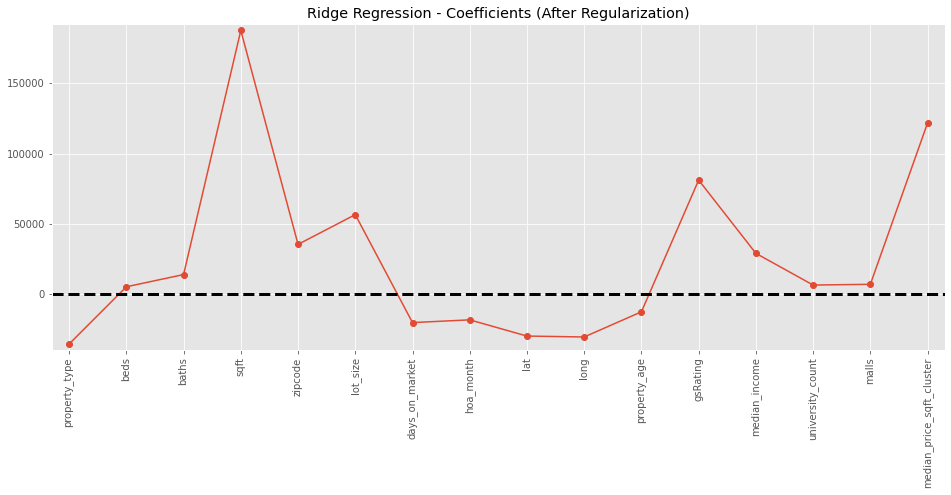

In [56]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), ridge_a.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.margins(0.02)
plt.title("Ridge Regression - Coefficients (After Regularization)")
plt.show()

#### 7.6.3 Ridge Regression Model Evaluation<a id='7.6.3_Ridge_Regression_Model_Evaluation'></a>

In [57]:
print("********Tuned_Alpha Ridge Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge_a) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_ridge_a))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge_a)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_a))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge_a) * 100), '%')
print("-------------------------------------------------")

********Tuned_Alpha Ridge Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.0763 %
-------------------------------------------------------------
Adjusted R^2 Score: 86.9369 %
-------------------------------------------------
MAE: 96489.2726
-------------------------------------------------
RMSE:135279.9288
-------------------------------------------------
Variance Score:87.0970 %
-------------------------------------------------


## 8. Ridge Regression Tuning Summary<a id='8_Ridge_Regression_Tuning_Summary'></a>

Ridge Regression Model Tunning Summary:
 * Keeping the high important features.
 * Using Regularization to determine best Alpha=15.20975162616059 and solver=sparse_cg.
 * Variance Score has degraded from 87.3653 % (Ridge - baseline) to 87.0970 %

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|87.3345 %|87.1024 %|95239.0802|133921.3033|87.3653 %|
|Tuned(High Important Features)   |87.0600 %|86.9205 %|96520.6475|135365.0654|87.0810 %|
|Tuned(High Important Features) + Regularization {'alpha': 15.20975162616059, 'solver': 'sparse_cg'}   |87.0763 %|86.9369 %|96489.2726|135279.9288|87.0970 %|

## 9. Ridge Regression Actual vs Prediction Visualization<a id='9_Ridge_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

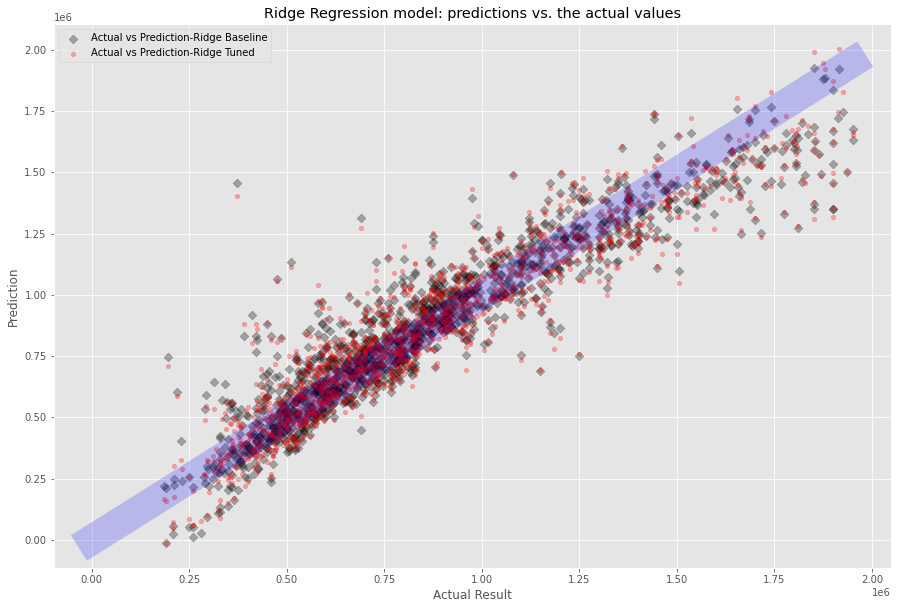

In [60]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_ridge, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Ridge Baseline')
plt.scatter(y_test,y_pred_ridge_a, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Ridge Tuned')
plt.title('Ridge Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [61]:
final_ridge = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_ridge.round(3), 'SalePrice_Predicted_Tuned': y_pred_ridge_a.round(3)})
final_ridge.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
437,1767539,1451216.106,1475301.044
253,1600000,1447911.815,1501714.090
1804,1320000,1027716.715,999118.437
4358,1170000,1013600.950,980267.789
2734,890000,1041107.919,1070375.384
4592,763000,828851.809,822136.435
3924,699000,737861.072,758732.382
1597,692000,582827.584,594617.025
3836,635000,624528.444,639449.652
841,572000,628758.532,631892.489


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 3rd Model: Ridge Regression, let's see if we can further improve our prediction using below algorithm:

 * Lasso Regression (L1 Regularization)
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))